---

## Notes on Follow-Up Analyses

### Section 9: Iron Gradient Plots
- Uses plasma colormap to visualize iron concentration
- Look for systematic deviations at high iron values
- May indicate dust interference

### Section 10: Multi-Site Comparisons
- All sites plotted together for direct comparison
- Overall regression line shows combined trend
- Individual site colors maintained

### Section 11: HIPS vs Aethalometer (Absorption-Absorption)
- More direct comparison than FTIR EC
- Both methods measure light absorption
- Threshold analysis similar to FTIR comparison

### Section 12: Flow Fix Analysis
- Beijing and JPL had known flow issues early on
- Before/after separation shows improvement
- Useful for understanding data quality evolution

### Section 13: Wavelength Dependence
- UV/IR ratio indicates source type
- Addis Ababa expected to show biomass burning signature
- Delhi and Beijing may show fossil fuel dominance

### How to Update This Notebook
1. Add new outliers to `scripts/outliers.py`
2. Modify thresholds in `scripts/config.py`
3. Restart kernel and re-run all cells

In [ ]:
# Comprehensive Summary Statistics
print("="*100)
print("COMPREHENSIVE SUMMARY: MULTI-SITE AETHALOMETER VS FILTER ANALYSIS")
print("="*100)

print("\n" + "-"*80)
print("1. AETHALOMETER VS FTIR EC CORRELATION")
print("-"*80)
print(f"{'Site':<15s} {'n':>8s} {'R²':>10s} {'Slope':>10s} {'Intercept':>12s}")
print("-" * 60)
for site_name, stats in site_stats.items():
    print(f"{site_name:<15s} {stats['n']:>8d} {stats['r_squared']:>10.3f} "
          f"{stats['slope']:>10.3f} {stats['intercept']:>12.2f}")

print("\n" + "-"*80)
print("2. HIPS VS AETHALOMETER CORRELATION (Absorption vs Absorption)")
print("-"*80)
print(f"{'Site':<15s} {'n':>8s} {'R²':>10s} {'Slope':>10s}")
print("-" * 50)
if 'HIPS Fabs vs Aethalometer IR BCc' in comparison_results.get(list(comparison_results.keys())[0], {}):
    for site_name in SITES:
        if site_name in comparison_results:
            stats = comparison_results[site_name].get('HIPS Fabs vs Aethalometer IR BCc')
            if stats:
                print(f"{site_name:<15s} {stats['n']:>8d} {stats['r_squared']:>10.3f} {stats['slope']:>10.3f}")

print("\n" + "-"*80)
print("3. WAVELENGTH DEPENDENCE (UV/IR Ratio)")
print("-"*80)
print(f"{'Site':<15s} {'n':>8s} {'Mean UV/IR':>12s} {'Interpretation':>25s}")
print("-" * 65)
for site_name, results in wavelength_results.items():
    ratio = results['mean_ratio']
    if ratio > 1.1:
        interp = "Biomass burning"
    elif ratio < 0.9:
        interp = "Fossil fuel"
    else:
        interp = "Mixed sources"
    print(f"{site_name:<15s} {results['n']:>8d} {ratio:>12.3f} {interp:>25s}")

print("\n" + "-"*80)
print("4. KEY FINDINGS")
print("-"*80)
print("""
- Addis Ababa shows highest R² for FTIR EC comparison (likely cleanest conditions)
- Iron gradient plots may reveal potential interference in dusty conditions
- Smooth/raw threshold filtering can improve correlation for sites with noisy data
- Flow fix periods show clear improvement in agreement at Beijing and JPL
- UV/IR ratios vary significantly across sites, indicating different source mixtures
""")

print("\n" + "-"*80)
print("5. OPEN QUESTIONS / NEXT STEPS")
print("-"*80)
print("""
- Investigate why HIPS slopes differ significantly from 1:1 at some sites
- Explore seasonal patterns in UV/IR ratios
- Consider MAC value optimization for each site
- Investigate outlier mechanisms (contamination, instrument issues)
- Add more sites as data becomes available
""")

## 14. Research Questions Summary

### Key Research Questions

1. **How well do aethalometer BC measurements correlate with filter-based methods?**
   - FTIR EC vs Aethalometer IR BCc
   - HIPS Fabs vs Aethalometer IR BCc (absorption vs absorption)
   - Site-specific variations

2. **Does iron contamination affect HIPS or FTIR EC measurements?**
   - Iron gradient plots show if high-iron samples deviate from regression
   - Potential interference mechanism

3. **How does the smooth/raw BC difference affect data quality?**
   - Threshold analysis for FTIR EC comparison
   - Threshold analysis for HIPS comparison (absorption-absorption)
   - Optimal threshold selection

4. **How does the flow fix impact aethalometer-filter agreement?**
   - Before/after analysis for Beijing and JPL
   - R² and slope changes

5. **What does wavelength dependence tell us about BC sources?**
   - UV/IR ratio across sites
   - Seasonal/temporal variations
   - Biomass burning vs fossil fuel contributions

In [ ]:
# Multi-wavelength time series for each site
print("\n" + "="*80)
print("Multi-Wavelength BC Time Series by Site")
print("="*80)

for site_name, df in aethalometer_data.items():
    config = SITES[site_name]
    
    fig, ax = plt.subplots(figsize=(14, 6))
    
    has_data = False
    for wl in wavelengths:
        col = f'{wl} BCc'
        if col in df.columns:
            valid_data = df[df[col].notna()].copy()
            if len(valid_data) > 0:
                ax.plot(valid_data['day_9am'], valid_data[col],
                        color=wavelength_colors[wl], alpha=0.7, linewidth=1.5,
                        label=f'{wl}')
                has_data = True
    
    if not has_data:
        print(f"{site_name}: No wavelength data available")
        plt.close()
        continue
    
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('BC (ng/m³)', fontsize=12)
    ax.set_title(f'{site_name}: Multi-Wavelength BC Time Series', fontsize=14, fontweight='bold')
    ax.legend(loc='upper right', fontsize=10, ncol=5)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [ ]:
# Summary comparison of UV/IR ratios across sites
print("\n" + "="*80)
print("SUMMARY: Wavelength Dependence (UV/IR Ratio)")
print("="*80)
print("\nInterpretation:")
print("  - UV/IR > 1.0: Strong UV absorption, suggests biomass burning")
print("  - UV/IR ~ 1.0: Equal absorption, mixed sources")
print("  - UV/IR < 1.0: Strong IR absorption, suggests fossil fuel")
print()

print(f"{'Site':<15s} {'n':>8s} {'Mean UV/IR':>12s} {'Median UV/IR':>14s} {'Std':>8s} {'Slope':>8s}")
print("-" * 70)

for site_name, results in wavelength_results.items():
    print(f"{site_name:<15s} {results['n']:>8d} {results['mean_ratio']:>12.3f} "
          f"{results['median_ratio']:>14.3f} {results['std_ratio']:>8.3f} {results['slope']:>8.3f}")

In [ ]:
# Wavelength cross-plots: Compare UV BCc vs IR BCc (ratio indicates source type)
# Higher UV/IR ratio suggests biomass burning, lower ratio suggests fossil fuel

print("\n" + "="*80)
print("UV vs IR BC Comparison (Source Apportionment)")
print("="*80)
print("Higher UV/IR ratio suggests biomass burning contribution")
print("Lower UV/IR ratio suggests fossil fuel dominance")
print()

wavelength_results = {}

for site_name, df in aethalometer_data.items():
    config = SITES[site_name]
    
    # Check if both UV and IR are available
    if 'UV BCc' not in df.columns or 'IR BCc' not in df.columns:
        print(f"{site_name}: Missing UV or IR wavelength data")
        continue
    
    # Get valid data
    valid_mask = df['UV BCc'].notna() & df['IR BCc'].notna()
    valid_df = df[valid_mask].copy()
    
    if len(valid_df) < 3:
        print(f"{site_name}: Insufficient data (n={len(valid_df)})")
        continue
    
    uv_bc = valid_df['UV BCc'].values
    ir_bc = valid_df['IR BCc'].values
    
    # Calculate UV/IR ratio
    ratio = uv_bc / ir_bc
    
    fig, ax = plt.subplots(figsize=(9, 9))
    
    # Scatter plot
    ax.scatter(ir_bc, uv_bc, color=config['color'], alpha=0.6, s=80,
               edgecolors='black', linewidth=0.5, label=f'{site_name} (n={len(ir_bc)})')
    
    # Calculate regression
    stats = calculate_regression_stats(ir_bc, uv_bc)
    
    if stats:
        # Regression line
        max_val = max(ir_bc.max(), uv_bc.max()) * 1.1
        x_line = np.array([0, max_val])
        y_line = stats['slope'] * x_line + stats['intercept']
        ax.plot(x_line, y_line, 'g-', linewidth=2, alpha=0.8, label='Best fit')
        
        # 1:1 line
        ax.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, linewidth=1.5, label='1:1 line')
        
        ax.set_xlim(0, max_val)
        ax.set_ylim(0, max_val)
        ax.set_aspect('equal', adjustable='box')
        
        # Stats text
        sign = '+' if stats['intercept'] >= 0 else '-'
        eq = f"y = {stats['slope']:.3f}x {sign} {abs(stats['intercept']):.2f}"
        stats_text = f"n = {stats['n']}\nR² = {stats['r_squared']:.3f}\n{eq}\n\nMean UV/IR: {ratio.mean():.3f}\nMedian UV/IR: {np.median(ratio):.3f}"
        ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=10,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))
        
        wavelength_results[site_name] = {
            **stats,
            'mean_ratio': ratio.mean(),
            'median_ratio': np.median(ratio),
            'std_ratio': ratio.std()
        }
    
    ax.set_xlabel('IR BCc (ng/m³)', fontsize=11)
    ax.set_ylabel('UV BCc (ng/m³)', fontsize=11)
    ax.set_title(f'{site_name}: UV BCc vs IR BCc\n(Wavelength Dependence)', 
                 fontsize=14, fontweight='bold')
    ax.legend(loc='lower right', fontsize=9)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"{site_name}:")
    print(f"  Mean UV/IR ratio: {ratio.mean():.3f}")
    print(f"  Median UV/IR ratio: {np.median(ratio):.3f}")
    print(f"  Std UV/IR ratio: {ratio.std():.3f}")
    print()

In [ ]:
# Check which wavelengths are available for each site
wavelengths = ['UV', 'Blue', 'Green', 'Red', 'IR']
wavelength_colors = {
    'UV': '#9B59B6',    # Purple
    'Blue': '#3498DB',  # Blue
    'Green': '#2ECC71', # Green
    'Red': '#E74C3C',   # Red
    'IR': '#34495E'     # Dark gray
}

print("Available BC wavelengths by site:")
print("="*60)

for site_name, df in aethalometer_data.items():
    available = []
    for wl in wavelengths:
        col = f'{wl} BCc'
        if col in df.columns:
            n_valid = df[col].notna().sum()
            if n_valid > 0:
                available.append(f"{wl} (n={n_valid})")
    print(f"\n{site_name}:")
    print(f"  {', '.join(available)}")

## 13. Wavelength Dependence Analysis (All Sites)

Compare BC measurements at different wavelengths across all sites. This helps understand source apportionment (biomass burning vs fossil fuel) and potential measurement artifacts.

In [ ]:
# Summary table for flow fix analysis
print("\n" + "="*80)
print("SUMMARY: Before/After Flow Fix Comparison")
print("="*80)

for site_name, results in flow_fix_results.items():
    if len(results) == 0:
        continue
    
    print(f"\n{site_name}:")
    print(f"{'Period':<20s} {'n':>8s} {'R²':>10s} {'Slope':>10s}")
    print("-" * 50)
    
    for period, stats in results.items():
        period_label = 'Before Fix' if period == 'before_fix' else 'After Fix'
        print(f"{period_label:<20s} {stats['n']:>8d} {stats['r_squared']:>10.3f} {stats['slope']:>10.3f}")
    
    # Show improvement
    if 'before_fix' in results and 'after_fix' in results:
        r2_before = results['before_fix']['r_squared']
        r2_after = results['after_fix']['r_squared']
        slope_before = results['before_fix']['slope']
        slope_after = results['after_fix']['slope']
        
        print(f"\n  R² change: {r2_before:.3f} -> {r2_after:.3f} (Δ = {r2_after - r2_before:+.3f})")
        print(f"  Slope change: {slope_before:.3f} -> {slope_after:.3f} (Δ = {slope_after - slope_before:+.3f})")

In [ ]:
# Before/After Flow Fix Analysis
# Compare Aethalometer vs FTIR EC for before/after periods

flow_fix_results = {}

for site_name, matched_df in all_matched_data.items():
    config = SITES[site_name]
    flow_config = FLOW_FIX_PERIODS.get(site_name, {})
    
    # Check if this site has flow fix periods defined
    before_end = flow_config.get('before_end')
    after_start = flow_config.get('after_start')
    
    if before_end is None and after_start is None:
        print(f"\n{site_name}: No flow fix periods defined (all data treated as single period)")
        continue
    
    print(f"\n{'='*60}")
    print(f"{site_name}: Before/After Flow Fix Analysis")
    print(f"{'='*60}")
    
    # Add flow period column
    matched_with_period = matched_df.copy()
    matched_with_period['date'] = pd.to_datetime(matched_with_period['date'])
    
    before_end_dt = pd.to_datetime(before_end) if before_end else None
    after_start_dt = pd.to_datetime(after_start) if after_start else None
    
    def classify_period(date):
        if before_end_dt and date <= before_end_dt:
            return 'before_fix'
        elif after_start_dt and date >= after_start_dt:
            return 'after_fix'
        else:
            return 'gap_period'
    
    matched_with_period['flow_period'] = matched_with_period['date'].apply(classify_period)
    
    # Count samples in each period
    period_counts = matched_with_period['flow_period'].value_counts()
    print(f"  Sample counts by period: {period_counts.to_dict()}")
    
    # Apply exclusion flags
    matched_with_period = apply_exclusion_flags(matched_with_period, site_name)
    
    site_results = {}
    
    # Calculate axis limits
    all_vals = np.concatenate([
        matched_with_period['aeth_bc'].dropna().values,
        matched_with_period['filter_ec'].dropna().values
    ])
    max_val = all_vals.max() * 1.1 if len(all_vals) > 0 else 100
    
    # Create separate plots for before/after
    for period, period_label, period_color in [
        ('before_fix', 'Before Flow Fix', '#E74C3C'),  # Red
        ('after_fix', 'After Flow Fix', '#2ECC71')     # Green
    ]:
        period_data = matched_with_period[matched_with_period['flow_period'] == period].copy()
        
        if len(period_data) < 3:
            print(f"  {period_label}: Insufficient data (n={len(period_data)})")
            continue
        
        # Get outlier mask for this period
        outlier_mask = period_data['is_excluded'].values if 'is_excluded' in period_data.columns else None
        
        fig, ax = plt.subplots(figsize=(9, 9))
        
        x_data = period_data['aeth_bc'].values
        y_data = period_data['filter_ec'].values
        
        # Valid data mask
        valid_mask = (~np.isnan(x_data)) & (~np.isnan(y_data))
        
        if outlier_mask is not None:
            clean_mask = valid_mask & ~outlier_mask
            outlier_plot_mask = valid_mask & outlier_mask
        else:
            clean_mask = valid_mask
            outlier_plot_mask = np.zeros(len(x_data), dtype=bool)
        
        x_clean = x_data[clean_mask]
        y_clean = y_data[clean_mask]
        
        # Plot clean data
        ax.scatter(x_clean, y_clean, color=period_color, alpha=0.6, s=80,
                   edgecolors='black', linewidth=1, label=f'Data (n={len(x_clean)})')
        
        # Plot outliers as red X
        if outlier_plot_mask.any():
            ax.scatter(x_data[outlier_plot_mask], y_data[outlier_plot_mask],
                       color='red', alpha=0.9, s=200, marker='X', linewidths=3,
                       label=f'Excluded (n={outlier_plot_mask.sum()})')
        
        # Calculate regression
        stats = calculate_regression_stats(x_clean, y_clean)
        
        if stats:
            # Regression line
            x_line = np.array([0, max_val])
            y_line = stats['slope'] * x_line + stats['intercept']
            ax.plot(x_line, y_line, 'g-', linewidth=2, alpha=0.8, label='Best fit')
            
            # Stats text
            sign = '+' if stats['intercept'] >= 0 else '-'
            eq = f"y = {stats['slope']:.3f}x {sign} {abs(stats['intercept']):.2f}"
            stats_text = f"{period_label}\nn = {stats['n']}\nR² = {stats['r_squared']:.3f}\n{eq}"
            ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=10,
                    verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))
            
            site_results[period] = stats
            print(f"  {period_label}: R² = {stats['r_squared']:.3f}, Slope = {stats['slope']:.3f}, n = {stats['n']}")
        
        # Set axes
        ax.set_xlim(0, max_val)
        ax.set_ylim(0, max_val)
        ax.set_aspect('equal', adjustable='box')
        ax.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, linewidth=1.5, label='1:1 line')
        
        ax.set_xlabel('Aethalometer IR BC (ng/m³)', fontsize=11)
        ax.set_ylabel('FTIR EC (ng/m³)', fontsize=11)
        ax.set_title(f'{site_name}: {period_label}\nAethalometer BC vs FTIR EC',
                     fontsize=14, fontweight='bold')
        ax.legend(loc='lower right', fontsize=9)
        ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    flow_fix_results[site_name] = site_results

In [ ]:
# Show flow fix period configuration
print("Flow Fix Period Configuration:")
print("="*60)
for site_name, config in FLOW_FIX_PERIODS.items():
    print(f"\n{site_name}:")
    print(f"  Description: {config['description']}")
    print(f"  Before end: {config['before_end']}")
    print(f"  After start: {config['after_start']}")
    print(f"  Notes: {config['notes']}")

## 12. Before/After Flow Fix Separation Analysis

Separate data by flow fix periods and compare regression statistics. This is particularly relevant for Beijing and JPL which had flow issues early in deployment.

In [ ]:
# Summary table for HIPS vs Aethalometer threshold analysis
print("\n" + "="*80)
print("SUMMARY: HIPS vs Aethalometer - Smooth/Raw Threshold Impact")
print("="*80)
print("(Absorption vs Absorption comparison)")

print_comparison_table(hips_threshold_results, metric_name='HIPS-Aeth Threshold Impact')

In [ ]:
# HIPS vs Aethalometer threshold analysis (individual plots per threshold)
hips_threshold_results = {}

for site_name, matched_df in hips_smooth_raw_data.items():
    config = SITES[site_name]
    
    if matched_df['smooth_raw_abs_pct'].notna().sum() < 3:
        print(f"{site_name}: Insufficient smooth data for HIPS analysis")
        continue
    
    print(f"\n{'='*60}")
    print(f"{site_name}: HIPS vs Aethalometer Smooth/Raw Threshold Analysis")
    print(f"{'='*60}")
    
    site_results = {}
    
    # Calculate axis limits (same for all plots for this site)
    all_vals = np.concatenate([
        matched_df['aeth_bc'].dropna().values,
        matched_df['hips_fabs'].dropna().values
    ])
    max_val = all_vals.max() * 1.1 if len(all_vals) > 0 else 100
    
    for threshold in SMOOTH_RAW_THRESHOLDS:
        # Separate by threshold
        below_threshold = matched_df[matched_df['smooth_raw_abs_pct'] <= threshold].copy()
        above_threshold = matched_df[matched_df['smooth_raw_abs_pct'] > threshold].copy()
        
        n_kept = len(below_threshold)
        n_removed = len(above_threshold)
        
        if n_kept < 3:
            print(f"  Threshold <={threshold}%: Insufficient data (n={n_kept})")
            continue
        
        # Create individual figure for this threshold
        fig, ax = plt.subplots(figsize=(9, 9))
        
        # Plot kept points
        ax.scatter(below_threshold['aeth_bc'], below_threshold['hips_fabs'],
                   color=config['color'], alpha=0.6, s=80,
                   edgecolors='black', linewidth=1,
                   label=f'Kept (n={n_kept})')
        
        # Plot removed points as red X
        if len(above_threshold) > 0:
            ax.scatter(above_threshold['aeth_bc'], above_threshold['hips_fabs'],
                       color='red', alpha=0.9, s=200, marker='X',
                       linewidths=3, label=f'Removed (n={n_removed})')
        
        # Calculate regression on kept points
        stats = calculate_regression_stats(
            below_threshold['aeth_bc'].values,
            below_threshold['hips_fabs'].values
        )
        
        if stats:
            # Plot regression line
            x_line = np.array([0, max_val])
            y_line = stats['slope'] * x_line + stats['intercept']
            ax.plot(x_line, y_line, 'g-', linewidth=2, alpha=0.8, label='Best fit')
            
            # Stats text
            sign = '+' if stats['intercept'] >= 0 else '-'
            eq = f"y = {stats['slope']:.3f}x {sign} {abs(stats['intercept']):.2f}"
            stats_text = f"n = {stats['n']}\nR² = {stats['r_squared']:.3f}\n{eq}"
            
            ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=10,
                    verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.9))
            
            site_results[threshold] = {
                'n_kept': n_kept,
                'n_removed': n_removed,
                **stats
            }
        
        # Set axes
        ax.set_xlim(0, max_val)
        ax.set_ylim(0, max_val)
        ax.set_aspect('equal', adjustable='box')
        ax.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, linewidth=1.5, label='1:1 line')
        
        ax.set_xlabel('Aethalometer IR BCc (µg/m³)', fontsize=11)
        ax.set_ylabel('HIPS Fabs / MAC (µg/m³)', fontsize=11)
        ax.set_title(f'{site_name}: HIPS vs Aeth, Threshold <={threshold}% Smooth-Raw Diff\n(Absorption vs Absorption)',
                     fontsize=13, fontweight='bold')
        ax.legend(loc='lower right', fontsize=9)
        ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        if stats:
            print(f"  Threshold <={threshold}%: R² = {stats['r_squared']:.3f}, n = {stats['n']}")
    
    hips_threshold_results[site_name] = site_results

In [ ]:
# Match HIPS with smooth/raw info for each site
hips_smooth_raw_data = {}

for site_name in SITES:
    if site_name not in aethalometer_data:
        continue
    
    config = SITES[site_name]
    df_aeth = aethalometer_data[site_name]
    
    matched = match_hips_with_smooth_raw_info(
        site_name, df_aeth, filter_data, config['code']
    )
    
    if matched is not None and len(matched) >= 3:
        n_with_smooth = matched['smooth_raw_abs_pct'].notna().sum()
        hips_smooth_raw_data[site_name] = matched
        print(f"{site_name}: {len(matched)} matched HIPS-Aeth pairs, {n_with_smooth} with smooth data")
    else:
        print(f"{site_name}: Insufficient HIPS-Aeth data")

In [ ]:
# Match HIPS data with aethalometer smooth/raw info
def match_hips_with_smooth_raw_info(site_name, df_aeth, filter_data, site_code, wavelength='IR'):
    """
    Match HIPS Fabs and aethalometer data, including smooth/raw difference info.
    
    Returns DataFrame with:
    - date
    - aeth_bc (using raw BC, µg/m³)
    - aeth_bc_smooth (µg/m³)
    - hips_fabs (µg/m³ equivalent, divided by MAC)
    - smooth_raw_pct: % difference
    - smooth_raw_abs_pct: absolute % difference
    """
    raw_col = f'{wavelength} BCc'
    smooth_col = f'{wavelength} BCc smoothed'
    
    # Check if columns exist
    if raw_col not in df_aeth.columns:
        print(f"  {site_name}: {raw_col} not found")
        return None
    
    has_smooth = smooth_col in df_aeth.columns
    
    # Get HIPS Fabs data for this site
    site_hips = filter_data[
        (filter_data['Site'] == site_code) &
        (filter_data['Parameter'] == 'HIPS_Fabs')
    ].copy()
    
    if len(site_hips) == 0:
        print(f"  {site_name}: No HIPS data available")
        return None
    
    matched_records = []
    
    for _, filter_row in site_hips.iterrows():
        filter_date = filter_row['SampleDate']
        
        date_match = df_aeth[
            (df_aeth['day_9am'] >= filter_date - pd.Timedelta(days=1)) &
            (df_aeth['day_9am'] <= filter_date + pd.Timedelta(days=1))
        ]
        
        if len(date_match) > 0:
            bc_raw = date_match[raw_col].mean()  # ng/m³
            bc_smooth = date_match[smooth_col].mean() if has_smooth else np.nan
            
            if pd.notna(bc_raw) and pd.notna(filter_row['Concentration']):
                hips_fabs = filter_row['Concentration'] / MAC_VALUE  # Mm^-1 to µg/m³
                
                # Calculate % difference
                if bc_raw != 0 and pd.notna(bc_smooth):
                    pct_diff = ((bc_smooth - bc_raw) / bc_raw) * 100
                else:
                    pct_diff = np.nan
                
                matched_records.append({
                    'date': filter_date,
                    'aeth_bc': bc_raw / 1000,  # ng to µg/m³
                    'aeth_bc_smooth': bc_smooth / 1000 if pd.notna(bc_smooth) else np.nan,
                    'hips_fabs': hips_fabs,
                    'smooth_raw_pct': pct_diff,
                    'smooth_raw_abs_pct': abs(pct_diff) if pd.notna(pct_diff) else np.nan,
                    'filter_id': filter_row.get('FilterId', 'unknown')
                })
    
    return pd.DataFrame(matched_records) if matched_records else None

print("HIPS smooth/raw matching function defined.")

## 11. HIPS vs Aethalometer Smooth/Raw Threshold Analysis

Redo the smooth/raw threshold analysis specifically for HIPS vs Aethalometer comparison (absorption vs absorption), rather than FTIR EC vs Aethalometer.

This is a more direct comparison since both HIPS and aethalometer measure light absorption.

In [ ]:
# Multi-site comparison plots
# Show all sites on same axes for direct comparison

multisite_comparisons = [
    {
        'name': 'Aethalometer IR BCc vs FTIR EC',
        'x_col': 'ir_bcc',
        'y_col': 'ftir_ec',
        'x_label': 'Aethalometer IR BCc (µg/m³)',
        'y_label': 'FTIR EC (µg/m³)',
        'equal_axes': True
    },
    {
        'name': 'HIPS Fabs vs FTIR EC',
        'x_col': 'hips_fabs',
        'y_col': 'ftir_ec',
        'x_label': 'HIPS Fabs / MAC (µg/m³)',
        'y_label': 'FTIR EC (µg/m³)',
        'equal_axes': True
    },
    {
        'name': 'HIPS Fabs vs Aethalometer IR BCc',
        'x_col': 'hips_fabs',
        'y_col': 'ir_bcc',
        'x_label': 'HIPS Fabs / MAC (µg/m³)',
        'y_label': 'Aethalometer IR BCc (µg/m³)',
        'equal_axes': True
    }
]

for comp in multisite_comparisons:
    fig, ax = plt.subplots(figsize=(12, 10))
    
    all_x = []
    all_y = []
    site_stats = {}
    
    for site_name, matched_df in all_params_data.items():
        config = SITES[site_name]
        
        x_col = comp['x_col']
        y_col = comp['y_col']
        
        # Check if columns exist
        if x_col not in matched_df.columns or y_col not in matched_df.columns:
            continue
        
        # Apply exclusion flags
        df_flagged = apply_exclusion_flags(matched_df.copy(), site_name)
        outlier_mask = df_flagged['is_excluded'].values if 'is_excluded' in df_flagged.columns else None
        
        x_data = df_flagged[x_col].values
        y_data = df_flagged[y_col].values
        
        # Valid data mask
        valid_mask = (~np.isnan(x_data)) & (~np.isnan(y_data))
        
        if outlier_mask is not None:
            clean_mask = valid_mask & ~outlier_mask
            outlier_plot_mask = valid_mask & outlier_mask
        else:
            clean_mask = valid_mask
            outlier_plot_mask = np.zeros(len(x_data), dtype=bool)
        
        x_clean = x_data[clean_mask]
        y_clean = y_data[clean_mask]
        
        if len(x_clean) < 3:
            continue
        
        all_x.extend(x_clean)
        all_y.extend(y_clean)
        
        # Plot clean data for this site
        ax.scatter(x_clean, y_clean, color=config['color'], alpha=0.6, s=80,
                   edgecolors='black', linewidth=0.5,
                   label=f"{site_name} (n={len(x_clean)})")
        
        # Plot outliers as red X (no legend entry to avoid duplicates)
        if outlier_plot_mask.any():
            ax.scatter(x_data[outlier_plot_mask], y_data[outlier_plot_mask],
                       color='red', alpha=0.9, s=200, marker='X', linewidths=3)
        
        # Calculate site stats
        stats = calculate_regression_stats(x_clean, y_clean)
        if stats:
            site_stats[site_name] = stats
    
    if len(all_x) < 3:
        print(f"{comp['name']}: Insufficient data")
        plt.close()
        continue
    
    # Set axis limits
    if comp['equal_axes']:
        max_val = max(max(all_x), max(all_y)) * 1.1
        ax.set_xlim(0, max_val)
        ax.set_ylim(0, max_val)
        ax.set_aspect('equal', adjustable='box')
        ax.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, linewidth=1.5, label='1:1 line')
    else:
        ax.set_xlim(left=0)
        ax.set_ylim(bottom=0)
    
    # Add overall regression
    overall_stats = calculate_regression_stats(all_x, all_y)
    if overall_stats:
        x_line = np.array([0, max(all_x) * 1.1])
        y_line = overall_stats['slope'] * x_line + overall_stats['intercept']
        ax.plot(x_line, y_line, 'k-', linewidth=2.5, alpha=0.6, 
                label=f'Overall fit (R²={overall_stats["r_squared"]:.3f})')
        
        sign = '+' if overall_stats['intercept'] >= 0 else '-'
        eq = f"y = {overall_stats['slope']:.3f}x {sign} {abs(overall_stats['intercept']):.2f}"
        text = f"OVERALL (all sites)\nn = {overall_stats['n']}\nR² = {overall_stats['r_squared']:.3f}\n{eq}"
        ax.text(0.05, 0.95, text, transform=ax.transAxes, fontsize=10,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))
    
    # Add red X to legend (once)
    ax.scatter([], [], color='red', marker='X', s=200, linewidths=3, label='Excluded outliers')
    
    ax.set_xlabel(comp['x_label'], fontsize=12)
    ax.set_ylabel(comp['y_label'], fontsize=12)
    ax.set_title(f"Multi-Site Comparison: {comp['name']}", fontsize=14, fontweight='bold')
    ax.legend(loc='lower right', fontsize=9)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print stats table
    print(f"\n{comp['name']} - Site Statistics:")
    print(f"{'Site':<15s} {'n':>8s} {'R²':>10s} {'Slope':>10s}")
    print("-" * 45)
    for site_name, stats in site_stats.items():
        print(f"{site_name:<15s} {stats['n']:>8d} {stats['r_squared']:>10.3f} {stats['slope']:>10.3f}")
    if overall_stats:
        print("-" * 45)
        print(f"{'OVERALL':<15s} {overall_stats['n']:>8d} {overall_stats['r_squared']:>10.3f} {overall_stats['slope']:>10.3f}")
    print()

## 10. Multi-Site Comparison Plots (All Sites Including Addis Ababa)

Combine all sites on single plots for direct comparison. Each site has its own color, and outliers are shown with consistent red X markers.

In [ ]:
# Create iron gradient cross-plots for each site
# Comparisons: FTIR EC vs Aeth, HIPS vs Aeth, HIPS vs FTIR EC

iron_gradient_comparisons = [
    {
        'name': 'FTIR EC vs Aethalometer IR BCc',
        'x_col': 'ir_bcc',
        'y_col': 'ftir_ec',
        'x_label': 'Aethalometer IR BCc (µg/m³)',
        'y_label': 'FTIR EC (µg/m³)',
        'equal_axes': True
    },
    {
        'name': 'HIPS Fabs vs Aethalometer IR BCc',
        'x_col': 'ir_bcc',
        'y_col': 'hips_fabs',
        'x_label': 'Aethalometer IR BCc (µg/m³)',
        'y_label': 'HIPS Fabs / MAC (µg/m³)',
        'equal_axes': True
    },
    {
        'name': 'HIPS Fabs vs FTIR EC',
        'x_col': 'ftir_ec',
        'y_col': 'hips_fabs',
        'x_label': 'FTIR EC (µg/m³)',
        'y_label': 'HIPS Fabs / MAC (µg/m³)',
        'equal_axes': True
    }
]

for site_name, matched_df in all_params_data.items():
    config = SITES[site_name]
    
    print(f"\n{'='*60}")
    print(f"{site_name}: Iron Gradient Cross-Plots")
    print(f"{'='*60}")
    
    # Apply exclusion flags
    matched_df = apply_exclusion_flags(matched_df.copy(), site_name)
    outlier_mask = matched_df['is_excluded'].values if 'is_excluded' in matched_df.columns else None
    
    for comp in iron_gradient_comparisons:
        x_col = comp['x_col']
        y_col = comp['y_col']
        
        # Check if required columns exist
        if x_col not in matched_df.columns or y_col not in matched_df.columns:
            print(f"  {comp['name']}: Missing columns")
            continue
        
        if 'iron' not in matched_df.columns:
            print(f"  {comp['name']}: No iron data")
            continue
        
        # Check for sufficient data
        valid_count = ((~np.isnan(matched_df[x_col].values)) & 
                       (~np.isnan(matched_df[y_col].values)) &
                       (~np.isnan(matched_df['iron'].values))).sum()
        
        if valid_count < 3:
            print(f"  {comp['name']}: Insufficient data with iron (n={valid_count})")
            continue
        
        fig, ax = plt.subplots(figsize=(10, 9))
        
        stats, _ = plot_crossplot_iron_gradient(
            ax,
            matched_df[x_col].values,
            matched_df[y_col].values,
            matched_df['iron'].values,
            comp['x_label'],
            comp['y_label'],
            equal_axes=comp['equal_axes'],
            outlier_mask=outlier_mask,
            cmap='plasma'  # Good for showing iron concentration
        )
        
        ax.set_title(f"{site_name}: {comp['name']}\n(Color = Iron Concentration)", 
                     fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        if stats:
            print(f"  {comp['name']}: R² = {stats['r_squared']:.3f}, n = {stats['n']}")

In [ ]:
# Helper function for cross-plots with iron color gradient
def plot_crossplot_iron_gradient(ax, x_data, y_data, iron_data, x_label, y_label,
                                   equal_axes=True, outlier_mask=None, cmap='viridis'):
    """
    Cross-plot with iron concentration as color gradient.
    
    Parameters:
    -----------
    ax : matplotlib axis
    x_data, y_data, iron_data : arrays
    x_label, y_label : str
    equal_axes : bool
    outlier_mask : boolean array (True = outlier)
    cmap : colormap name
    
    Returns:
    --------
    dict with regression stats, scatter object
    """
    x_data = np.asarray(x_data)
    y_data = np.asarray(y_data)
    iron_data = np.asarray(iron_data)
    
    # Valid data mask (all three must be valid)
    valid_mask = (~np.isnan(x_data)) & (~np.isnan(y_data)) & (~np.isnan(iron_data))
    
    if outlier_mask is not None:
        outlier_mask = np.asarray(outlier_mask)
        clean_mask = valid_mask & ~outlier_mask
        outlier_plot_mask = valid_mask & outlier_mask
    else:
        clean_mask = valid_mask
        outlier_plot_mask = np.zeros(len(x_data), dtype=bool)
    
    x_clean = x_data[clean_mask]
    y_clean = y_data[clean_mask]
    iron_clean = iron_data[clean_mask]
    
    if len(x_clean) < 3:
        ax.text(0.5, 0.5, 'Insufficient data with iron values', 
                transform=ax.transAxes, ha='center', va='center')
        return None, None
    
    # Plot with iron color gradient
    scatter = ax.scatter(x_clean, y_clean, c=iron_clean, cmap=cmap,
                        alpha=0.7, s=100, edgecolors='black', linewidth=0.5)
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax, shrink=0.8)
    cbar.set_label('Iron (µg/m³)', fontsize=10)
    
    # Plot outliers as red X
    if outlier_plot_mask.any():
        ax.scatter(x_data[outlier_plot_mask], y_data[outlier_plot_mask],
                   color='red', alpha=0.9, s=200, marker='X', linewidths=3,
                   label=f'Excluded (n={outlier_plot_mask.sum()})')
    
    # Calculate regression
    stats = calculate_regression_stats(x_clean, y_clean)
    
    if stats:
        # Set axis limits
        if equal_axes:
            all_vals = np.concatenate([x_clean, y_clean])
            max_val = all_vals.max() * 1.1
            ax.set_xlim(0, max_val)
            ax.set_ylim(0, max_val)
            ax.set_aspect('equal', adjustable='box')
            x_line = np.array([0, max_val])
        else:
            ax.set_xlim(left=0)
            ax.set_ylim(bottom=0)
            x_line = np.array([0, x_clean.max() * 1.1])
        
        # Plot regression line
        y_line = stats['slope'] * x_line + stats['intercept']
        ax.plot(x_line, y_line, 'r-', linewidth=2, alpha=0.8, label='Best fit')
        
        # 1:1 line
        if equal_axes:
            ax.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, linewidth=1.5, label='1:1 line')
        
        # Stats text
        sign = '+' if stats['intercept'] >= 0 else '-'
        eq = f"y = {stats['slope']:.3f}x {sign} {abs(stats['intercept']):.2f}"
        text = f"n = {stats['n']}\nR² = {stats['r_squared']:.3f}\n{eq}"
        ax.text(0.05, 0.95, text, transform=ax.transAxes, fontsize=10,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))
    
    ax.set_xlabel(x_label, fontsize=11)
    ax.set_ylabel(y_label, fontsize=11)
    ax.legend(loc='lower right', fontsize=8)
    ax.grid(True, alpha=0.3)
    
    return stats, scatter

print("Iron gradient plotting function defined.")

## 9. Iron Concentration Color Gradient Cross-Plots

Add iron concentration as a color gradient to visualize whether high iron samples deviate from the regression line (potential interference).

# Multi-Site Aethalometer Analysis (Modular Version)

This notebook uses the modularized scripts for multi-site aethalometer and filter data analysis.

**Sites:**
- Beijing, China (CHTS)
- Delhi, India (INDH)
- JPL/Pasadena, USA (USPA)
- Addis Ababa, Ethiopia (ETAD)

---

## 1. Setup and Imports

In [21]:
# Add scripts folder to path
import sys
sys.path.insert(0, './scripts')

# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import from our modular scripts
from config import (
    SITES, PROCESSED_SITES_DIR, FILTER_DATA_PATH,
    MAC_VALUE, FLOW_FIX_PERIODS, MIN_EC_THRESHOLD,
    SMOOTH_RAW_THRESHOLDS, CROSS_COMPARISONS
)

from outliers import (
    EXCLUDED_SAMPLES, MANUAL_OUTLIERS,
    apply_exclusion_flags, apply_threshold_flags,
    get_clean_data, print_exclusion_summary,
    identify_outlier_dates
)

from data_matching import (
    load_aethalometer_data, load_filter_data,
    match_aeth_filter_data, match_all_parameters,
    match_with_smooth_raw_info, add_flow_period_column,
    get_site_code, get_site_color, print_data_summary
)

from plotting import (
    calculate_regression_stats,
    plot_crossplot, plot_before_after_comparison,
    create_tiled_threshold_plots, plot_smooth_raw_distribution,
    plot_bc_timeseries, plot_multiwavelength_bc,
    print_comparison_table
)

# Configure matplotlib
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Modules loaded successfully!")
print(f"\nSites configured: {list(SITES.keys())}")
print(f"MAC value: {MAC_VALUE} m^2/g")

Modules loaded successfully!

Sites configured: ['Beijing', 'Delhi', 'JPL', 'Addis_Ababa']
MAC value: 10 m^2/g


## 2. Load Data

In [22]:
# Load all aethalometer datasets
aethalometer_data = load_aethalometer_data()

Loaded Beijing: 590 records, 2022-02-23 to 2024-10-07
Loaded Delhi: 289 records, 2022-06-27 to 2024-07-01
Loaded JPL: 765 records, 2021-11-08 to 2024-08-14
Loaded Addis_Ababa: 515 records, 2022-12-06 to 2024-09-22

Total sites loaded: 4


In [23]:
# Load filter dataset
filter_data = load_filter_data()

Filter dataset loaded: 44493 measurements
Sites: ['CHTS' 'ETAD' 'INDH' 'USPA']
Date range: 2013-06-28 to 2024-12-08


In [24]:
# Print data summary
print_data_summary(aethalometer_data, filter_data)


DATA SUMMARY

Beijing:
  Records: 590
  Date range: 2022-02-23 to 2024-10-07
  Days with IR BC: 222 (37.6%)

Delhi:
  Records: 289
  Date range: 2022-06-27 to 2024-07-01
  Days with IR BC: 113 (39.1%)

JPL:
  Records: 765
  Date range: 2021-11-08 to 2024-08-14
  Days with IR BC: 489 (63.9%)

Addis_Ababa:
  Records: 515
  Date range: 2022-12-06 to 2024-09-22
  Days with IR BC: 515 (100.0%)

Filter data: 44493 measurements
  Sites: ['CHTS', 'ETAD', 'INDH', 'USPA']
  Parameters: 62


## 3. BC Time Series

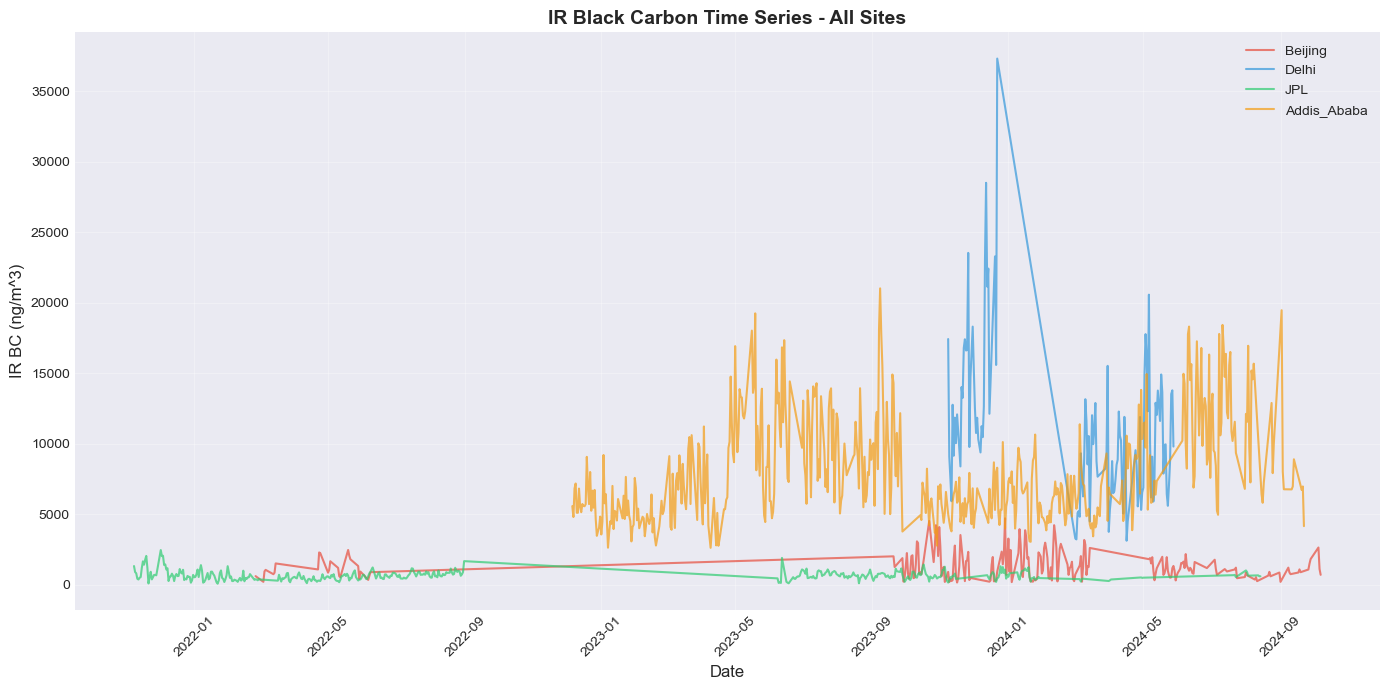

In [25]:
# Combined BC time series - all sites
fig, ax = plt.subplots(figsize=(14, 7))

for site_name, df in aethalometer_data.items():
    config = SITES[site_name]
    plot_bc_timeseries(ax, site_name, df, config, wavelength='IR')

ax.set_title('IR Black Carbon Time Series - All Sites', fontsize=14, fontweight='bold')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

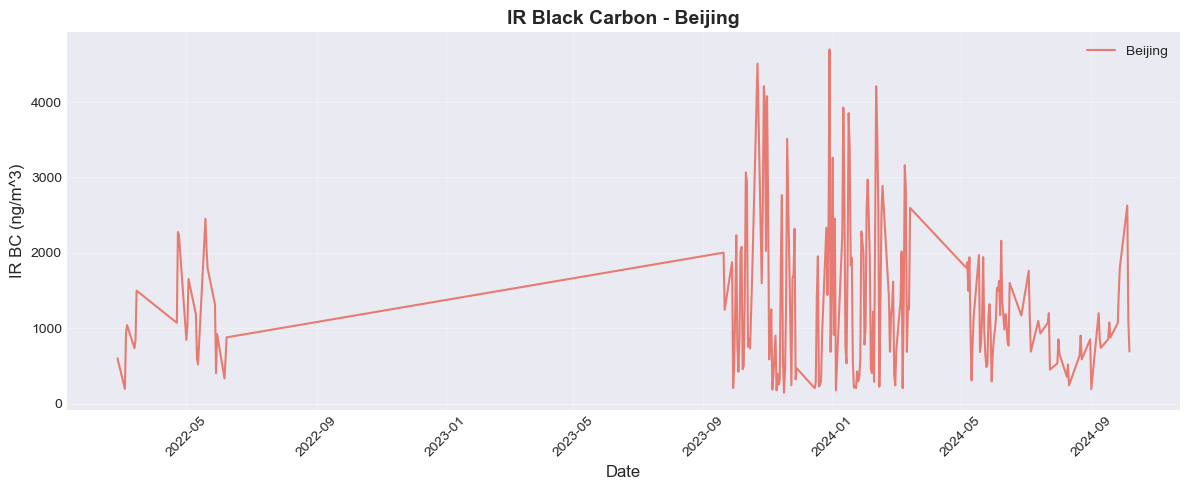

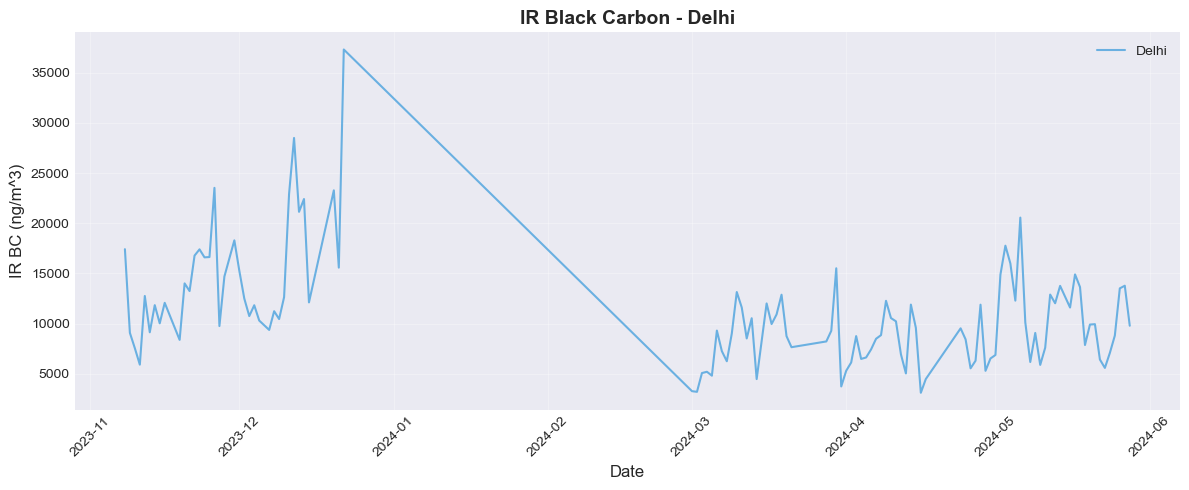

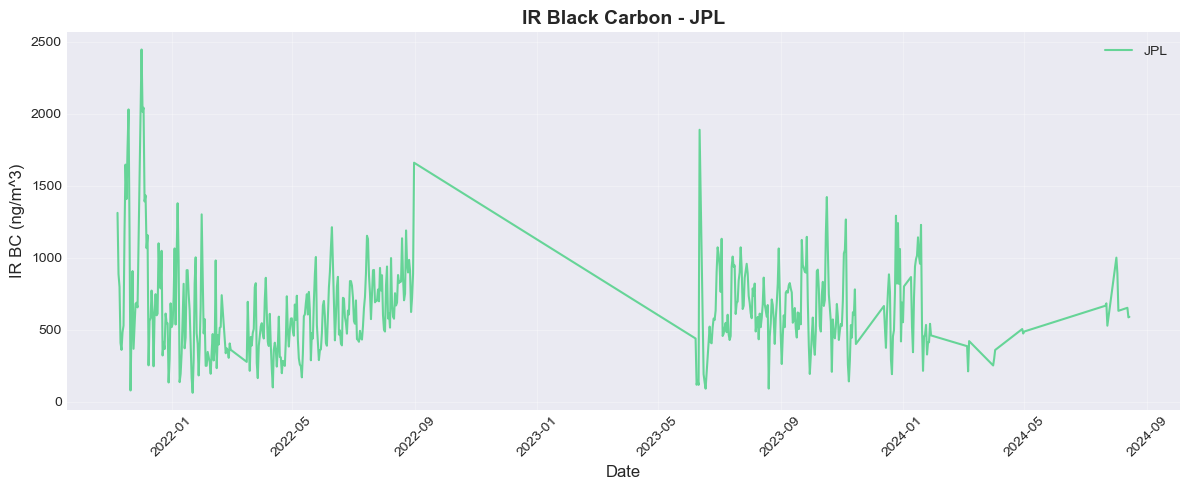

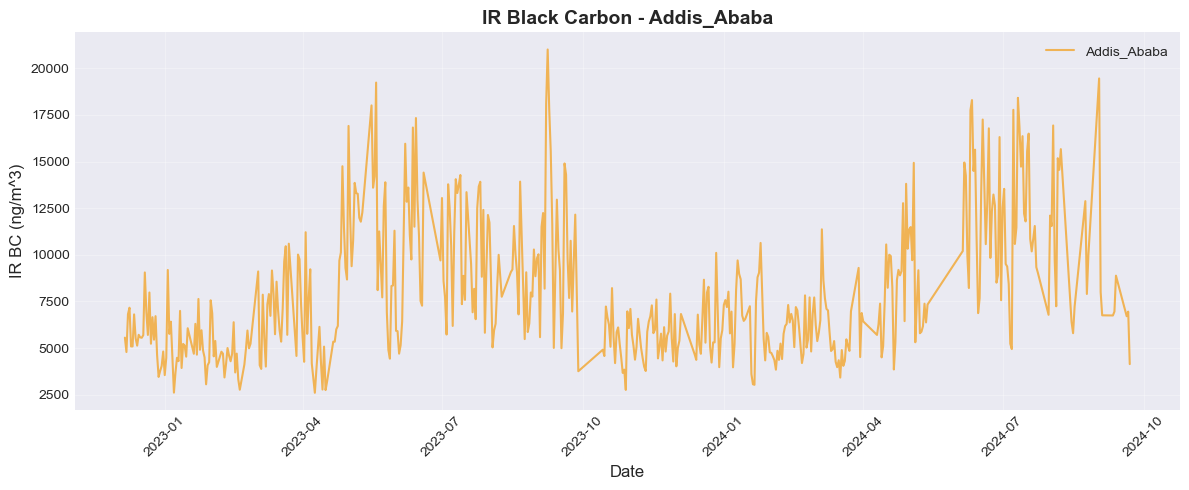

In [26]:
# Individual site time series
for site_name, df in aethalometer_data.items():
    config = SITES[site_name]
    
    fig, ax = plt.subplots(figsize=(12, 5))
    plot_bc_timeseries(ax, site_name, df, config, wavelength='IR')
    
    ax.set_title(f'IR Black Carbon - {site_name}', fontsize=14, fontweight='bold')
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

## 4. Aethalometer vs FTIR EC Cross-Plots

Compare aethalometer BC with filter-based FTIR EC measurements.

In [27]:
# Match data and create cross-plots for each site
all_matched_data = {}

for site_name in SITES:
    if site_name not in aethalometer_data:
        continue
    
    config = SITES[site_name]
    df_aeth = aethalometer_data[site_name]
    
    # Match aethalometer and filter data
    matched = match_aeth_filter_data(
        site_name, df_aeth, filter_data, config['code']
    )
    
    if matched is not None and len(matched) >= 3:
        all_matched_data[site_name] = matched
        print(f"{site_name}: {len(matched)} matched pairs")
    else:
        print(f"{site_name}: Insufficient matched data")

Beijing: 65 matched pairs
Delhi: 24 matched pairs
JPL: 42 matched pairs
Addis_Ababa: 181 matched pairs


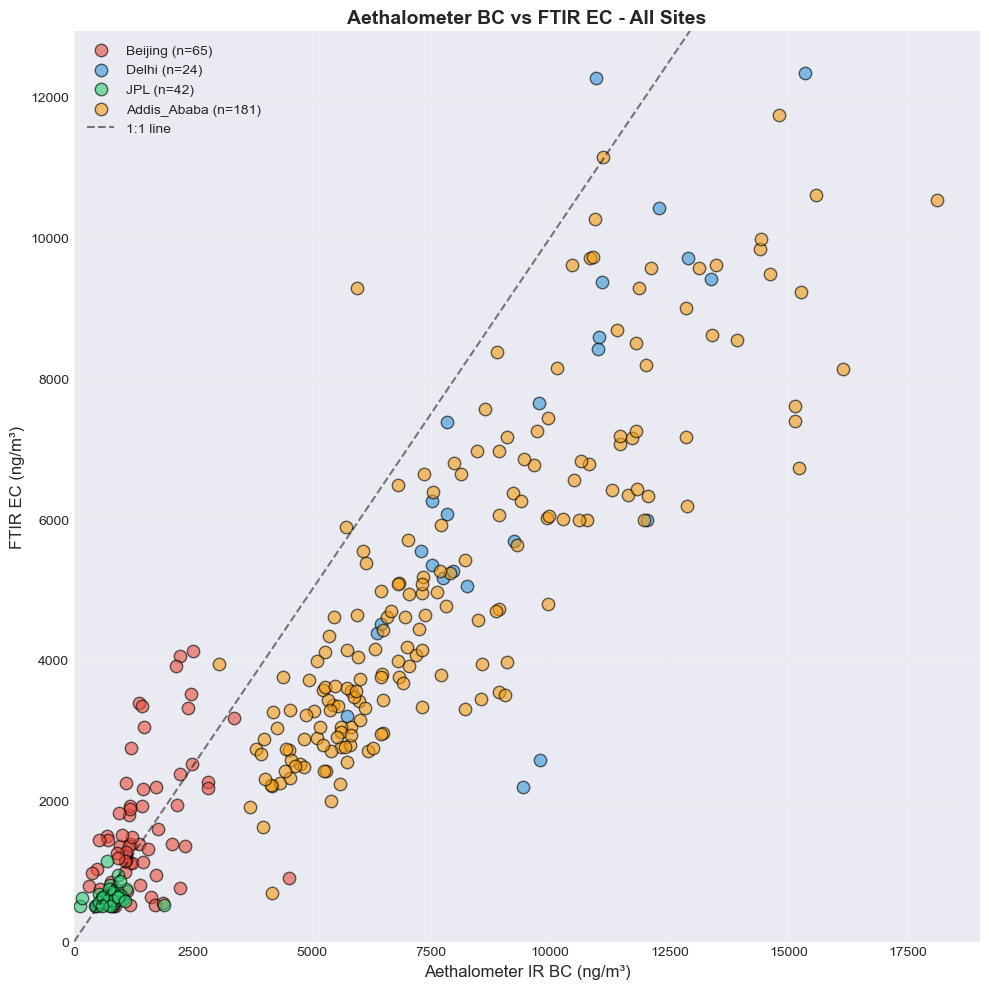

In [28]:
# Combined scatter plot - all sites
fig, ax = plt.subplots(figsize=(10, 10))

for site_name, matched_df in all_matched_data.items():
    config = SITES[site_name]
    ax.scatter(
        matched_df['aeth_bc'], matched_df['filter_ec'],
        color=config['color'], alpha=0.6, s=80,
        edgecolors='black', linewidth=1,
        label=f"{site_name} (n={len(matched_df)})"
    )

# Set axes to start from 0
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

# Add 1:1 line
max_val = max(ax.get_xlim()[1], ax.get_ylim()[1])
ax.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, linewidth=1.5, label='1:1 line')

ax.set_xlabel('Aethalometer IR BC (ng/m³)', fontsize=12)
ax.set_ylabel('FTIR EC (ng/m³)', fontsize=12)
ax.set_title('Aethalometer BC vs FTIR EC - All Sites', fontsize=14, fontweight='bold')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

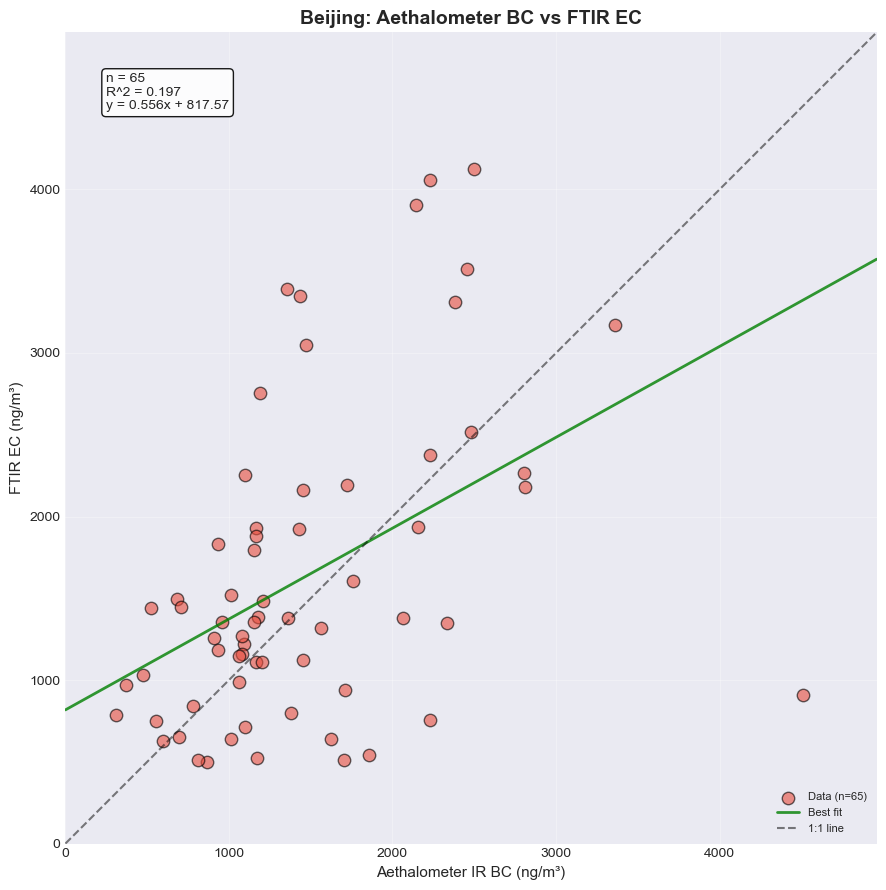

Beijing: R² = 0.197, Slope = 0.556



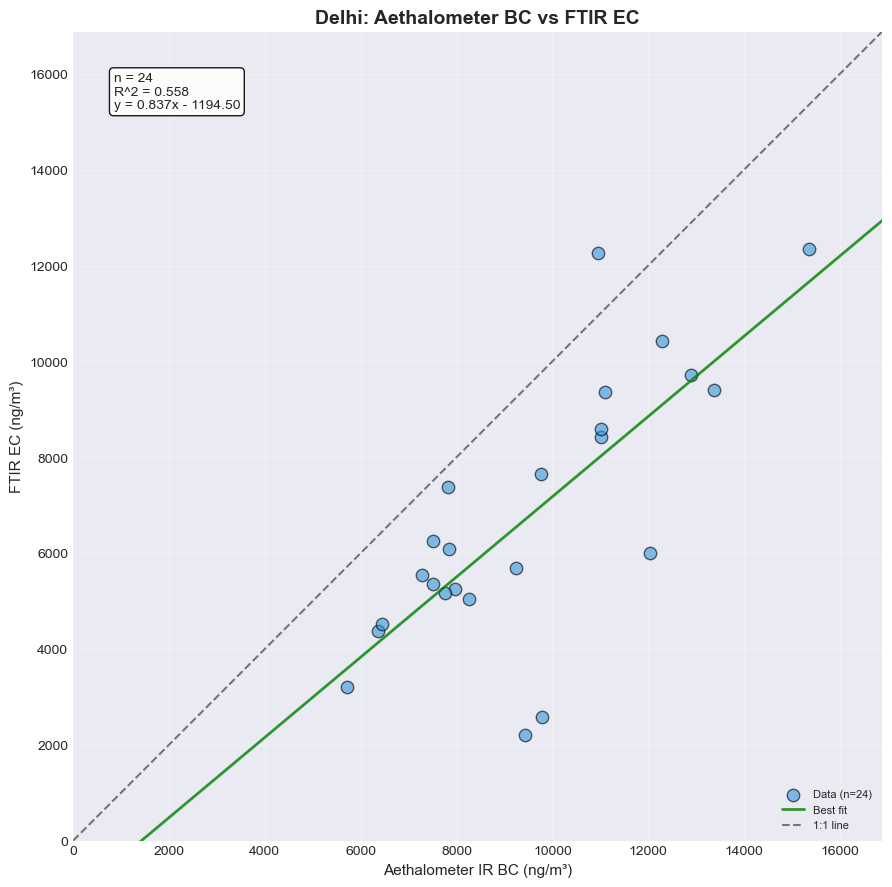

Delhi: R² = 0.558, Slope = 0.837



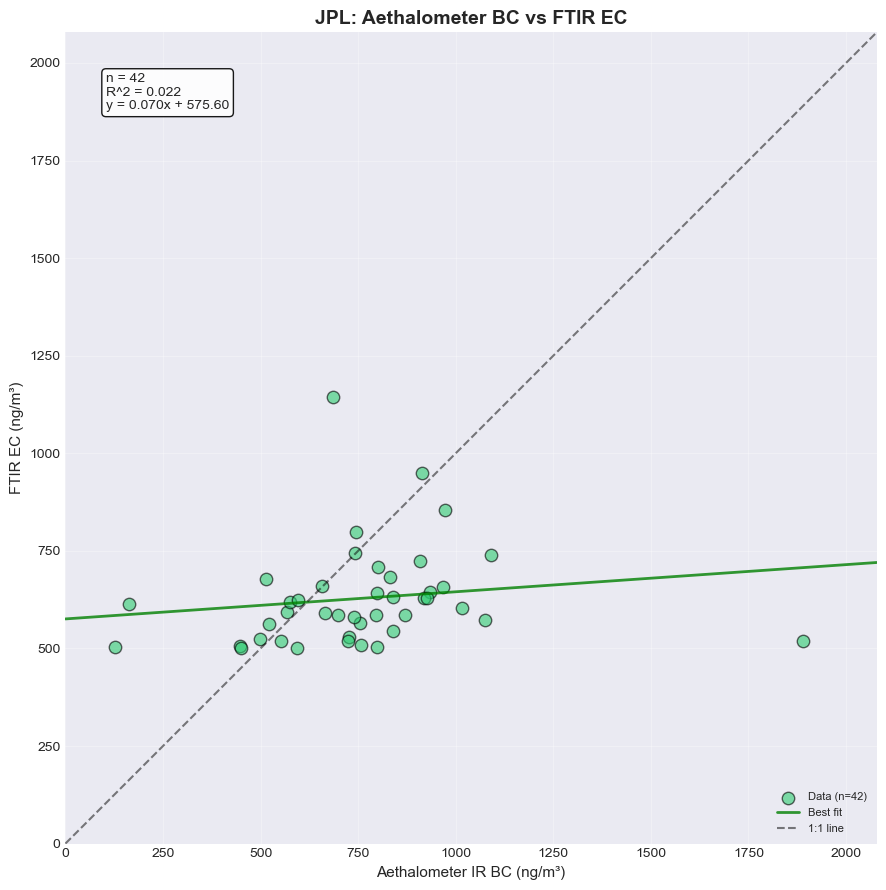

JPL: R² = 0.022, Slope = 0.070



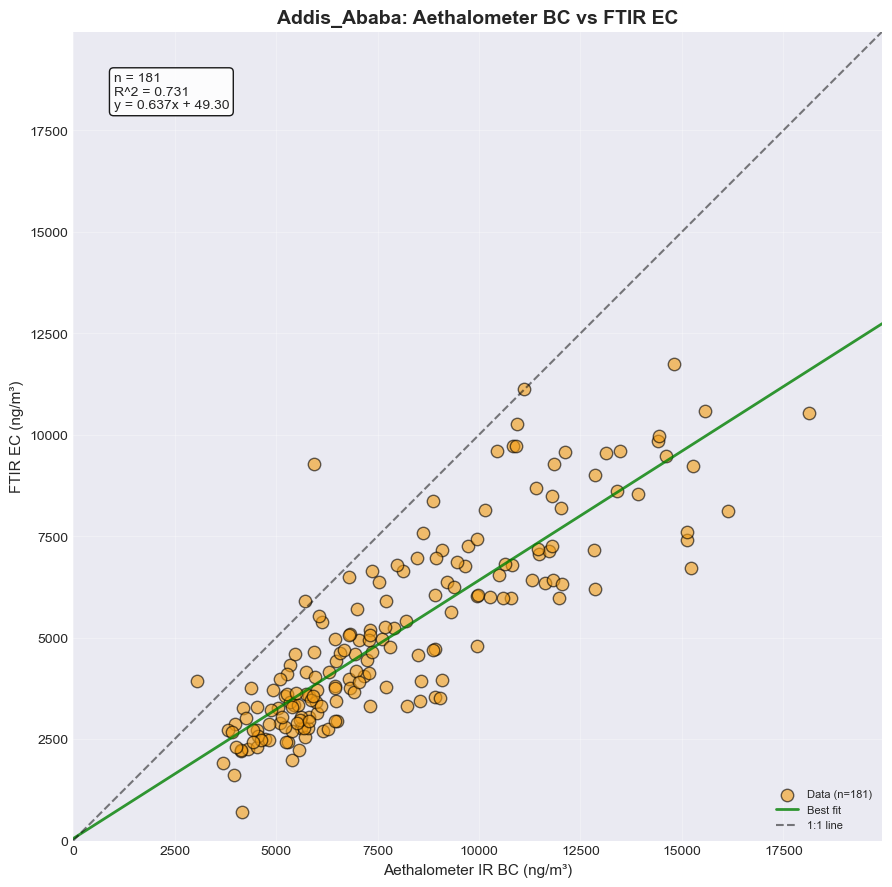

Addis_Ababa: R² = 0.731, Slope = 0.637



In [29]:
# Individual cross-plots with regression stats
site_stats = {}

for site_name, matched_df in all_matched_data.items():
    config = SITES[site_name]
    
    fig, ax = plt.subplots(figsize=(9, 9))
    
    stats = plot_crossplot(
        ax,
        matched_df['aeth_bc'].values,
        matched_df['filter_ec'].values,
        'Aethalometer IR BC (ng/m³)',
        'FTIR EC (ng/m³)',
        color=config['color'],
        equal_axes=True
    )
    
    ax.set_title(f'{site_name}: Aethalometer BC vs FTIR EC', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    if stats:
        site_stats[site_name] = stats
        print(f"{site_name}: R² = {stats['r_squared']:.3f}, Slope = {stats['slope']:.3f}\n")

## 5. Outlier Detection and Removal

Apply manual outlier exclusions and see the impact on regression statistics.

In [30]:
# Show current outlier configuration
print("Current EXCLUDED_SAMPLES registry:")
print("="*60)
for site, exclusions in EXCLUDED_SAMPLES.items():
    print(f"\n{site}: {len(exclusions)} exclusion(s)")
    for excl in exclusions:
        print(f"  - {excl['date']}: {excl['reason'][:50]}...")

Current EXCLUDED_SAMPLES registry:

Beijing: 1 exclusion(s)
  - 2022-05-15: Extreme aethalometer BC outlier - affects slope si...

Delhi: 2 exclusion(s)
  - 2023-01-10: High aethalometer (~10000) with low FTIR EC (~2000...
  - 2023-01-15: High aethalometer (~9500) with low FTIR EC (~2500)...

JPL: 2 exclusion(s)
  - 2022-06-20: Pre-flow-fix period - aethalometer BC > 1700 thres...
  - 2022-07-05: FTIR EC > 1000 threshold - likely contamination...

Addis_Ababa: 0 exclusion(s)


In [31]:
# Find actual outlier dates from your data
# Run this to identify dates to add to EXCLUDED_SAMPLES in outliers.py

print("Finding outlier dates based on MANUAL_OUTLIERS thresholds...")
print("="*60)

for site_name, matched_df in all_matched_data.items():
    criteria = MANUAL_OUTLIERS.get(site_name, {}).get('remove_criteria', [])
    
    if not criteria:
        print(f"\n{site_name}: No thresholds defined")
        continue
    
    print(f"\n{site_name}:")
    for crit in criteria:
        identify_outlier_dates(site_name, matched_df, crit)

Finding outlier dates based on MANUAL_OUTLIERS thresholds...

Beijing:

# Beijing outliers to add to EXCLUDED_SAMPLES:
'Beijing': [
    {
        'date': '2023-10-21',
        'filter_id': 'CHTS-0803-2',
        'aeth_bc_approx': 4510,
        'reason': 'Aeth BC (4510) > 4000'
    },
],

Delhi:

# Delhi outliers to add to EXCLUDED_SAMPLES:
'Delhi': [
    {
        'date': '2024-03-29',
        'filter_id': 'INDH-0129-1',
        'aeth_bc_approx': 11007,
        'reason': 'Aeth BC (11007) > 8000'
    },
    {
        'date': '2024-04-07',
        'filter_id': 'INDH-0132-4',
        'aeth_bc_approx': 8258,
        'reason': 'Aeth BC (8258) > 8000'
    },
    {
        'date': '2024-04-10',
        'filter_id': 'INDH-0133-5',
        'aeth_bc_approx': 11017,
        'reason': 'Aeth BC (11017) > 8000'
    },
    {
        'date': '2024-05-01',
        'filter_id': 'INDH-0139-3',
        'aeth_bc_approx': 9426,
        'reason': 'Aeth BC (9426) > 8000; High aeth (9426) with low EC (2194)'
 


Beijing Exclusion Summary:
  Total: 65
  Date-based exclusions: 0
  Threshold-based outliers: 1
  Combined excluded: 1
  Retained: 64


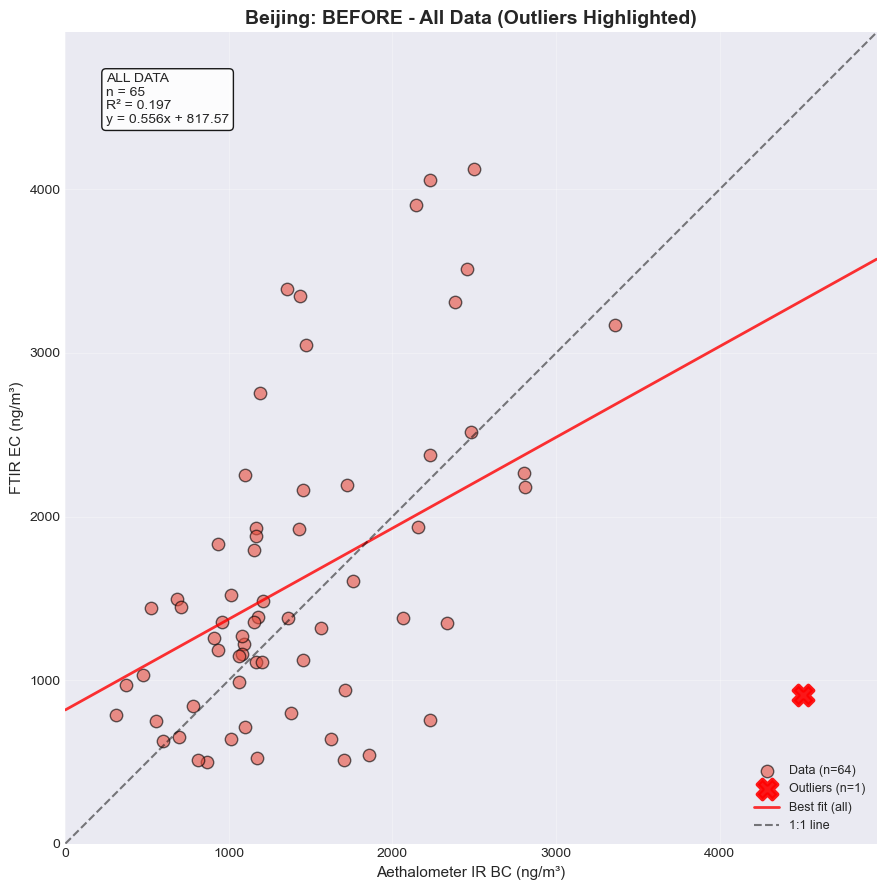

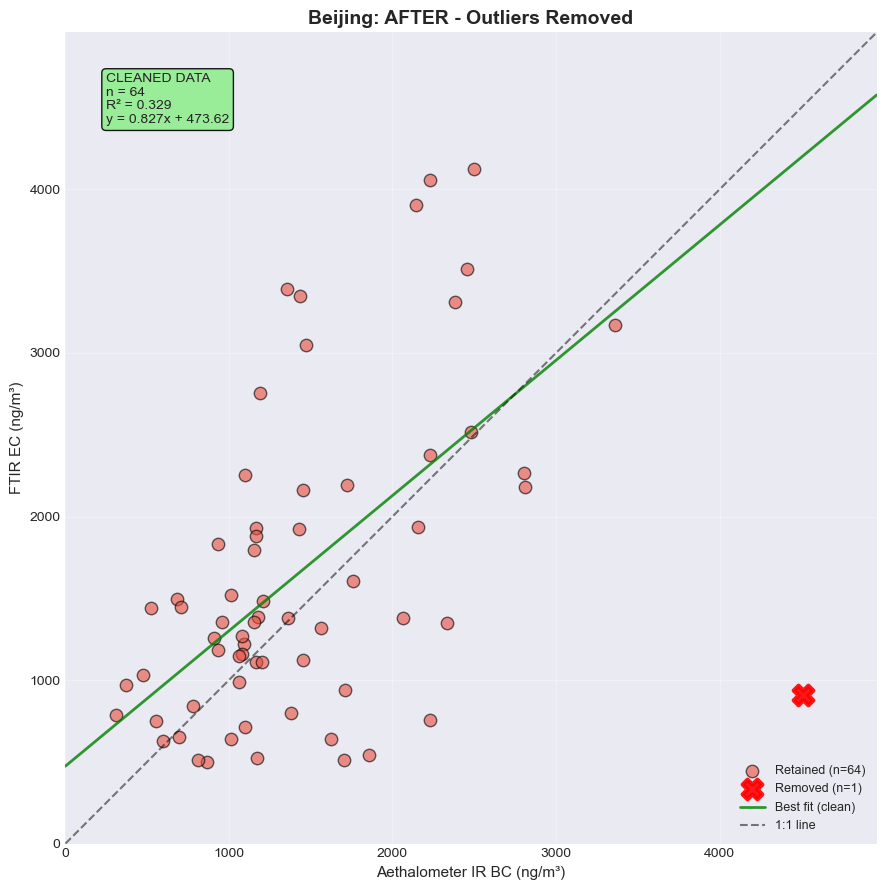


  Impact of outlier removal:
    R²: 0.197 → 0.329 (Δ = +0.131)
    Slope: 0.556 → 0.827


Delhi Exclusion Summary:
  Total: 24
  Date-based exclusions: 0
  Threshold-based outliers: 2
  Combined excluded: 2
  Retained: 22


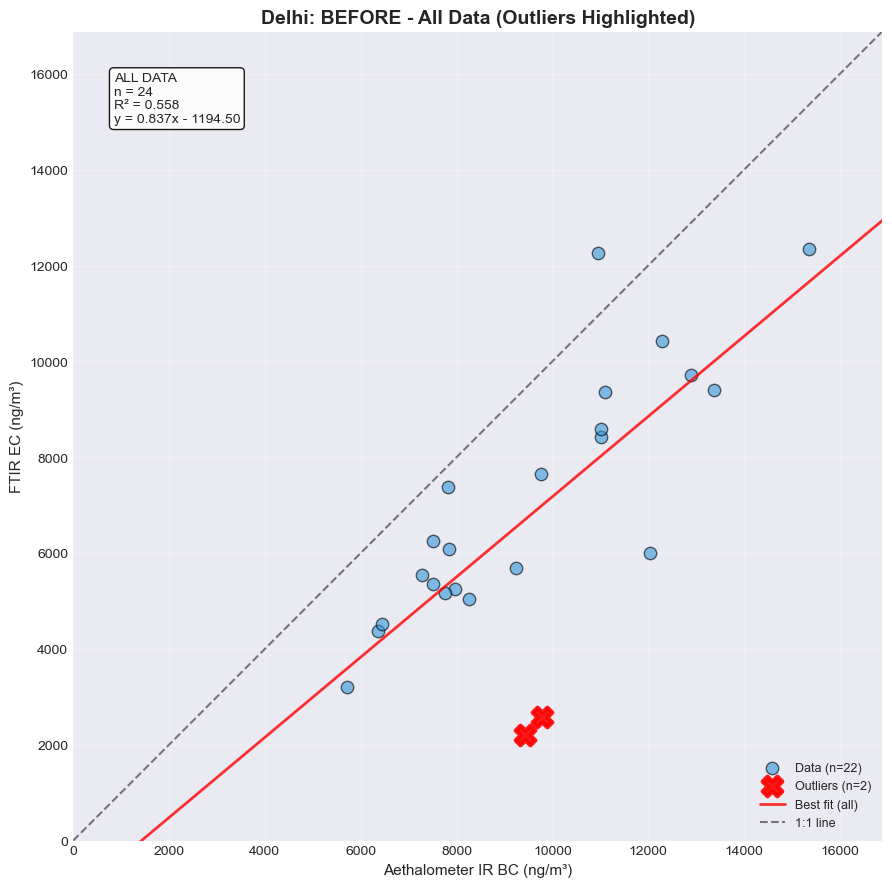

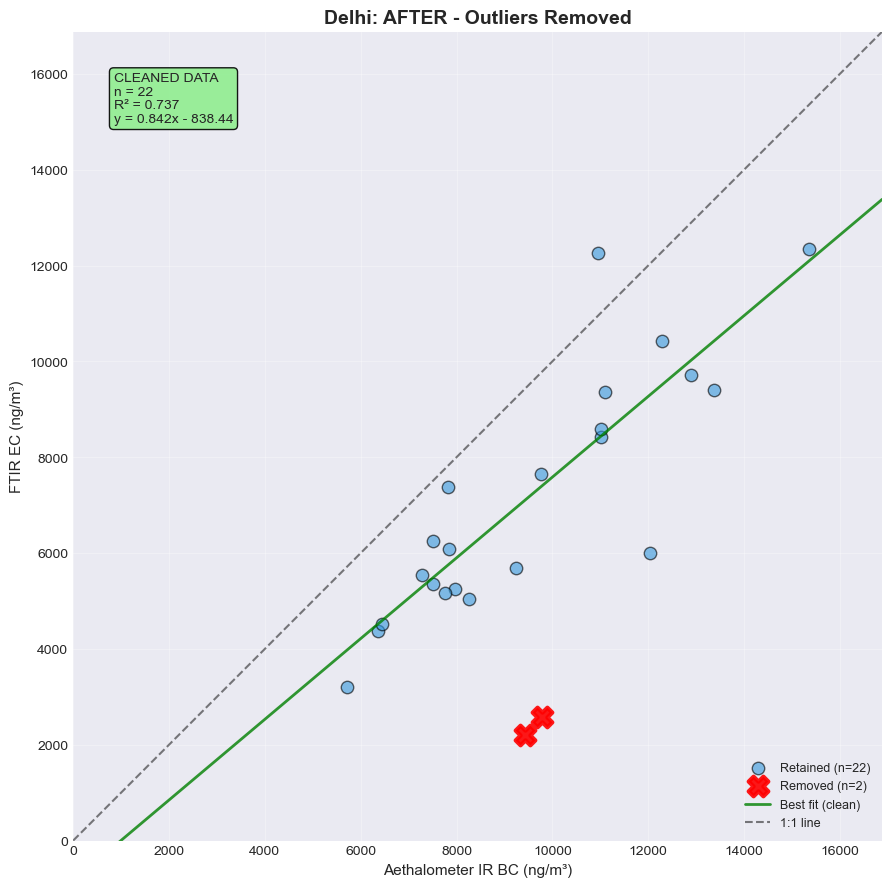


  Impact of outlier removal:
    R²: 0.558 → 0.737 (Δ = +0.180)
    Slope: 0.837 → 0.842


JPL Exclusion Summary:
  Total: 42
  Date-based exclusions: 0
  Threshold-based outliers: 2
  Combined excluded: 2
  Retained: 40


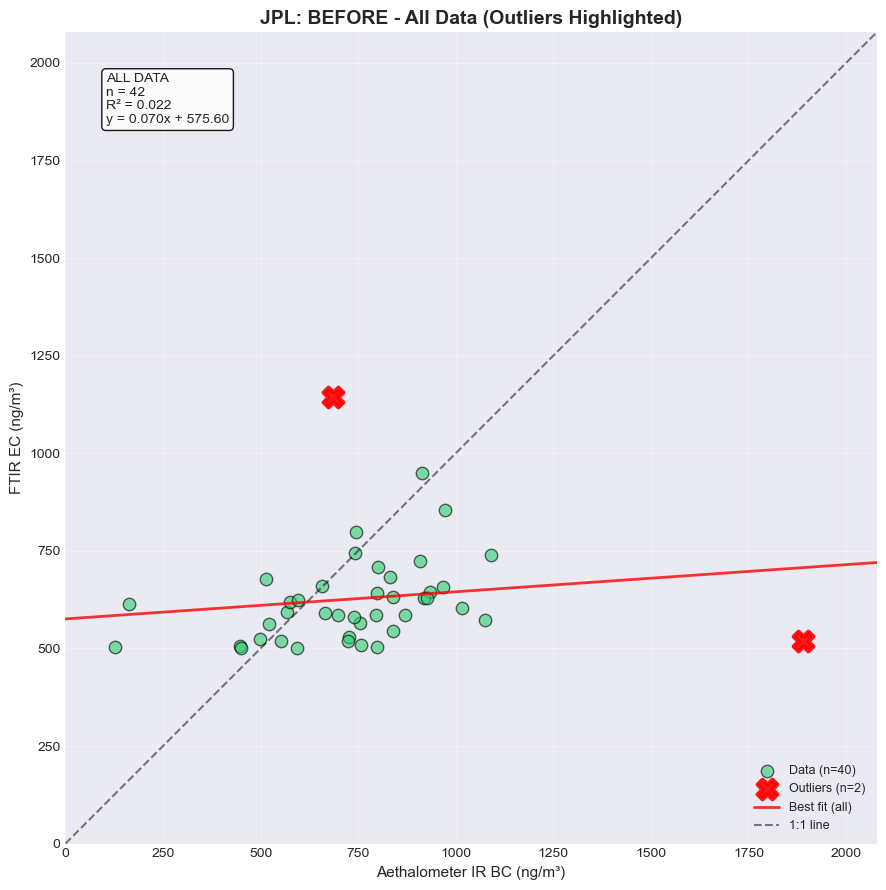

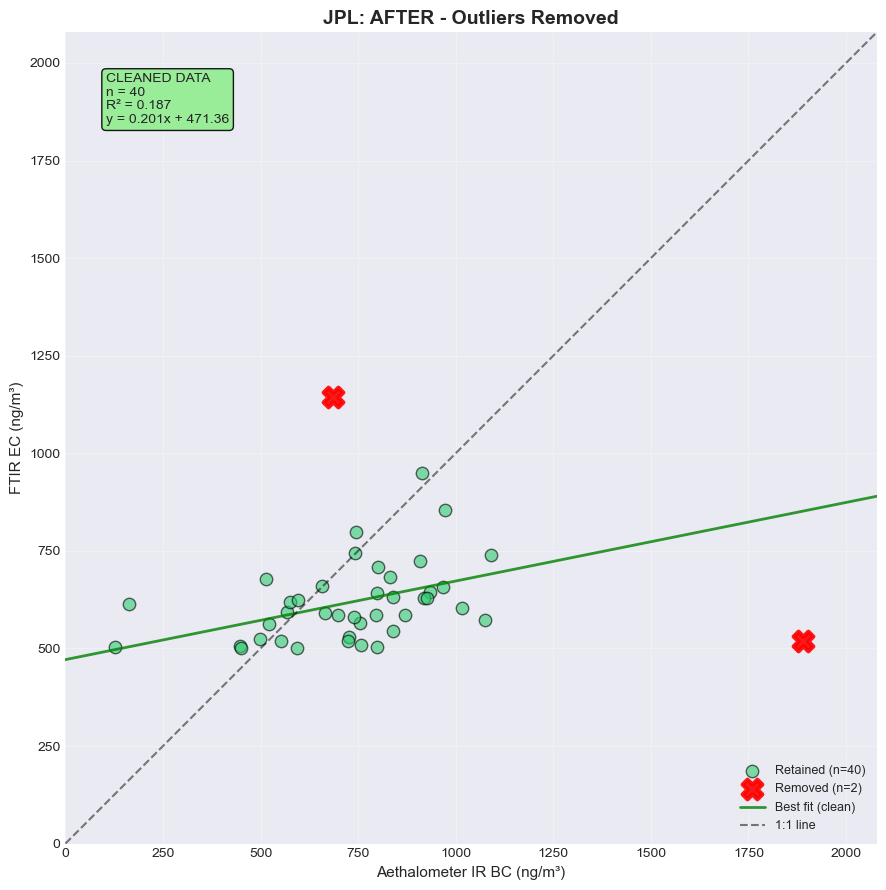


  Impact of outlier removal:
    R²: 0.022 → 0.187 (Δ = +0.164)
    Slope: 0.070 → 0.201


Addis_Ababa Exclusion Summary:
  Total: 181
  Date-based exclusions: 0
  Threshold-based outliers: 0
  Combined excluded: 0
  Retained: 181
  No outliers flagged for Addis_Ababa


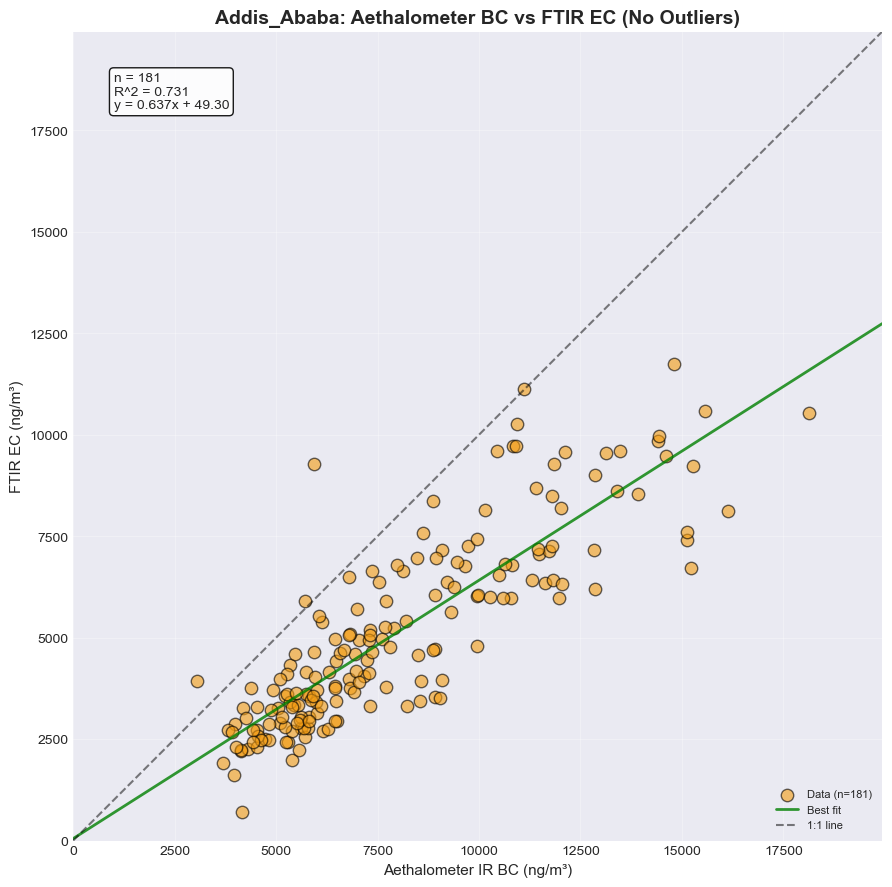

In [32]:
# Apply threshold-based outlier flagging and create before/after plots (separate)

for site_name, matched_df in all_matched_data.items():
    config = SITES[site_name]
    
    # Apply threshold-based outlier flags
    matched_with_flags = apply_threshold_flags(matched_df.copy(), site_name)
    
    # Print summary
    print_exclusion_summary(matched_with_flags, site_name)
    
    # Check if there are any outliers
    if not matched_with_flags['is_outlier'].any():
        print(f"  No outliers flagged for {site_name}")
        
        # Still show the single plot
        fig, ax = plt.subplots(figsize=(9, 9))
        stats = plot_crossplot(
            ax,
            matched_with_flags['aeth_bc'].values,
            matched_with_flags['filter_ec'].values,
            'Aethalometer IR BC (ng/m³)',
            'FTIR EC (ng/m³)',
            color=config['color'],
            equal_axes=True
        )
        ax.set_title(f'{site_name}: Aethalometer BC vs FTIR EC (No Outliers)', 
                     fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
        print()
        continue
    
    # Calculate axis limits (same for both plots)
    all_vals = np.concatenate([
        matched_with_flags['aeth_bc'].dropna().values,
        matched_with_flags['filter_ec'].dropna().values
    ])
    max_val = all_vals.max() * 1.1
    
    x_data = matched_with_flags['aeth_bc'].values
    y_data = matched_with_flags['filter_ec'].values
    outlier_mask = matched_with_flags['is_outlier'].values
    
    # ---- BEFORE: All Data ----
    fig, ax = plt.subplots(figsize=(9, 9))
    
    # Plot non-outlier points
    ax.scatter(x_data[~outlier_mask], y_data[~outlier_mask], 
               color=config['color'], alpha=0.6, s=80,
               edgecolors='black', linewidth=1, label=f'Data (n={(~outlier_mask).sum()})')
    
    # Plot outliers as red X
    ax.scatter(x_data[outlier_mask], y_data[outlier_mask],
               color='red', alpha=0.9, s=200, marker='X', linewidths=3,
               label=f'Outliers (n={outlier_mask.sum()})')
    
    # Regression on ALL data
    stats_all = calculate_regression_stats(x_data, y_data)
    if stats_all:
        x_line = np.array([0, max_val])
        y_line = stats_all['slope'] * x_line + stats_all['intercept']
        ax.plot(x_line, y_line, 'r-', linewidth=2, alpha=0.8, label='Best fit (all)')
        
        sign = '+' if stats_all['intercept'] >= 0 else '-'
        eq = f"y = {stats_all['slope']:.3f}x {sign} {abs(stats_all['intercept']):.2f}"
        stats_text = f"ALL DATA\nn = {stats_all['n']}\nR² = {stats_all['r_squared']:.3f}\n{eq}"
        ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=10,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))
    
    ax.set_xlim(0, max_val)
    ax.set_ylim(0, max_val)
    ax.set_aspect('equal', adjustable='box')
    ax.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, linewidth=1.5, label='1:1 line')
    ax.set_xlabel('Aethalometer IR BC (ng/m³)', fontsize=11)
    ax.set_ylabel('FTIR EC (ng/m³)', fontsize=11)
    ax.set_title(f'{site_name}: BEFORE - All Data (Outliers Highlighted)', 
                 fontsize=14, fontweight='bold')
    ax.legend(loc='lower right', fontsize=9)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # ---- AFTER: Outliers Removed ----
    fig, ax = plt.subplots(figsize=(9, 9))
    
    # Plot clean data
    x_clean = x_data[~outlier_mask]
    y_clean = y_data[~outlier_mask]
    ax.scatter(x_clean, y_clean, color=config['color'], alpha=0.6, s=80,
               edgecolors='black', linewidth=1, label=f'Retained (n={len(x_clean)})')
    
    # Show removed points as red X
    ax.scatter(x_data[outlier_mask], y_data[outlier_mask],
               color='red', alpha=0.9, s=200, marker='X', linewidths=3,
               label=f'Removed (n={outlier_mask.sum()})')
    
    # Regression on CLEAN data
    stats_clean = calculate_regression_stats(x_clean, y_clean)
    if stats_clean:
        x_line = np.array([0, max_val])
        y_line = stats_clean['slope'] * x_line + stats_clean['intercept']
        ax.plot(x_line, y_line, 'g-', linewidth=2, alpha=0.8, label='Best fit (clean)')
        
        sign = '+' if stats_clean['intercept'] >= 0 else '-'
        eq = f"y = {stats_clean['slope']:.3f}x {sign} {abs(stats_clean['intercept']):.2f}"
        stats_text = f"CLEANED DATA\nn = {stats_clean['n']}\nR² = {stats_clean['r_squared']:.3f}\n{eq}"
        ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=10,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.9))
    
    ax.set_xlim(0, max_val)
    ax.set_ylim(0, max_val)
    ax.set_aspect('equal', adjustable='box')
    ax.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, linewidth=1.5, label='1:1 line')
    ax.set_xlabel('Aethalometer IR BC (ng/m³)', fontsize=11)
    ax.set_ylabel('FTIR EC (ng/m³)', fontsize=11)
    ax.set_title(f'{site_name}: AFTER - Outliers Removed', 
                 fontsize=14, fontweight='bold')
    ax.legend(loc='lower right', fontsize=9)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Print impact
    if stats_all and stats_clean:
        print(f"\n  Impact of outlier removal:")
        print(f"    R²: {stats_all['r_squared']:.3f} → {stats_clean['r_squared']:.3f} "
              f"(Δ = {stats_clean['r_squared'] - stats_all['r_squared']:+.3f})")
        print(f"    Slope: {stats_all['slope']:.3f} → {stats_clean['slope']:.3f}")
    
    print()

## 6. Smooth vs Raw BC Analysis

Analyze the impact of smooth/raw BC differences on data quality.

In [33]:
# Match data with smooth/raw info
smooth_raw_data = {}

for site_name in SITES:
    if site_name not in aethalometer_data:
        continue
    
    config = SITES[site_name]
    df_aeth = aethalometer_data[site_name]
    
    matched = match_with_smooth_raw_info(
        site_name, df_aeth, filter_data, config['code']
    )
    
    if matched is not None and len(matched) >= 3:
        n_with_smooth = matched['smooth_raw_abs_pct'].notna().sum()
        smooth_raw_data[site_name] = matched
        print(f"{site_name}: {len(matched)} matched, {n_with_smooth} with smooth data")
    else:
        print(f"{site_name}: Insufficient data")

Beijing: 65 matched, 65 with smooth data
Delhi: 24 matched, 24 with smooth data
JPL: 42 matched, 42 with smooth data
Addis_Ababa: 181 matched, 181 with smooth data



Beijing: Smooth/Raw Difference Distribution
  n = 65
  Mean: 0.23%
  Median: 0.04%
  Range: 0.00% - 8.38%


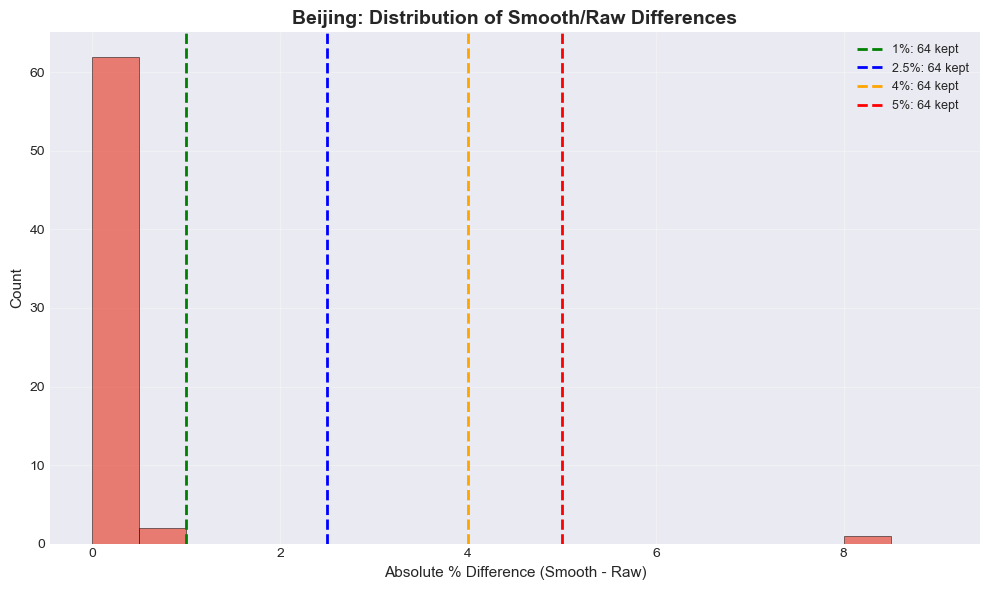

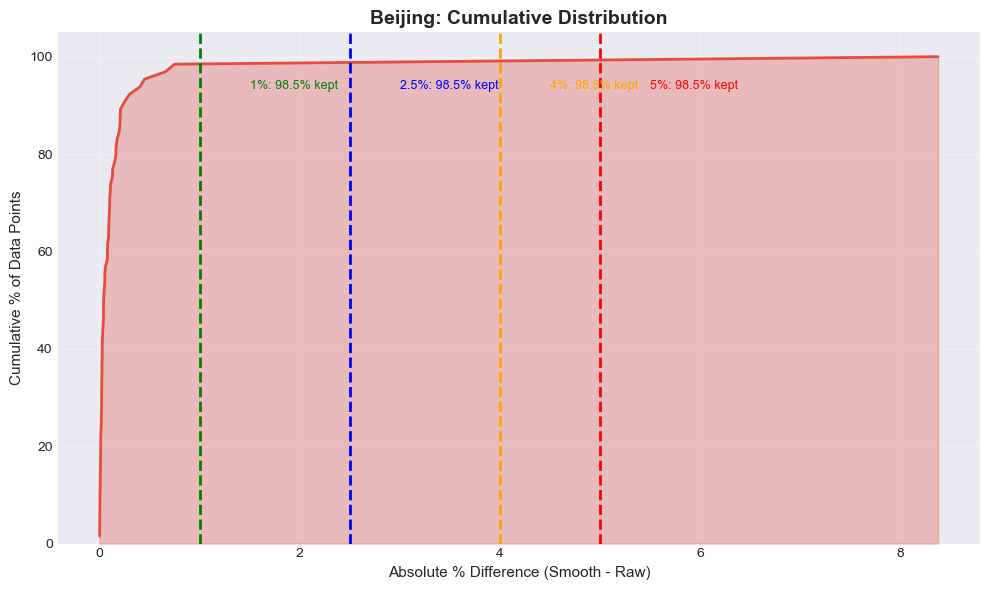


  Points kept at each threshold:
    <=1%: 64/65 (98.5%)
    <=2.5%: 64/65 (98.5%)
    <=4%: 64/65 (98.5%)
    <=5%: 64/65 (98.5%)

Delhi: Smooth/Raw Difference Distribution
  n = 24
  Mean: 0.02%
  Median: 0.01%
  Range: 0.00% - 0.09%


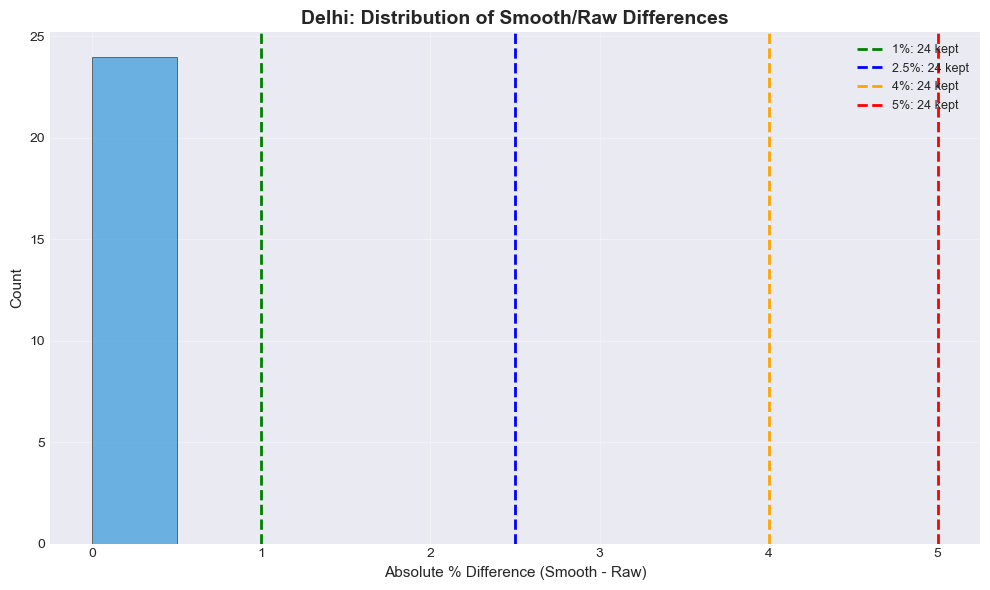

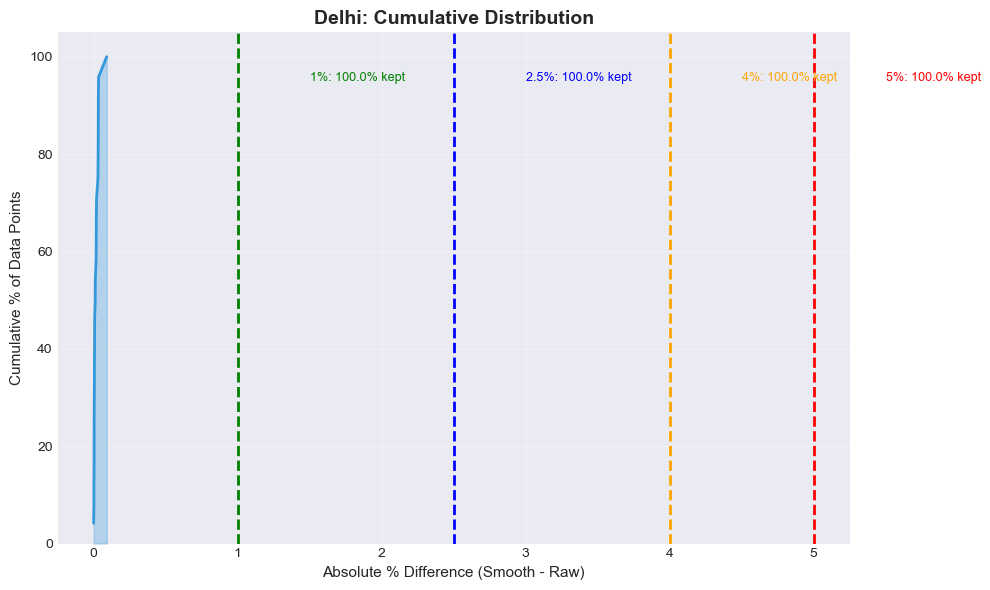


  Points kept at each threshold:
    <=1%: 24/24 (100.0%)
    <=2.5%: 24/24 (100.0%)
    <=4%: 24/24 (100.0%)
    <=5%: 24/24 (100.0%)

JPL: Smooth/Raw Difference Distribution
  n = 42
  Mean: 0.46%
  Median: 0.03%
  Range: 0.00% - 9.26%


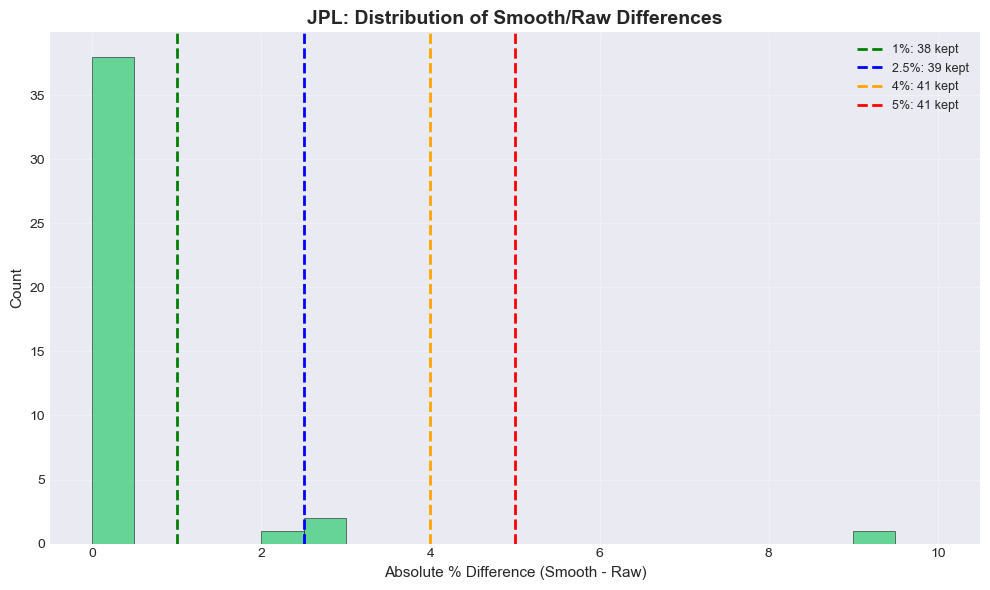

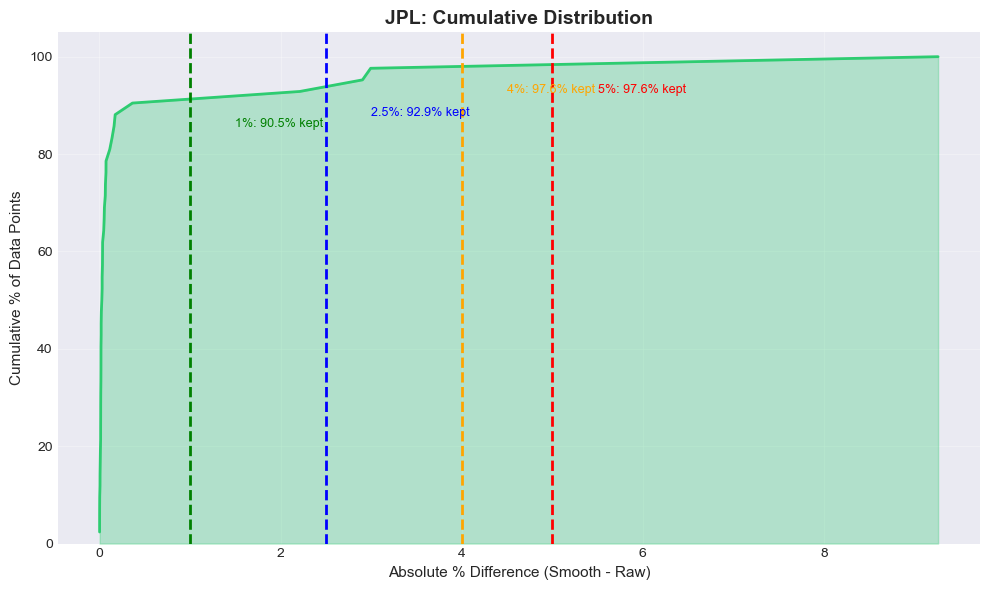


  Points kept at each threshold:
    <=1%: 38/42 (90.5%)
    <=2.5%: 39/42 (92.9%)
    <=4%: 41/42 (97.6%)
    <=5%: 41/42 (97.6%)

Addis_Ababa: Smooth/Raw Difference Distribution
  n = 181
  Mean: 0.06%
  Median: 0.03%
  Range: 0.00% - 0.49%


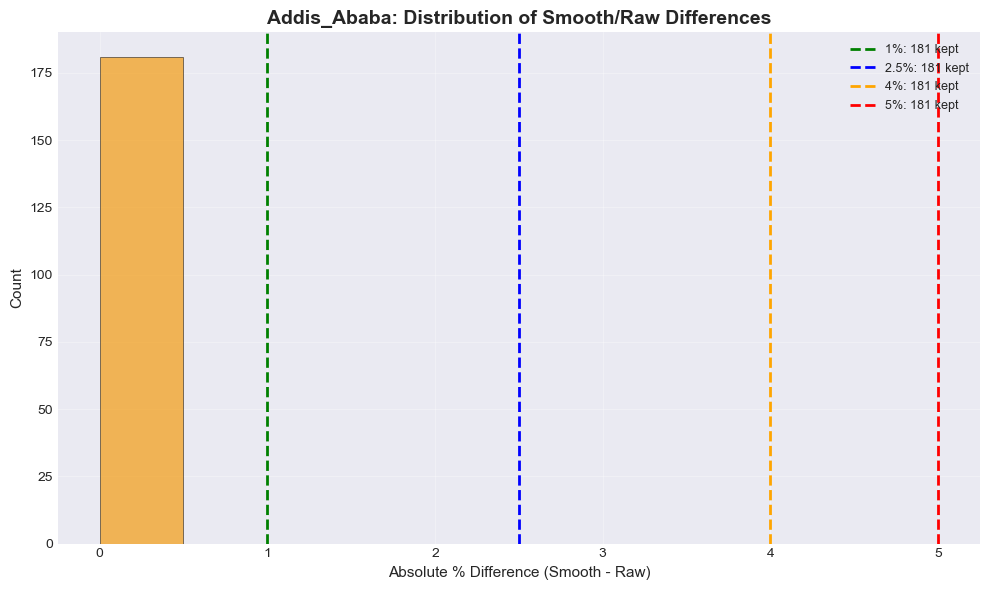

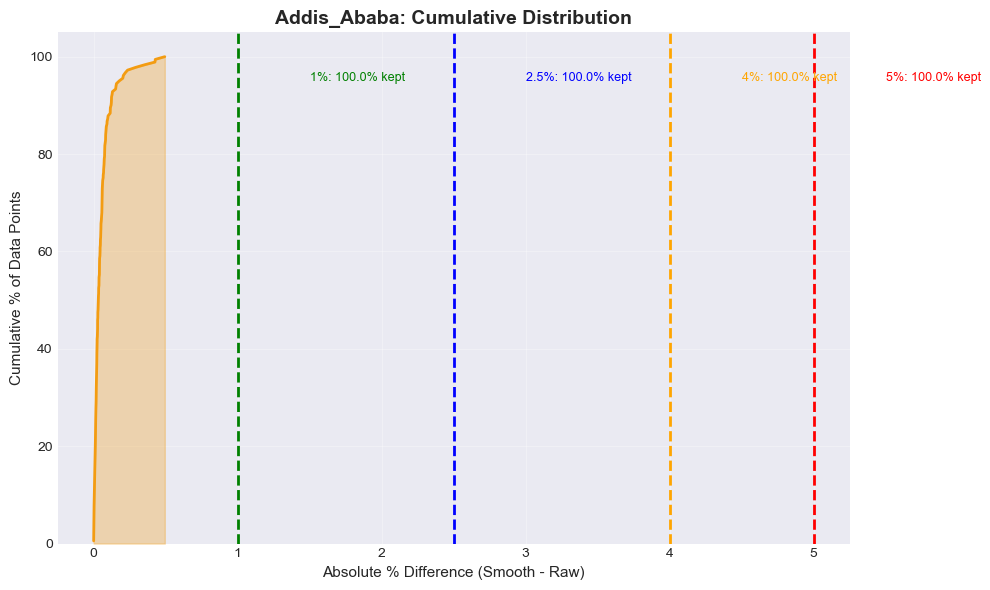


  Points kept at each threshold:
    <=1%: 181/181 (100.0%)
    <=2.5%: 181/181 (100.0%)
    <=4%: 181/181 (100.0%)
    <=5%: 181/181 (100.0%)


In [34]:
# Distribution plots for each site (separate histogram and cumulative)
for site_name, matched_df in smooth_raw_data.items():
    config = SITES[site_name]
    
    valid_diffs = matched_df['smooth_raw_abs_pct'].dropna()
    
    if len(valid_diffs) < 3:
        print(f"{site_name}: Insufficient smooth data")
        continue
    
    print(f"\n{'='*60}")
    print(f"{site_name}: Smooth/Raw Difference Distribution")
    print(f"{'='*60}")
    print(f"  n = {len(valid_diffs)}")
    print(f"  Mean: {valid_diffs.mean():.2f}%")
    print(f"  Median: {valid_diffs.median():.2f}%")
    print(f"  Range: {valid_diffs.min():.2f}% - {valid_diffs.max():.2f}%")
    
    threshold_colors = ['green', 'blue', 'orange', 'red']
    
    # ---- Histogram ----
    fig, ax = plt.subplots(figsize=(10, 6))
    
    bins = np.arange(0, valid_diffs.max() + 1, 0.5)
    ax.hist(valid_diffs, bins=bins, color=config['color'], alpha=0.7,
            edgecolor='black', linewidth=0.5)
    
    for threshold, color in zip(SMOOTH_RAW_THRESHOLDS, threshold_colors):
        n_kept = (valid_diffs <= threshold).sum()
        ax.axvline(x=threshold, color=color, linestyle='--', linewidth=2,
                   label=f'{threshold}%: {n_kept} kept')
    
    ax.set_xlabel('Absolute % Difference (Smooth - Raw)', fontsize=11)
    ax.set_ylabel('Count', fontsize=11)
    ax.set_title(f'{site_name}: Distribution of Smooth/Raw Differences',
                 fontsize=14, fontweight='bold')
    ax.legend(loc='upper right', fontsize=9)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # ---- Cumulative Distribution ----
    fig, ax = plt.subplots(figsize=(10, 6))
    
    sorted_diffs = np.sort(valid_diffs)
    cumulative = np.arange(1, len(sorted_diffs) + 1) / len(sorted_diffs) * 100
    
    ax.plot(sorted_diffs, cumulative, color=config['color'], linewidth=2)
    ax.fill_between(sorted_diffs, cumulative, alpha=0.3, color=config['color'])
    
    for threshold, color in zip(SMOOTH_RAW_THRESHOLDS, threshold_colors):
        pct_below = (valid_diffs <= threshold).sum() / len(valid_diffs) * 100
        ax.axvline(x=threshold, color=color, linestyle='--', linewidth=2)
        ax.annotate(f'{threshold}%: {pct_below:.1f}% kept',
                    xy=(threshold, pct_below), xytext=(threshold + 0.5, pct_below - 5),
                    fontsize=9, color=color)
    
    ax.set_xlabel('Absolute % Difference (Smooth - Raw)', fontsize=11)
    ax.set_ylabel('Cumulative % of Data Points', fontsize=11)
    ax.set_title(f'{site_name}: Cumulative Distribution',
                 fontsize=14, fontweight='bold')
    ax.set_ylim(0, 105)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Print threshold summary
    print(f"\n  Points kept at each threshold:")
    for threshold in SMOOTH_RAW_THRESHOLDS:
        n_kept = (valid_diffs <= threshold).sum()
        pct_kept = n_kept / len(valid_diffs) * 100
        print(f"    <={threshold}%: {n_kept}/{len(valid_diffs)} ({pct_kept:.1f}%)")


Beijing: Smooth/Raw Threshold Analysis


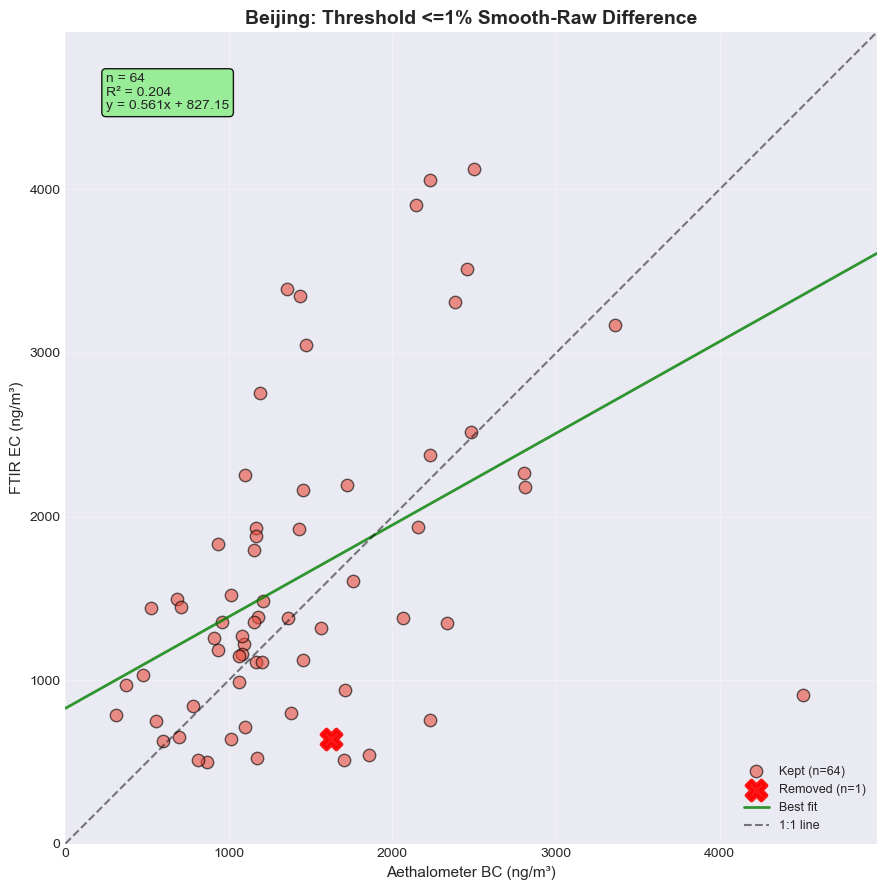

  Threshold <=1%: R² = 0.204, n = 64


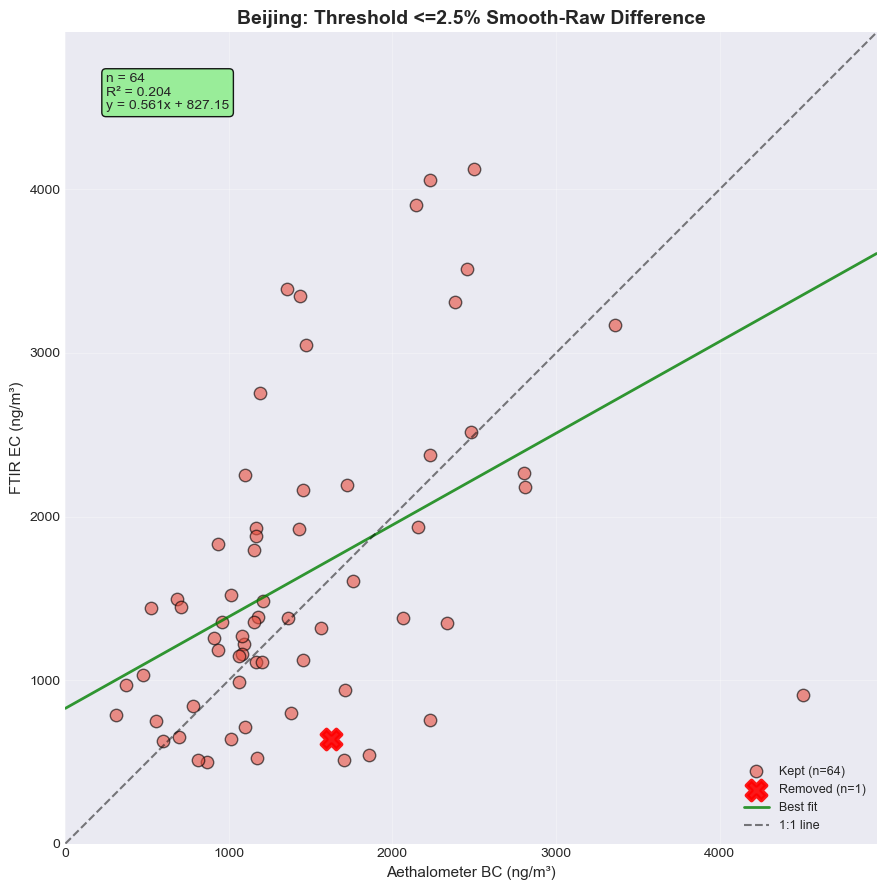

  Threshold <=2.5%: R² = 0.204, n = 64


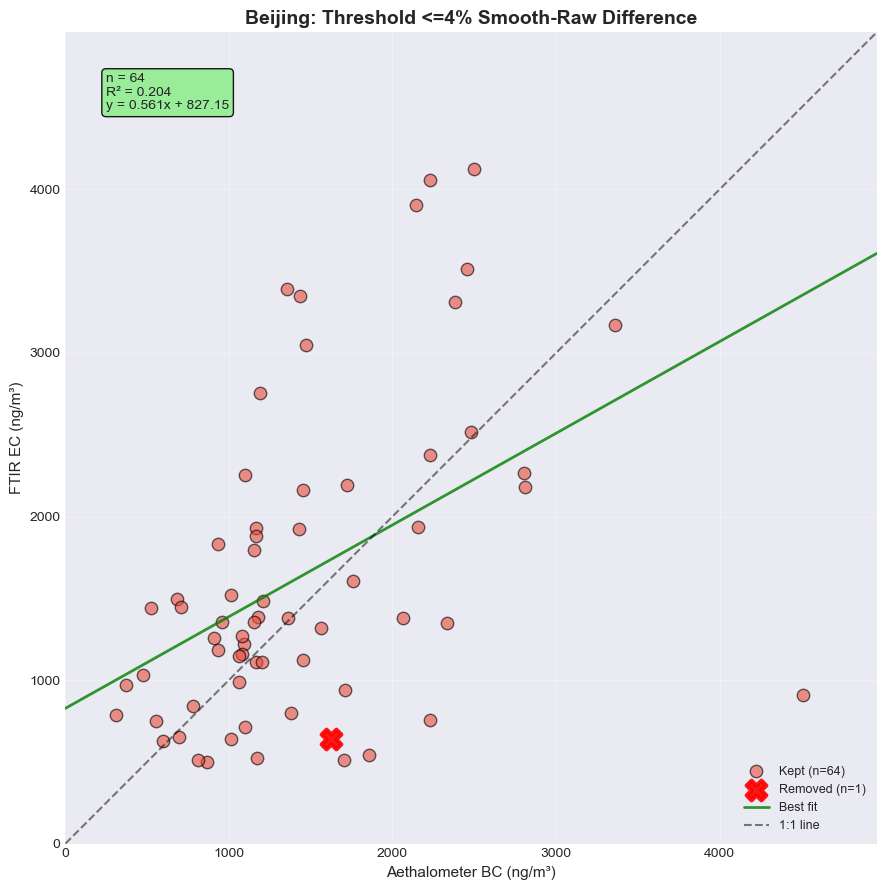

  Threshold <=4%: R² = 0.204, n = 64


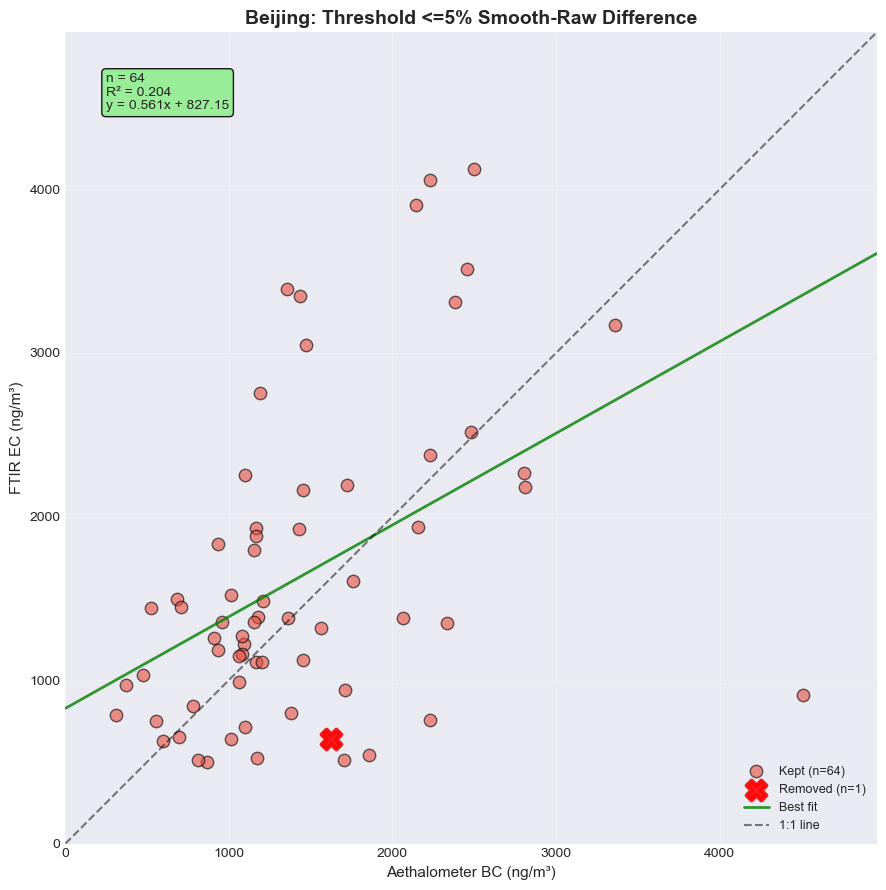

  Threshold <=5%: R² = 0.204, n = 64

Delhi: Smooth/Raw Threshold Analysis


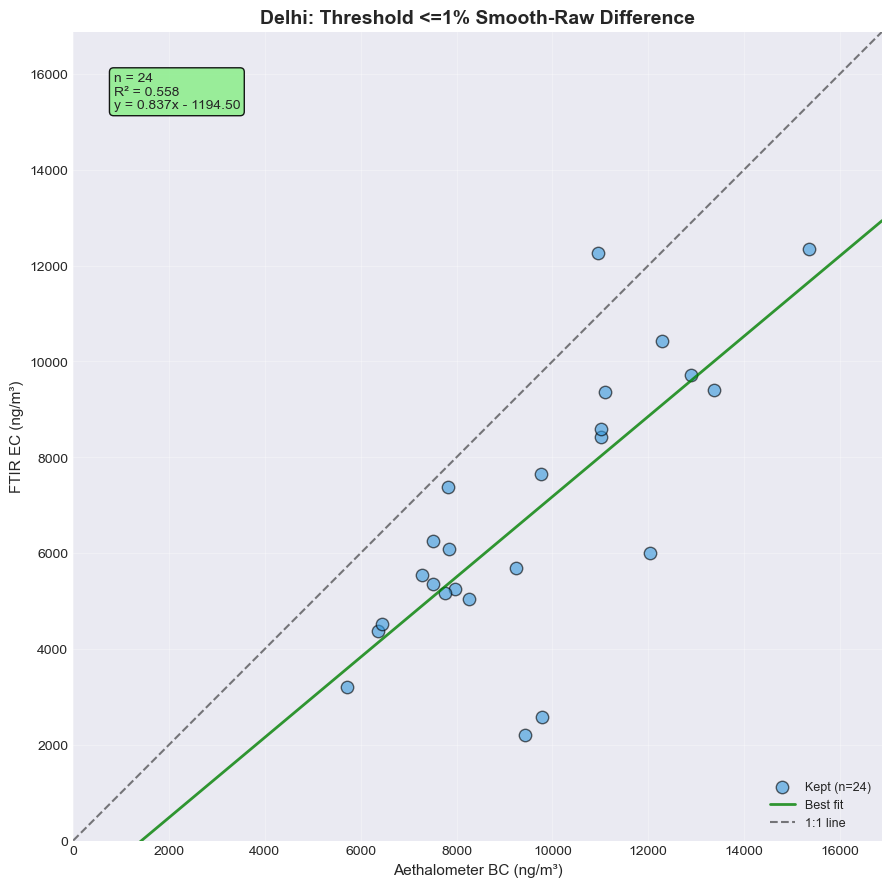

  Threshold <=1%: R² = 0.558, n = 24


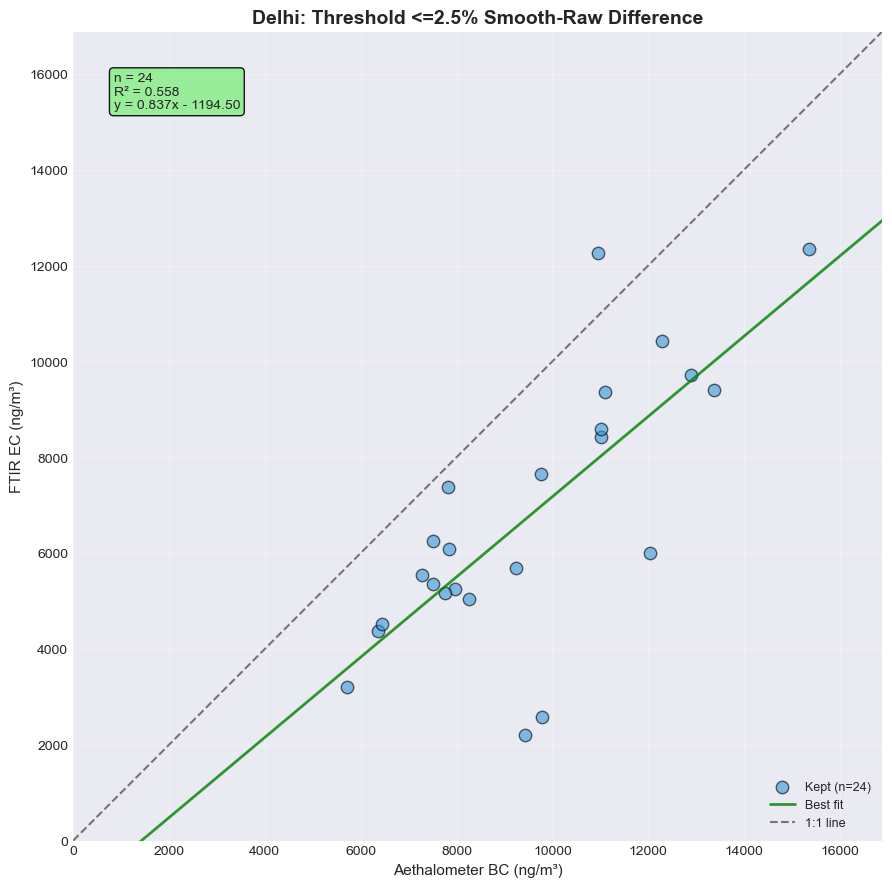

  Threshold <=2.5%: R² = 0.558, n = 24


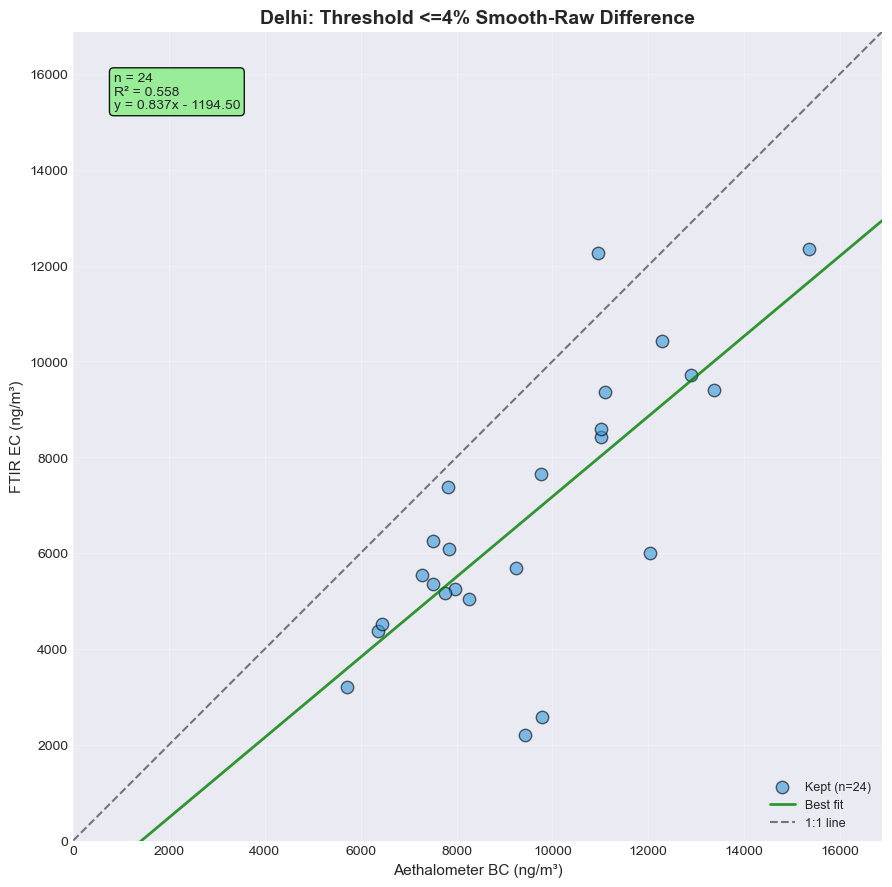

  Threshold <=4%: R² = 0.558, n = 24


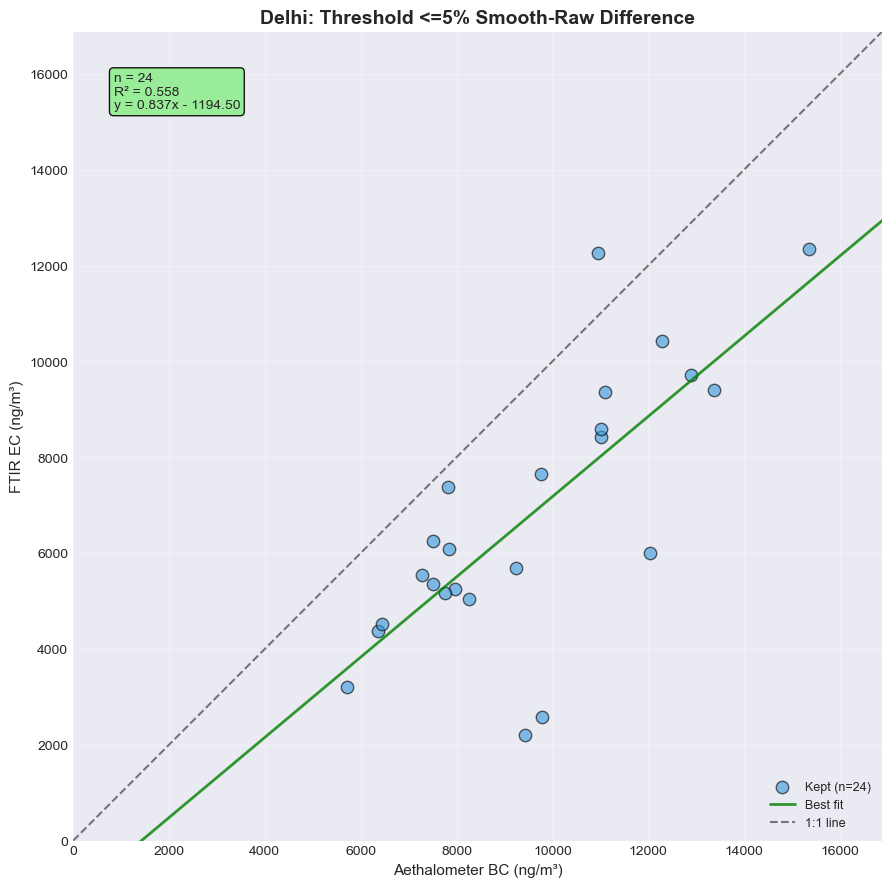

  Threshold <=5%: R² = 0.558, n = 24

JPL: Smooth/Raw Threshold Analysis


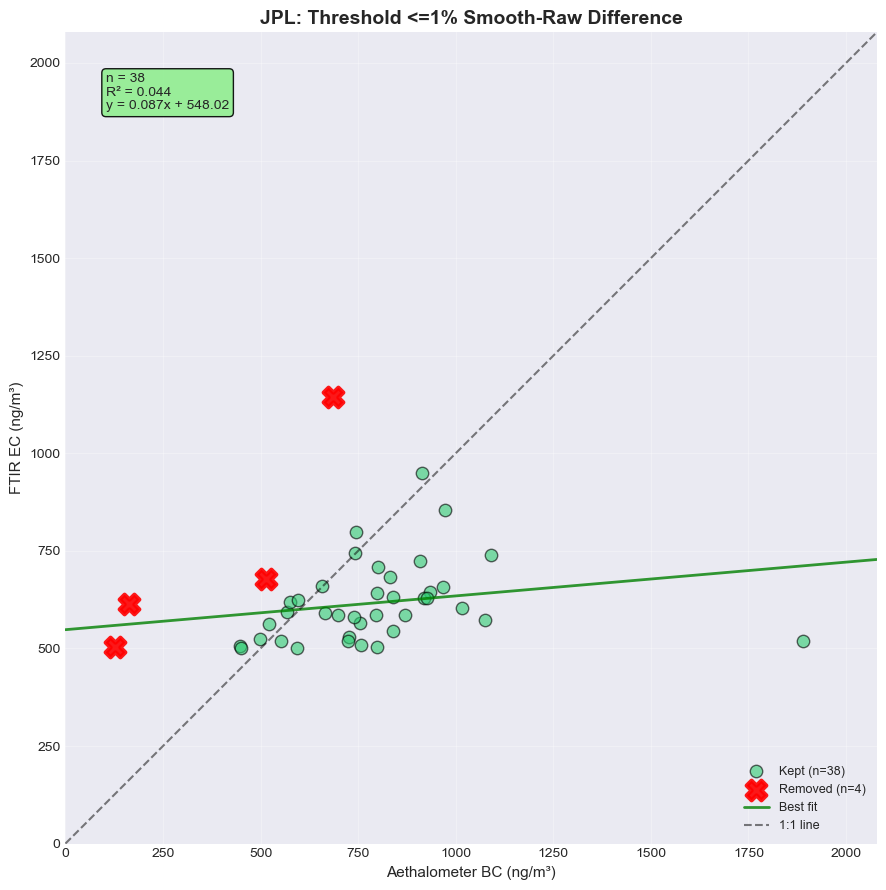

  Threshold <=1%: R² = 0.044, n = 38


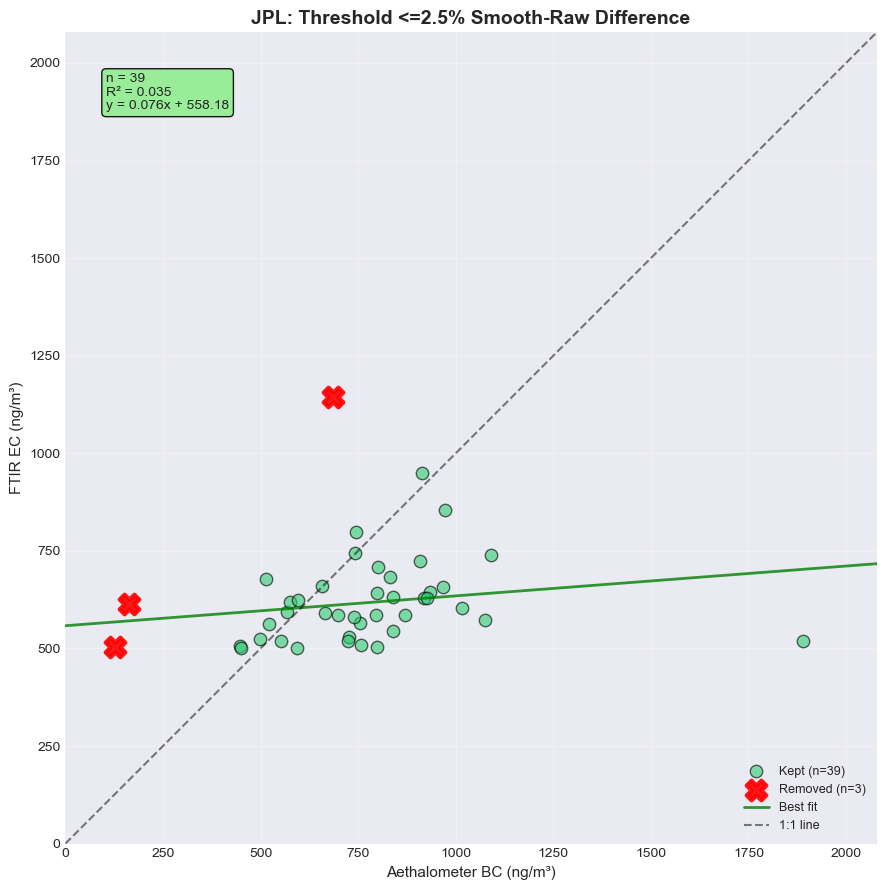

  Threshold <=2.5%: R² = 0.035, n = 39


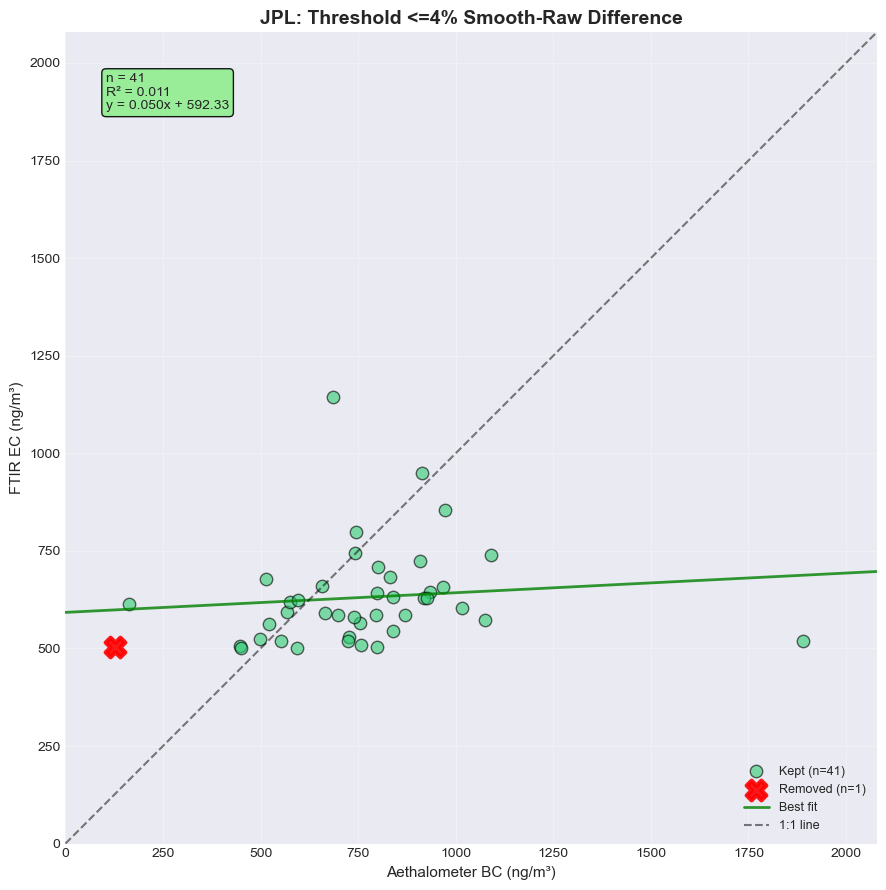

  Threshold <=4%: R² = 0.011, n = 41


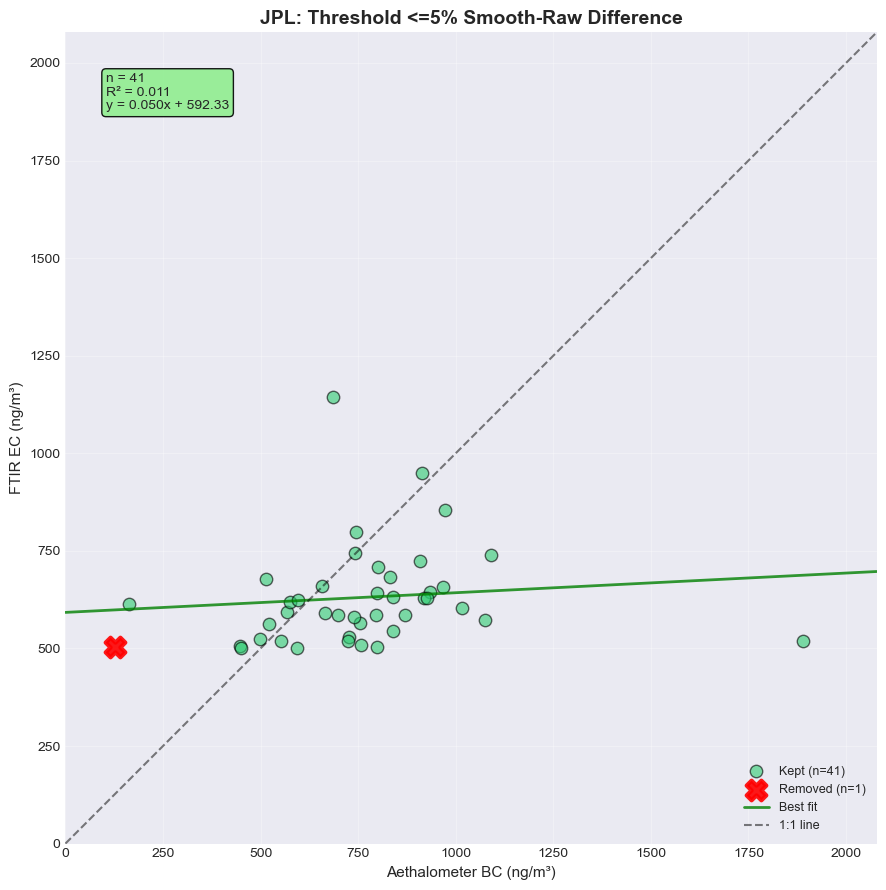

  Threshold <=5%: R² = 0.011, n = 41

Addis_Ababa: Smooth/Raw Threshold Analysis


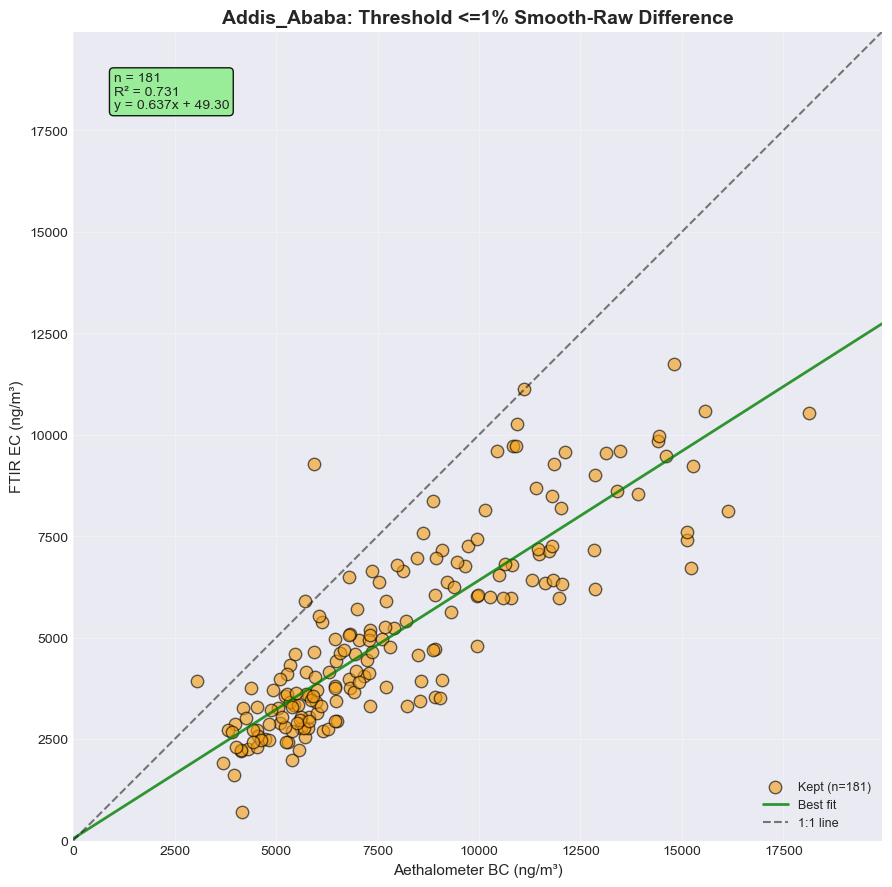

  Threshold <=1%: R² = 0.731, n = 181


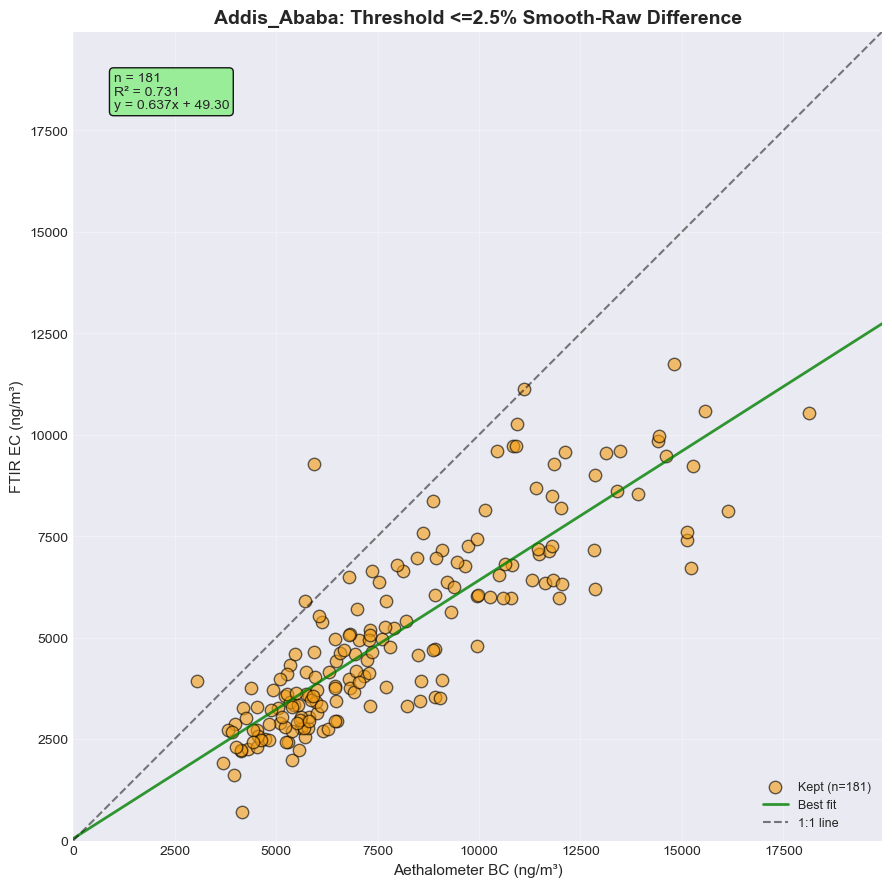

  Threshold <=2.5%: R² = 0.731, n = 181


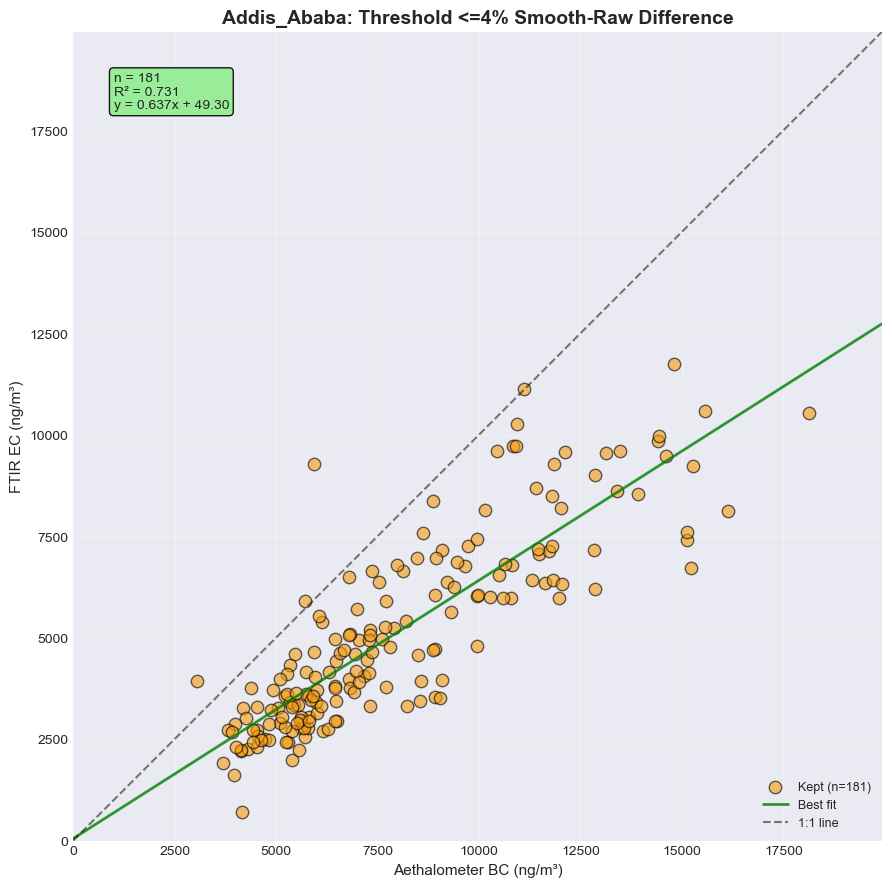

  Threshold <=4%: R² = 0.731, n = 181


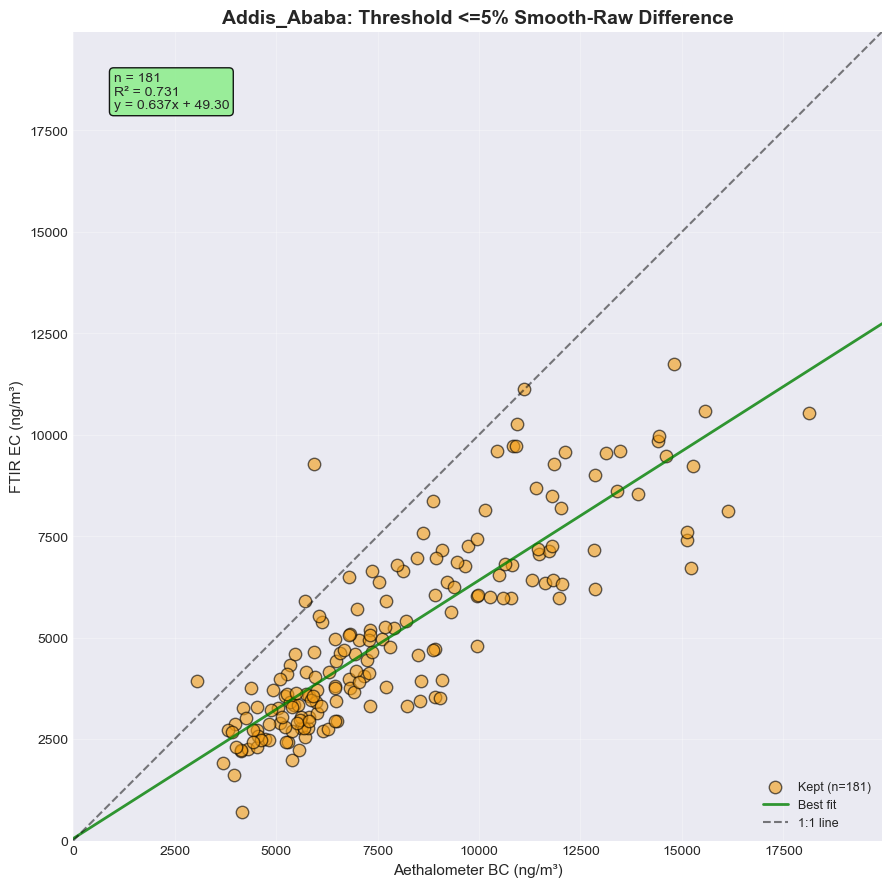

  Threshold <=5%: R² = 0.731, n = 181


In [35]:
# Individual threshold plots (separate plots for each threshold)
threshold_results = {}

for site_name, matched_df in smooth_raw_data.items():
    config = SITES[site_name]
    
    if matched_df['smooth_raw_abs_pct'].notna().sum() < 3:
        print(f"{site_name}: Insufficient smooth data")
        continue
    
    print(f"\n{'='*60}")
    print(f"{site_name}: Smooth/Raw Threshold Analysis")
    print(f"{'='*60}")
    
    site_results = {}
    
    # Calculate axis limits (same for all plots for this site)
    all_vals = np.concatenate([
        matched_df['aeth_bc'].dropna().values,
        matched_df['filter_ec'].dropna().values
    ])
    max_val = all_vals.max() * 1.1 if len(all_vals) > 0 else 100
    
    for threshold in SMOOTH_RAW_THRESHOLDS:
        # Separate by threshold
        below_threshold = matched_df[matched_df['smooth_raw_abs_pct'] <= threshold].copy()
        above_threshold = matched_df[matched_df['smooth_raw_abs_pct'] > threshold].copy()
        
        n_kept = len(below_threshold)
        n_removed = len(above_threshold)
        
        if n_kept < 3:
            print(f"  Threshold <={threshold}%: Insufficient data (n={n_kept})")
            continue
        
        # Create individual figure for this threshold
        fig, ax = plt.subplots(figsize=(9, 9))
        
        # Plot kept points
        ax.scatter(below_threshold['aeth_bc'], below_threshold['filter_ec'],
                   color=config['color'], alpha=0.6, s=80,
                   edgecolors='black', linewidth=1,
                   label=f'Kept (n={n_kept})')
        
        # Plot removed points as red X
        if len(above_threshold) > 0:
            ax.scatter(above_threshold['aeth_bc'], above_threshold['filter_ec'],
                       color='red', alpha=0.9, s=200, marker='X',
                       linewidths=3, label=f'Removed (n={n_removed})')
        
        # Calculate regression on kept points
        stats = calculate_regression_stats(
            below_threshold['aeth_bc'].values,
            below_threshold['filter_ec'].values
        )
        
        if stats:
            # Plot regression line
            x_line = np.array([0, max_val])
            y_line = stats['slope'] * x_line + stats['intercept']
            ax.plot(x_line, y_line, 'g-', linewidth=2, alpha=0.8, label='Best fit')
            
            # Stats text
            sign = '+' if stats['intercept'] >= 0 else '-'
            eq = f"y = {stats['slope']:.3f}x {sign} {abs(stats['intercept']):.2f}"
            stats_text = f"n = {stats['n']}\nR² = {stats['r_squared']:.3f}\n{eq}"
            
            ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=10,
                    verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.9))
            
            site_results[threshold] = {
                'n_kept': n_kept,
                'n_removed': n_removed,
                **stats
            }
        
        # Set axes
        ax.set_xlim(0, max_val)
        ax.set_ylim(0, max_val)
        ax.set_aspect('equal', adjustable='box')
        ax.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, linewidth=1.5, label='1:1 line')
        
        ax.set_xlabel('Aethalometer BC (ng/m³)', fontsize=11)
        ax.set_ylabel('FTIR EC (ng/m³)', fontsize=11)
        ax.set_title(f'{site_name}: Threshold <={threshold}% Smooth-Raw Difference',
                     fontsize=14, fontweight='bold')
        ax.legend(loc='lower right', fontsize=9)
        ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        if stats:
            print(f"  Threshold <={threshold}%: R² = {stats['r_squared']:.3f}, n = {stats['n']}")
    
    threshold_results[site_name] = site_results

In [36]:
# Summary table
print_comparison_table(threshold_results, metric_name='Smooth/Raw Threshold Impact')


COMPARISON TABLE: Smooth/Raw Threshold Impact

Beijing:
Threshold              n        R^2      Slope
---------------------------------------------
1                     64      0.204      0.561
2.5                   64      0.204      0.561
4                     64      0.204      0.561
5                     64      0.204      0.561

Delhi:
Threshold              n        R^2      Slope
---------------------------------------------
1                     24      0.558      0.837
2.5                   24      0.558      0.837
4                     24      0.558      0.837
5                     24      0.558      0.837

JPL:
Threshold              n        R^2      Slope
---------------------------------------------
1                     38      0.044      0.087
2.5                   39      0.035      0.076
4                     41      0.011      0.050
5                     41      0.011      0.050

Addis_Ababa:
Threshold              n        R^2      Slope
-------------------------

## 7. Cross-Comparisons: HIPS, FTIR EC, Iron, Aethalometer

Compare different measurement methods across all sites.

In [37]:
# Match all parameters for each site
all_params_data = {}

for site_name in SITES:
    if site_name not in aethalometer_data:
        continue
    
    config = SITES[site_name]
    df_aeth = aethalometer_data[site_name]
    
    matched = match_all_parameters(
        site_name, config['code'], df_aeth, filter_data
    )
    
    if matched is not None and len(matched) >= 3:
        all_params_data[site_name] = matched
        
        # Show available parameters
        available = [col for col in ['ir_bcc', 'hips_fabs', 'ftir_ec', 'iron'] 
                     if col in matched.columns and matched[col].notna().any()]
        print(f"{site_name}: {len(matched)} days, params: {', '.join(available)}")
    else:
        print(f"{site_name}: Insufficient data")

Beijing: 193 days, params: ir_bcc, hips_fabs, ftir_ec, iron
Delhi: 63 days, params: ir_bcc, hips_fabs, ftir_ec, iron
JPL: 253 days, params: ir_bcc, hips_fabs, ftir_ec, iron
Addis_Ababa: 189 days, params: ir_bcc, hips_fabs, ftir_ec, iron



Beijing


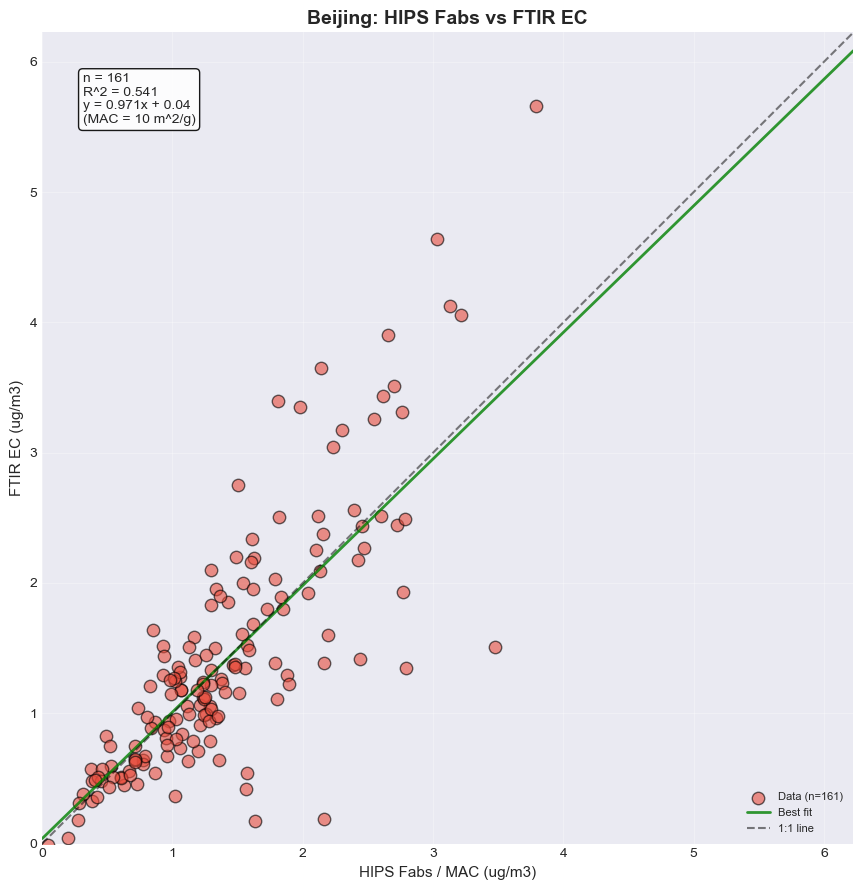

  HIPS Fabs vs FTIR EC: R² = 0.541, n = 161


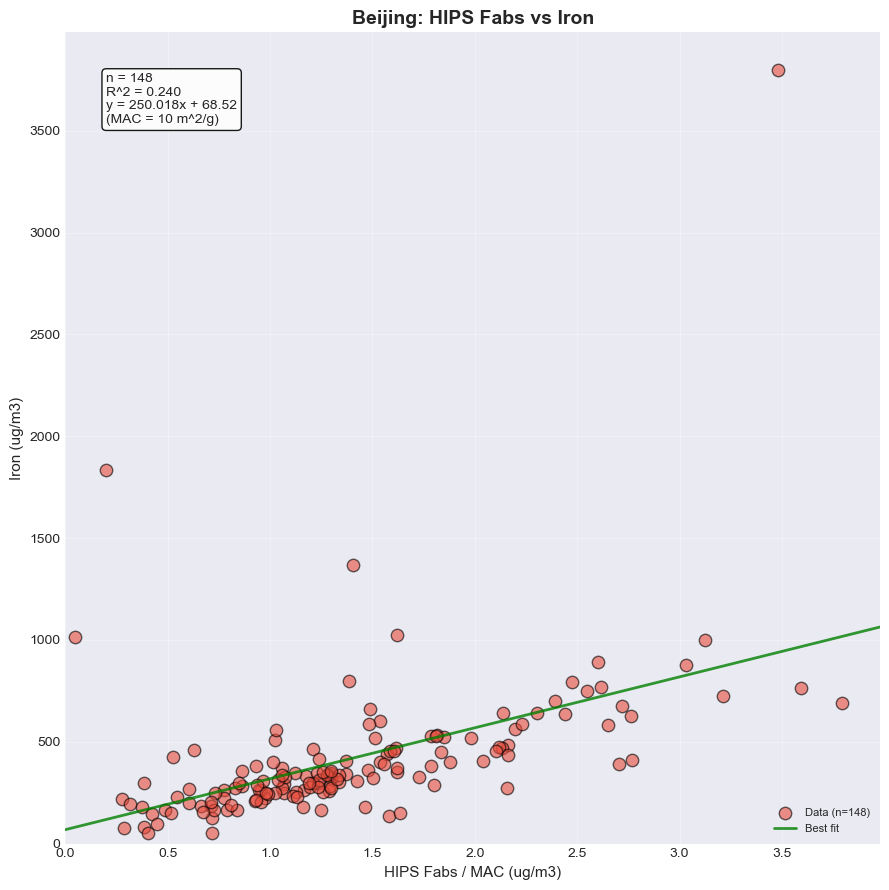

  HIPS Fabs vs Iron: R² = 0.240, n = 148


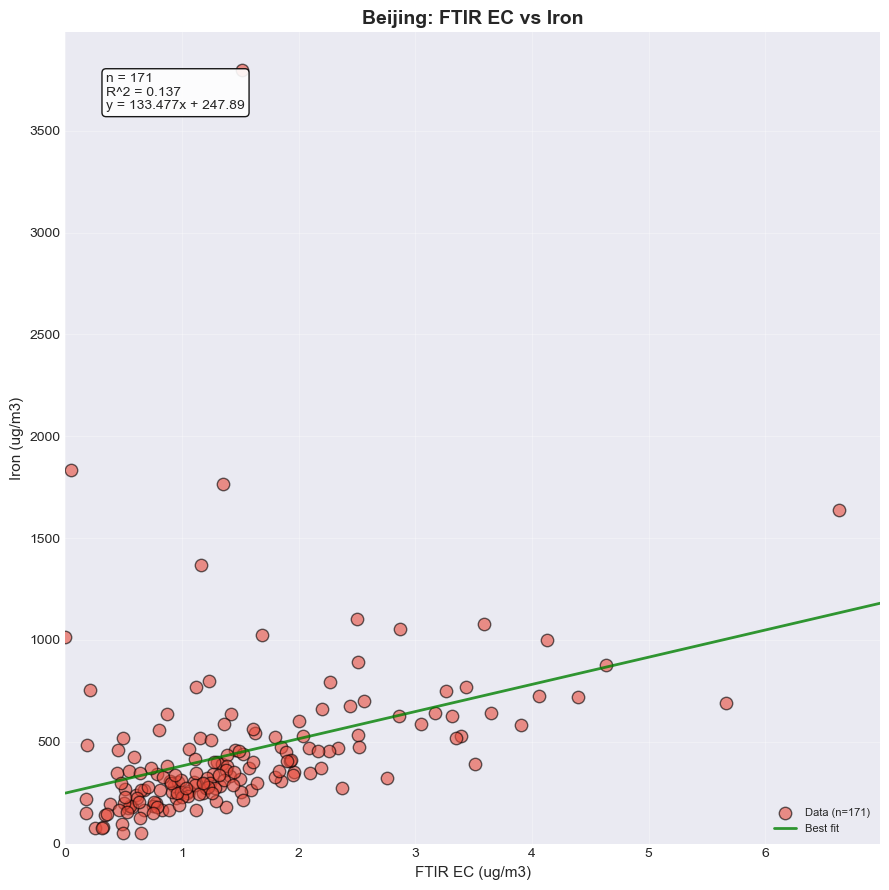

  FTIR EC vs Iron: R² = 0.137, n = 171


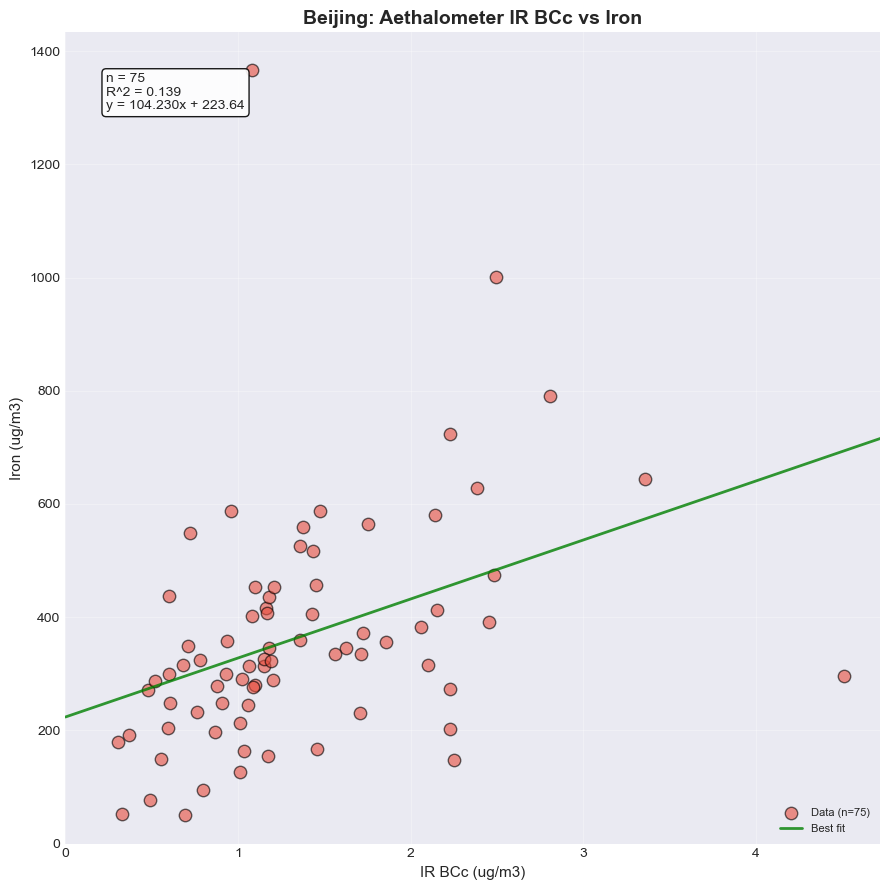

  Aethalometer IR BCc vs Iron: R² = 0.139, n = 75


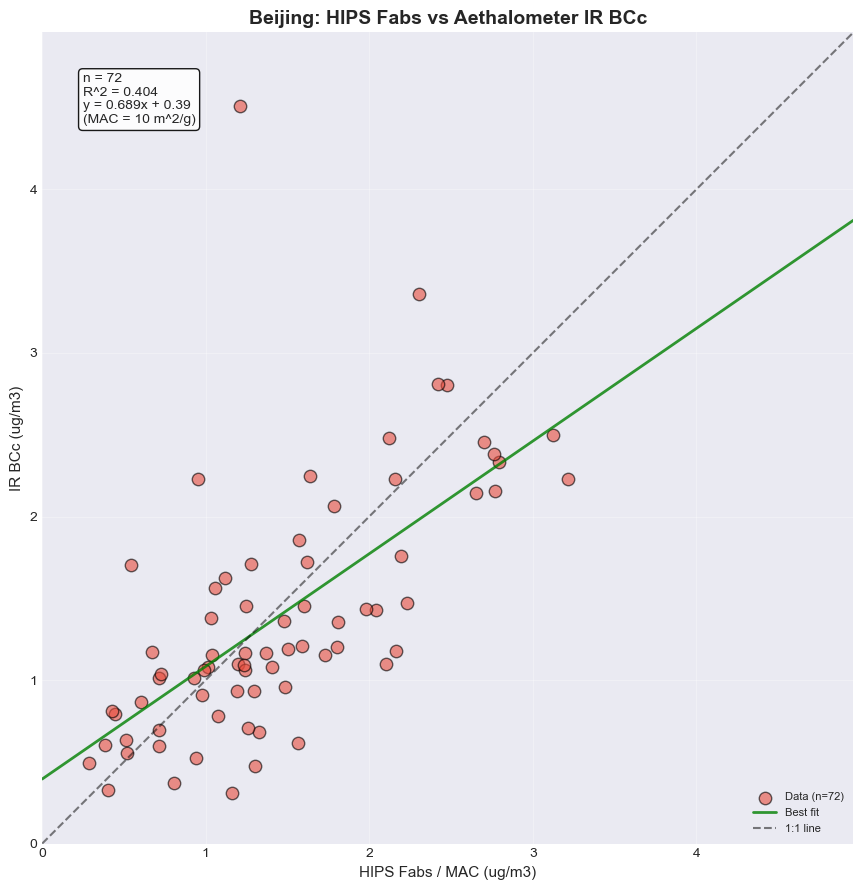

  HIPS Fabs vs Aethalometer IR BCc: R² = 0.404, n = 72

Delhi


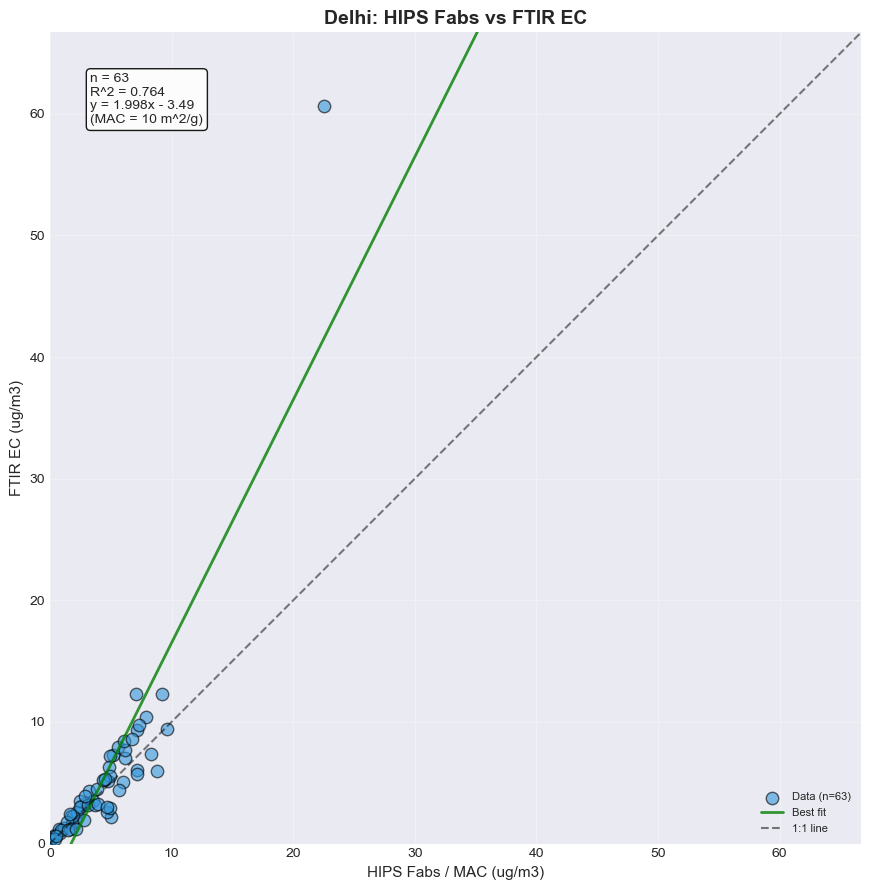

  HIPS Fabs vs FTIR EC: R² = 0.764, n = 63


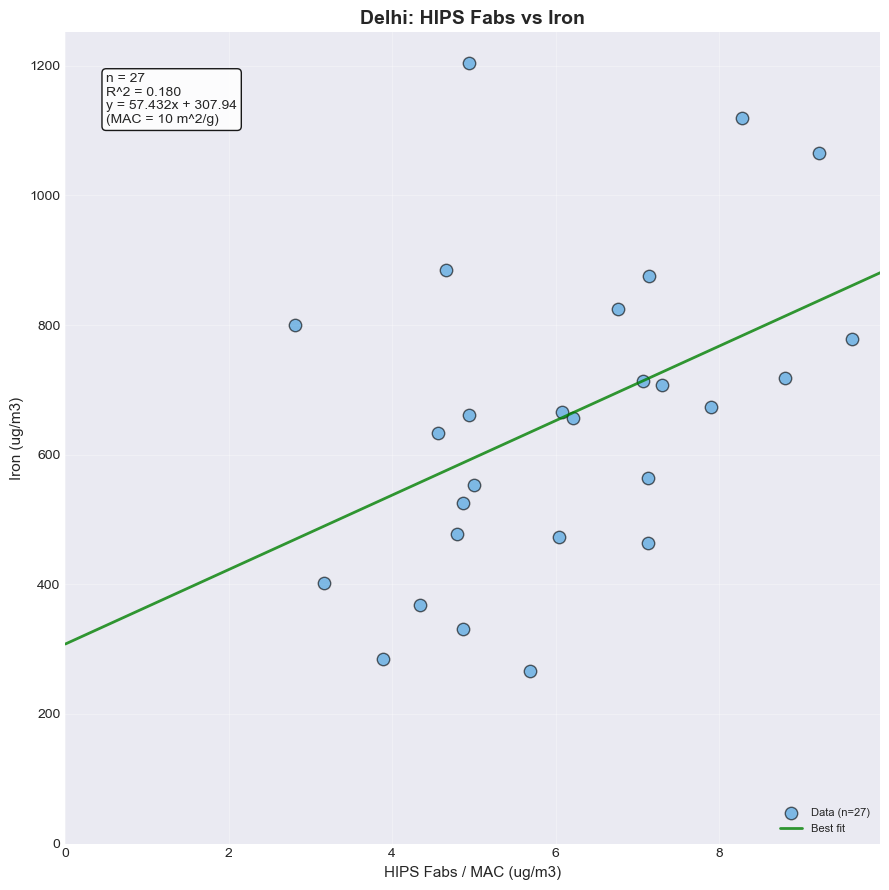

  HIPS Fabs vs Iron: R² = 0.180, n = 27


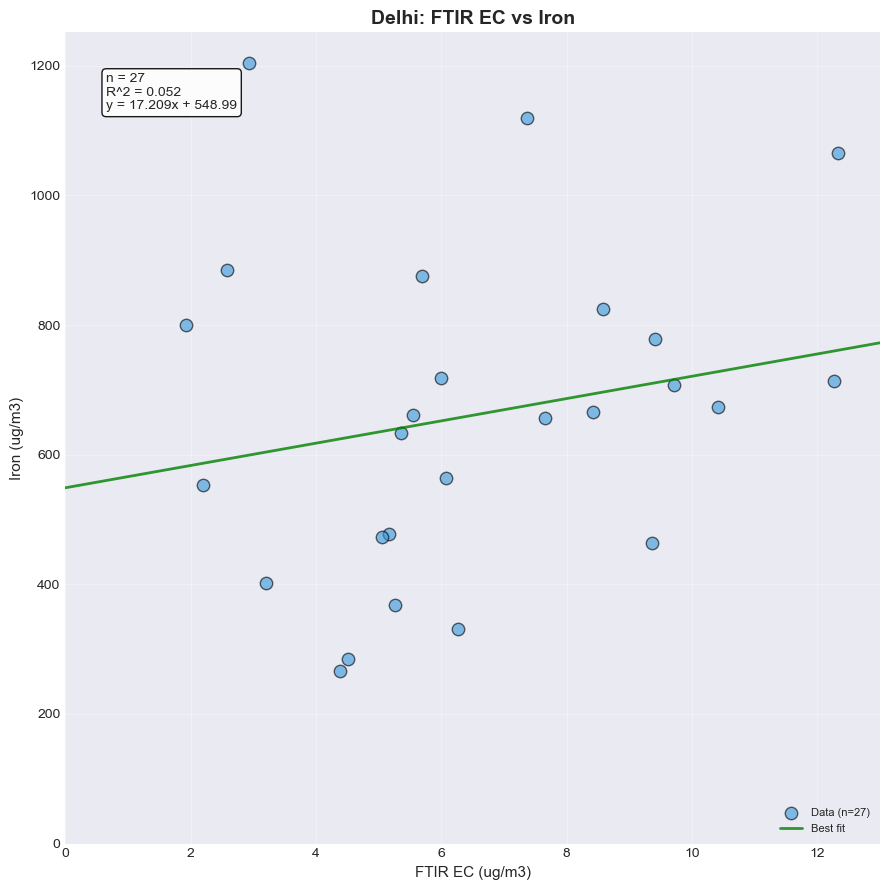

  FTIR EC vs Iron: R² = 0.052, n = 27


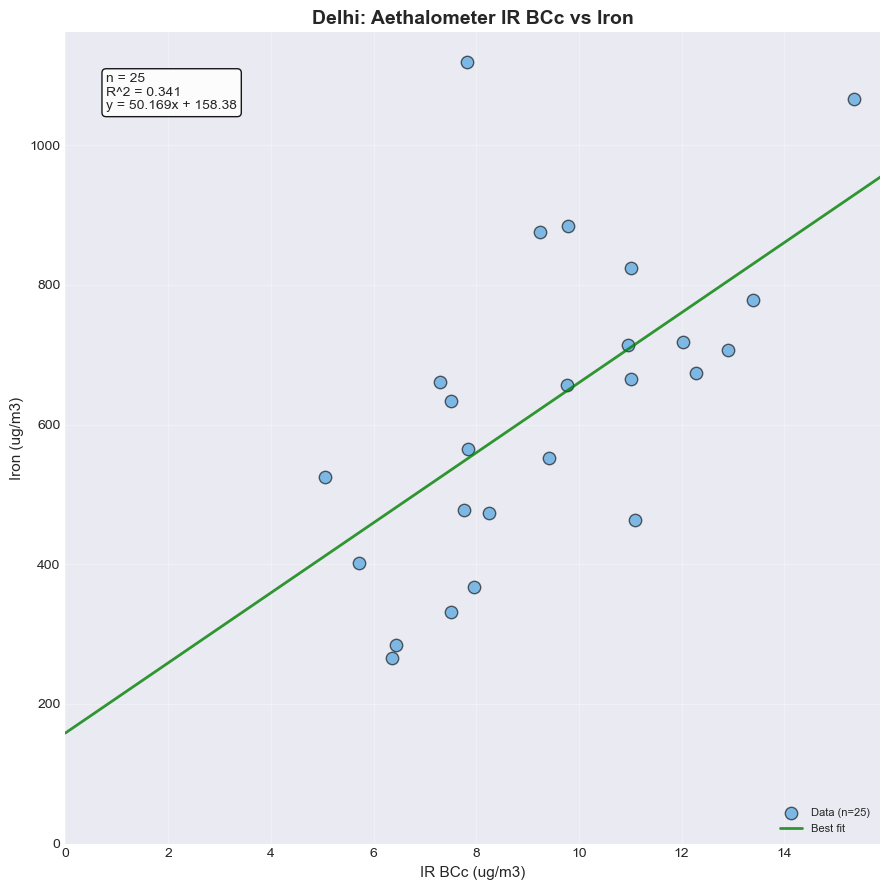

  Aethalometer IR BCc vs Iron: R² = 0.341, n = 25


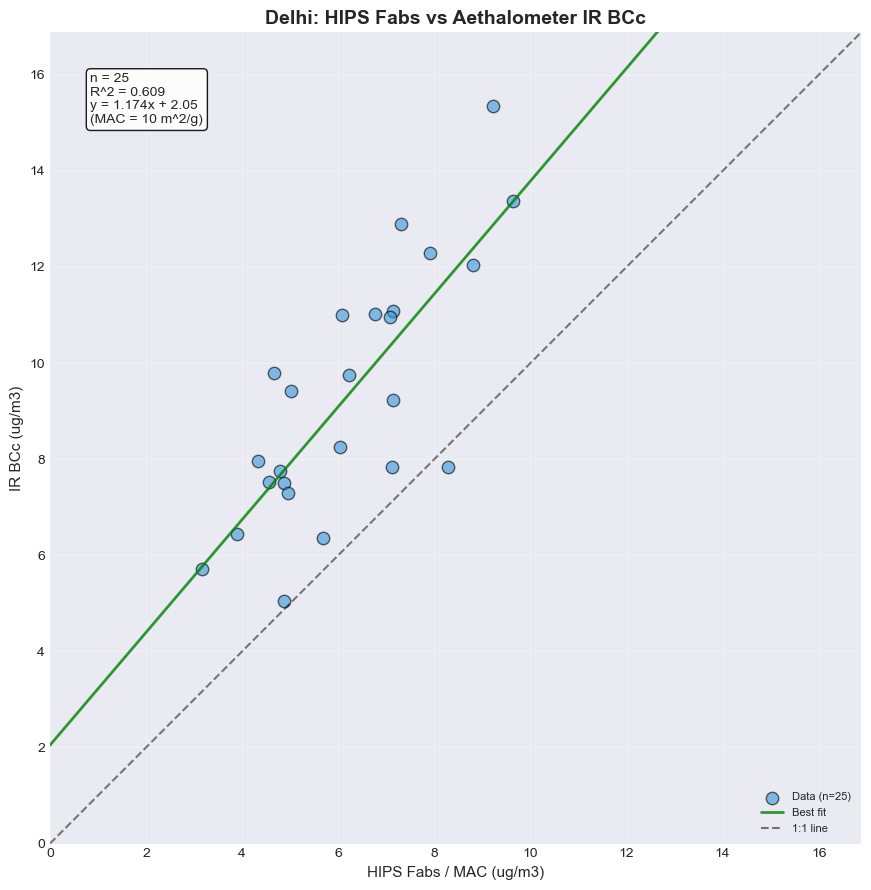

  HIPS Fabs vs Aethalometer IR BCc: R² = 0.609, n = 25

JPL
  Excluding 2 outlier(s)


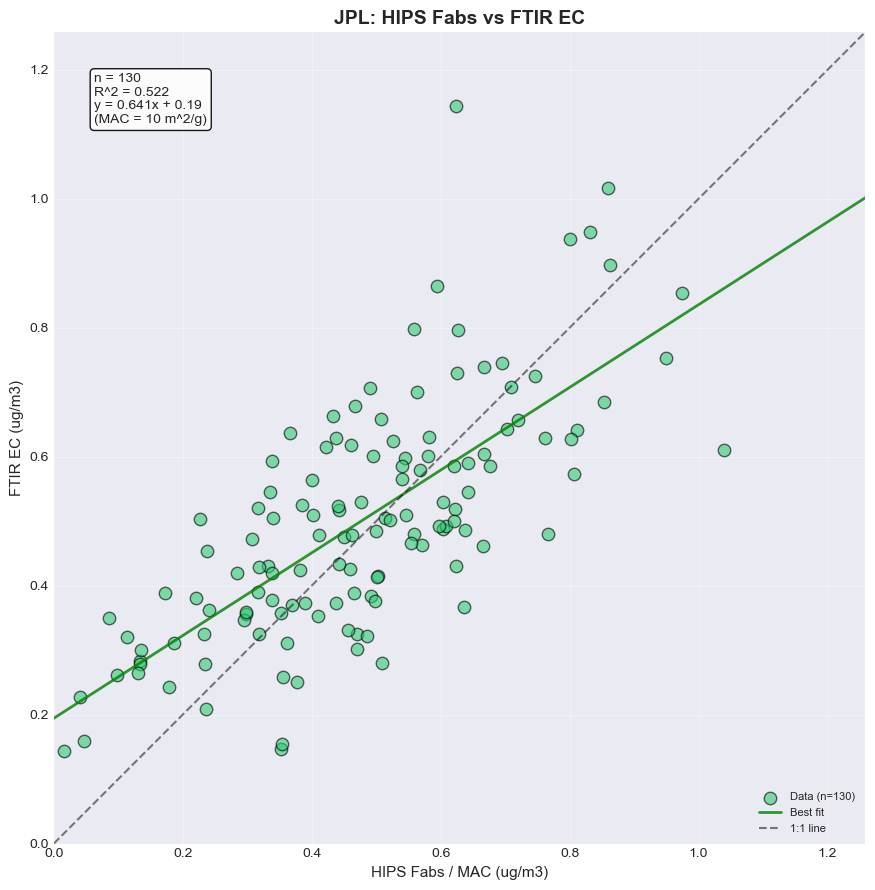

  HIPS Fabs vs FTIR EC: R² = 0.522, n = 130


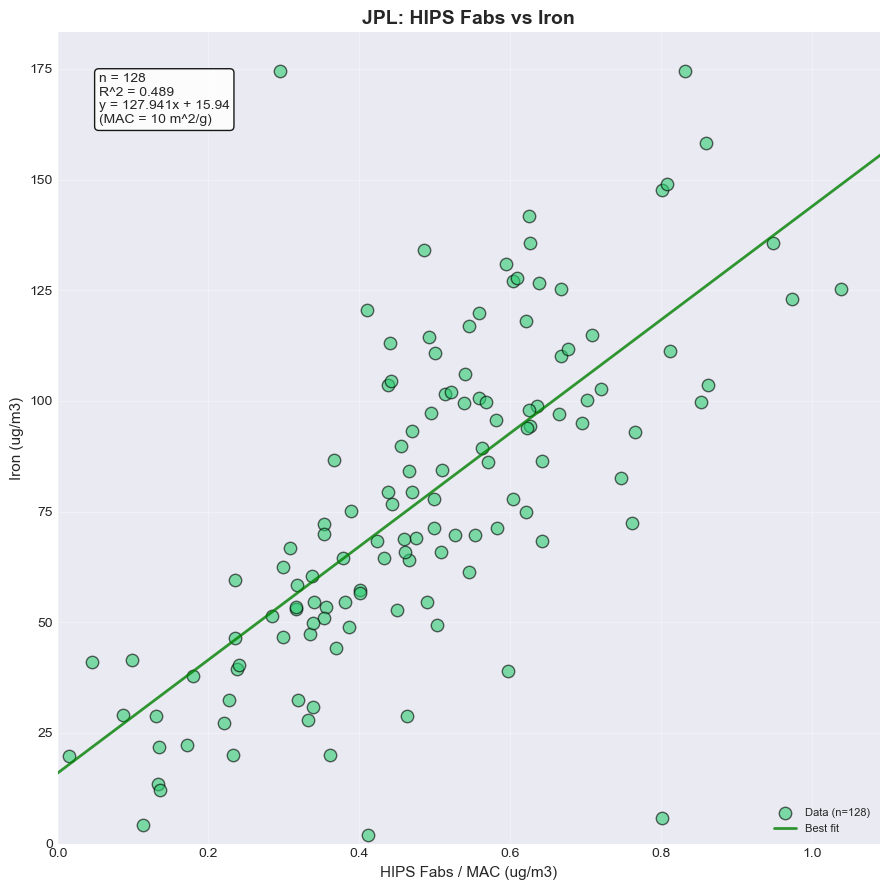

  HIPS Fabs vs Iron: R² = 0.489, n = 128


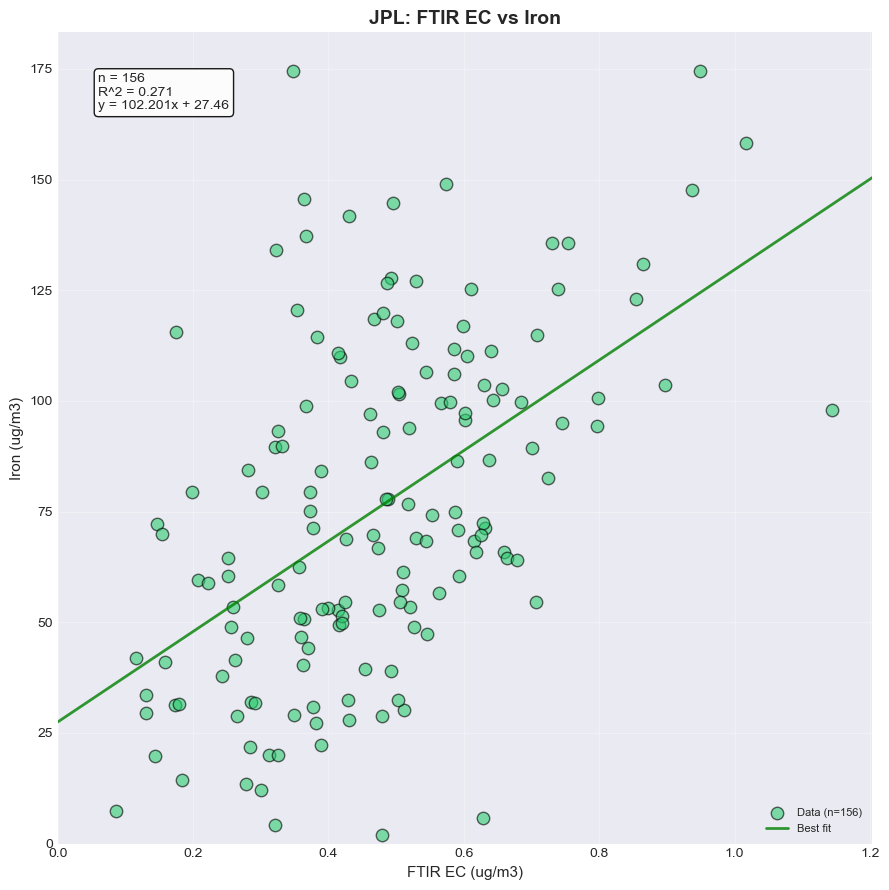

  FTIR EC vs Iron: R² = 0.271, n = 156


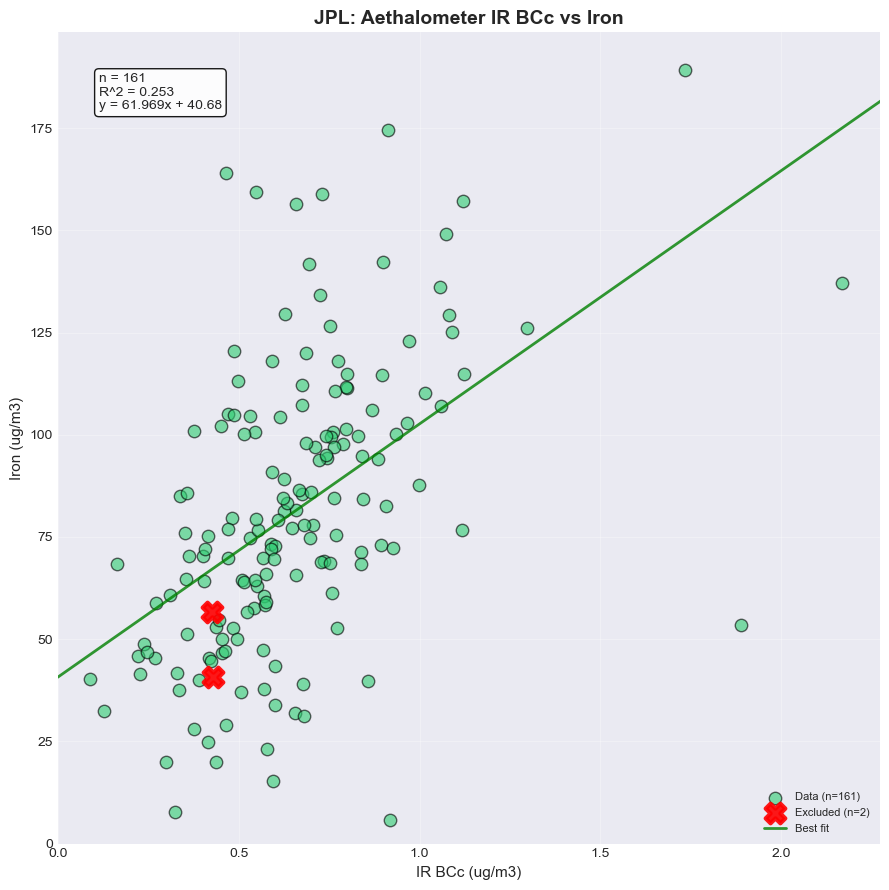

  Aethalometer IR BCc vs Iron: R² = 0.253, n = 161


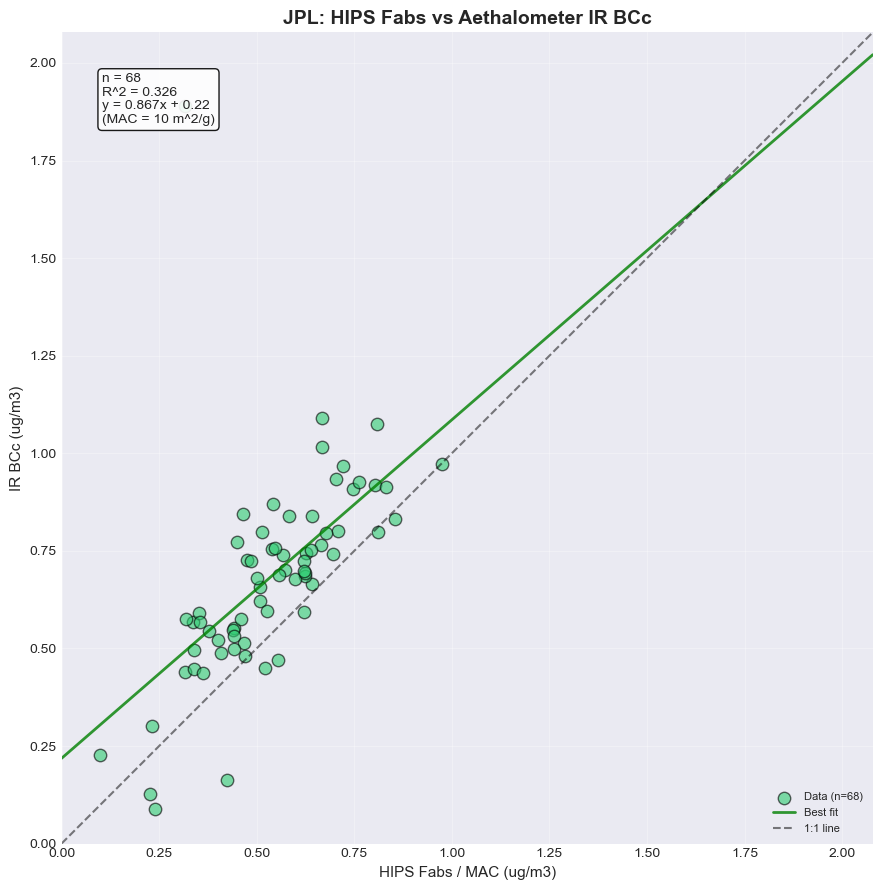

  HIPS Fabs vs Aethalometer IR BCc: R² = 0.326, n = 68

Addis_Ababa


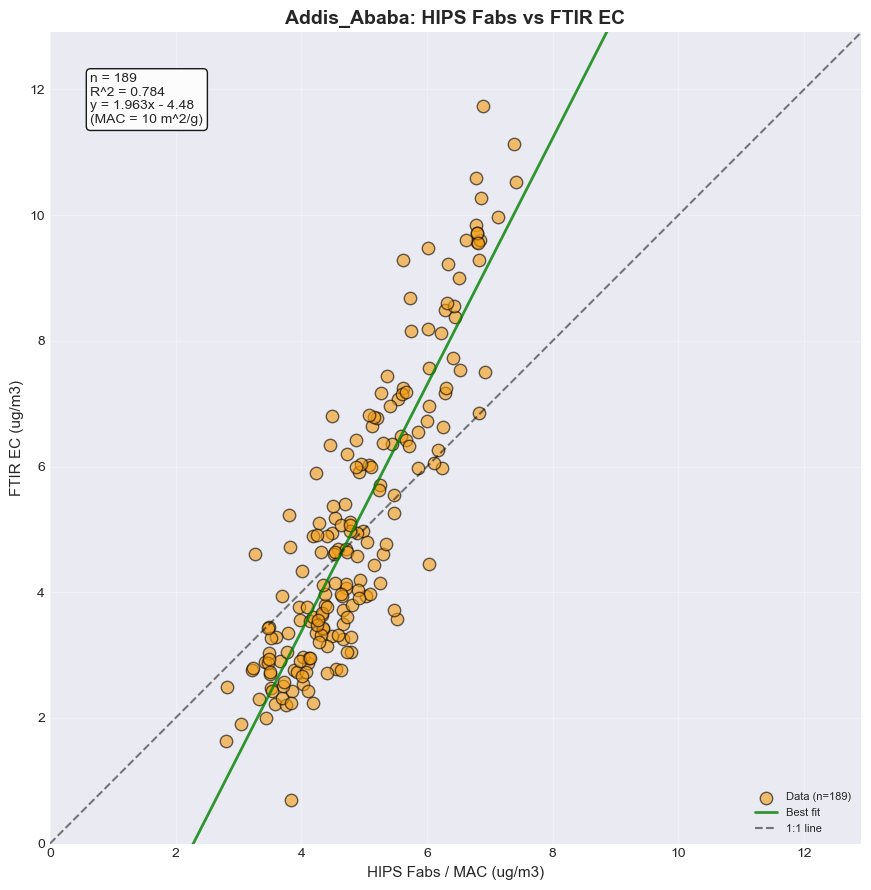

  HIPS Fabs vs FTIR EC: R² = 0.784, n = 189


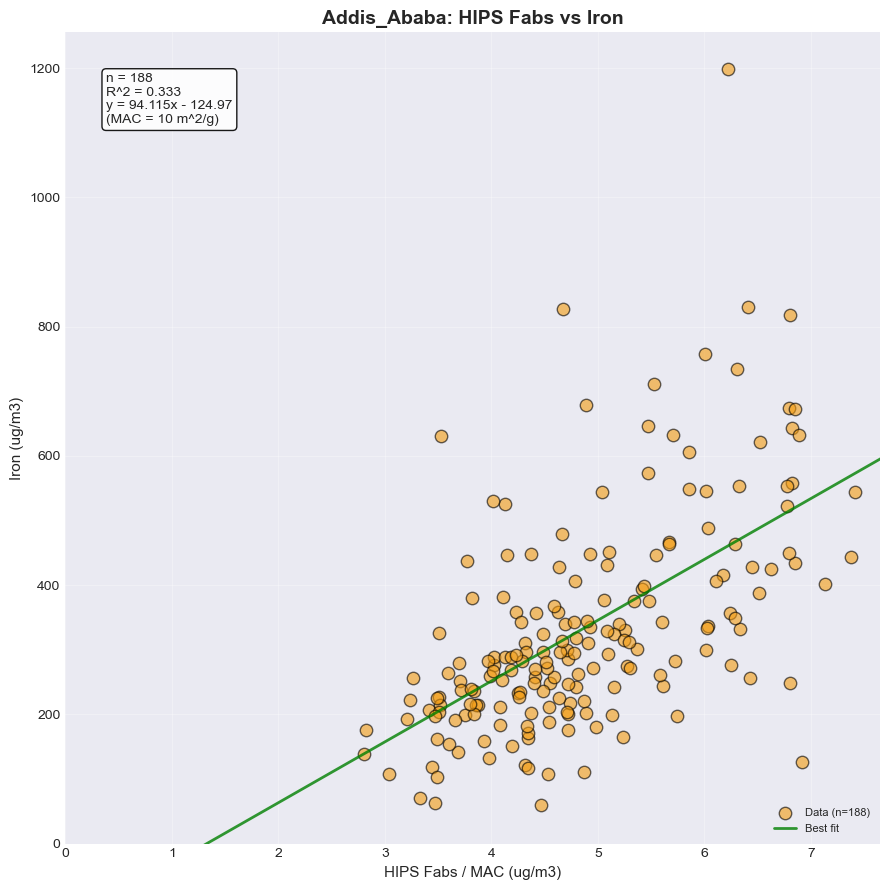

  HIPS Fabs vs Iron: R² = 0.333, n = 188


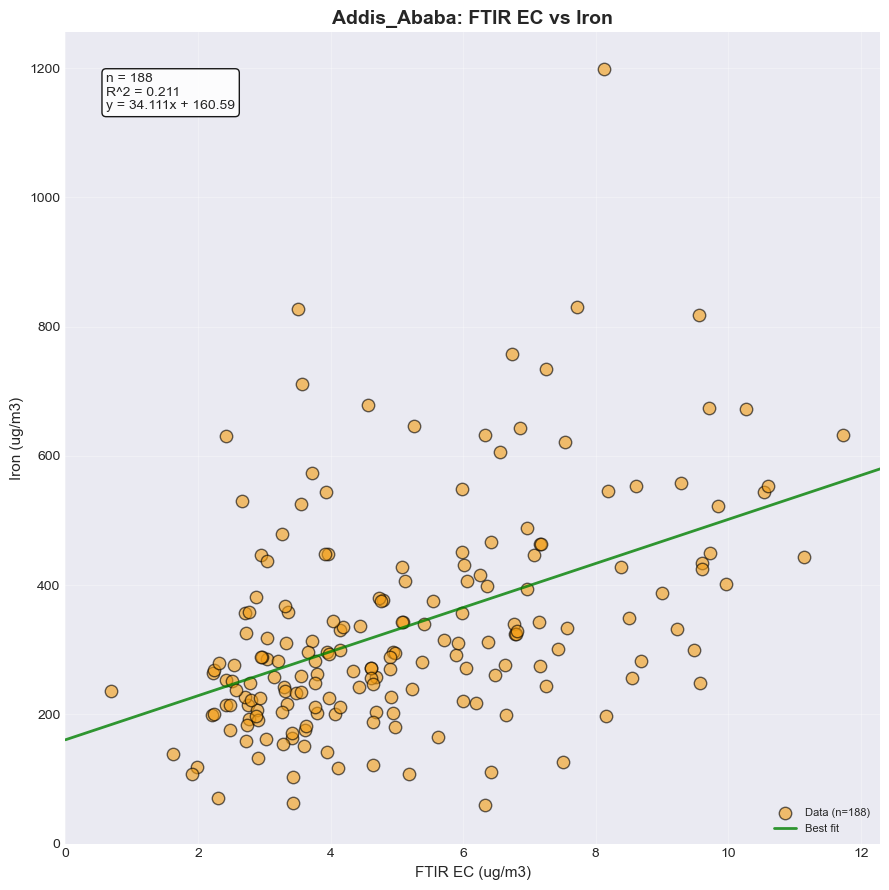

  FTIR EC vs Iron: R² = 0.211, n = 188


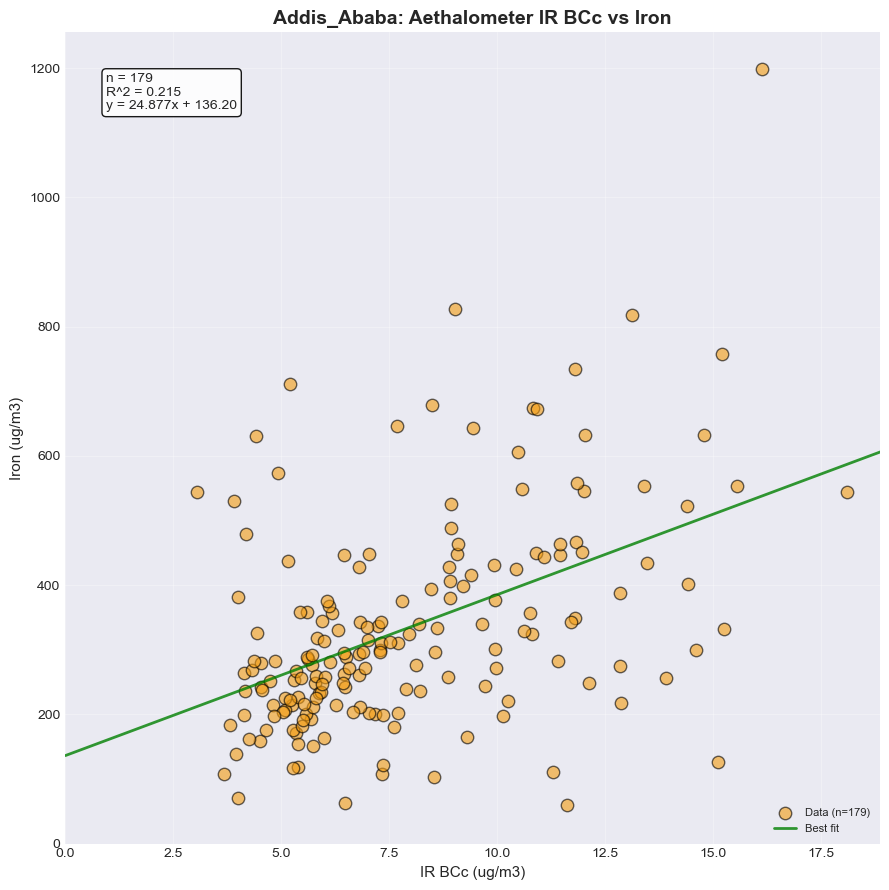

  Aethalometer IR BCc vs Iron: R² = 0.215, n = 179


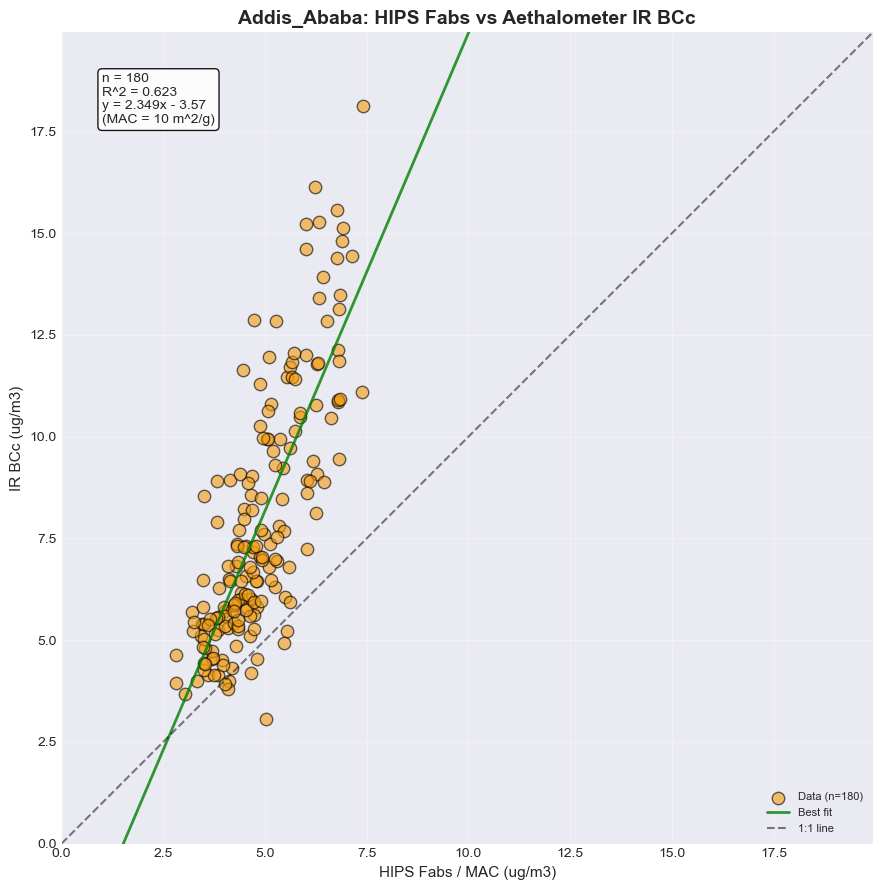

  HIPS Fabs vs Aethalometer IR BCc: R² = 0.623, n = 180


In [38]:
# Create cross-comparison plots with outlier exclusions
comparison_results = {}

for site_name, matched_df in all_params_data.items():
    config = SITES[site_name]
    site_results = {}
    
    print(f"\n{'='*60}")
    print(f"{site_name}")
    print(f"{'='*60}")
    
    # Apply date-based exclusions from EXCLUDED_SAMPLES
    matched_df = apply_exclusion_flags(matched_df, site_name)
    
    # Print exclusion summary
    n_excluded = matched_df['is_excluded'].sum() if 'is_excluded' in matched_df.columns else 0
    if n_excluded > 0:
        print(f"  Excluding {n_excluded} outlier(s)")
    
    for comp in CROSS_COMPARISONS:
        x_col = comp['x_col']
        y_col = comp['y_col']
        
        # Check if columns exist
        if x_col not in matched_df.columns or y_col not in matched_df.columns:
            continue
        
        x_data = matched_df[x_col].values
        y_data = matched_df[y_col].values
        
        # Get outlier mask
        outlier_mask = matched_df['is_excluded'].values if 'is_excluded' in matched_df.columns else None
        
        # Check for valid data
        valid_count = ((~np.isnan(x_data)) & (~np.isnan(y_data))).sum()
        if valid_count < 3:
            continue
        
        fig, ax = plt.subplots(figsize=(9, 9))
        
        stats = plot_crossplot(
            ax, x_data, y_data,
            comp['x_label'], comp['y_label'],
            color=config['color'],
            equal_axes=comp['equal_axes'],
            show_mac=comp['show_mac'],
            outlier_mask=outlier_mask  # Pass the outlier mask
        )
        
        ax.set_title(f"{site_name}: {comp['name']}", fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        if stats:
            site_results[comp['name']] = stats
            print(f"  {comp['name']}: R² = {stats['r_squared']:.3f}, n = {stats['n']}")
    
    comparison_results[site_name] = site_results

## 8. Summary Statistics

In [39]:
# Create summary table of all cross-comparisons
print("\n" + "="*100)
print("SUMMARY: CROSS-COMPARISON RESULTS")
print("="*100)
print(f"\nNote: HIPS Fabs divided by MAC = {MAC_VALUE} m²/g")

for comp in CROSS_COMPARISONS:
    comp_name = comp['name']
    print(f"\n{comp_name}:")
    print(f"{'Site':<15s} {'n':>8s} {'R²':>10s} {'Slope':>10s}")
    print("-" * 45)
    
    for site_name in SITES:
        if site_name in comparison_results and comp_name in comparison_results[site_name]:
            stats = comparison_results[site_name][comp_name]
            print(f"{site_name:<15s} {stats['n']:>8d} {stats['r_squared']:>10.3f} {stats['slope']:>10.3f}")
        else:
            print(f"{site_name:<15s} {'--':>8s} {'--':>10s} {'--':>10s}")


SUMMARY: CROSS-COMPARISON RESULTS

Note: HIPS Fabs divided by MAC = 10 m²/g

HIPS Fabs vs FTIR EC:
Site                   n         R²      Slope
---------------------------------------------
Beijing              161      0.541      0.971
Delhi                 63      0.764      1.998
JPL                  130      0.522      0.641
Addis_Ababa          189      0.784      1.963

HIPS Fabs vs Iron:
Site                   n         R²      Slope
---------------------------------------------
Beijing              148      0.240    250.018
Delhi                 27      0.180     57.432
JPL                  128      0.489    127.941
Addis_Ababa          188      0.333     94.115

FTIR EC vs Iron:
Site                   n         R²      Slope
---------------------------------------------
Beijing              171      0.137    133.477
Delhi                 27      0.052     17.209
JPL                  156      0.271    102.201
Addis_Ababa          188      0.211     34.111

Aethalometer IR BC

In [40]:
# BC statistics by site
print("\n" + "="*80)
print("BC CONCENTRATION STATISTICS BY SITE")
print("="*80)

for site_name, df in aethalometer_data.items():
    if 'IR BCc' in df.columns:
        bc_data = df['IR BCc'].dropna()
        
        print(f"\n{site_name}:")
        print(f"  n = {len(bc_data)}")
        print(f"  Mean: {bc_data.mean():.1f} ng/m³")
        print(f"  Median: {bc_data.median():.1f} ng/m³")
        print(f"  Std: {bc_data.std():.1f} ng/m³")
        print(f"  Range: {bc_data.min():.1f} - {bc_data.max():.1f} ng/m³")


BC CONCENTRATION STATISTICS BY SITE

Beijing:
  n = 222
  Mean: 1318.2 ng/m³
  Median: 1071.3 ng/m³
  Std: 964.9 ng/m³
  Range: 142.4 - 4697.1 ng/m³

Delhi:
  n = 113
  Mean: 11025.9 ng/m³
  Median: 9954.3 ng/m³
  Std: 5412.6 ng/m³
  Range: 3109.2 - 37307.1 ng/m³

JPL:
  n = 489
  Mean: 640.9 ng/m³
  Median: 592.6 ng/m³
  Std: 314.3 ng/m³
  Range: 61.1 - 2447.7 ng/m³

Addis_Ababa:
  n = 515
  Mean: 7917.7 ng/m³
  Median: 6923.1 ng/m³
  Std: 3596.6 ng/m³
  Range: 2606.3 - 21008.3 ng/m³


---

## Notes

### Updating Outliers

To add new outliers:

1. Run `identify_outlier_dates()` to find exact dates
2. Edit `scripts/outliers.py` and add entries to `EXCLUDED_SAMPLES`
3. Restart kernel and re-run

### Configuration

Key settings are in `scripts/config.py`:
- `SITES` - Site definitions (codes, colors, files)
- `MAC_VALUE` - Mass Absorption Cross-section (default: 10)
- `MIN_EC_THRESHOLD` - Minimum EC to include (default: 0.5 µg/m³)
- `FLOW_FIX_PERIODS` - Before/after flow fix dates

### Module Structure

```
scripts/
├── config.py        - Central configuration
├── outliers.py      - Outlier registry and functions
├── data_matching.py - Data loading and matching
└── plotting.py      - Reusable plotting functions
```

---

# Part II: Follow-Up Analyses

This section addresses additional analysis tasks:

1. **Iron Color Gradient Cross-Plots** - Add iron concentration as color scale to key comparisons
2. **Multi-Site Comparison Plots** - Combine all sites including Addis Ababa on single plots
3. **HIPS vs Aethalometer Smooth/Raw Analysis** - Absorption-to-absorption comparison
4. **Before/After Flow Fix Analysis** - Separate data by instrument flow fix periods
5. **Wavelength Dependence Analysis** - Compare BC at different wavelengths across all sites
6. **Research Questions Summary** - Key findings and open questions